***ESPECIALIZACIÓN EN BIG DATA***

Janny Michael Uribe Rios

MODELO PREDICTIVO PARA LA GESTIÓN EFICIENTE DEL CONSUMO DE MATERIALES EN MANTENIMIENTOS DE REDES DE DISTRIBUCIÓN ELÉCTRICA.



#Objetivos.

**Objetivo general**

Desarrollar un modelo de predicción del consumo en dinero por categoría para el año 2025.

**Cumplido:** Se lograron predicciones diferenciadas por categoría, con errores menores al 25 % en tres de las cuatro.


**Objetivo específico 1:** Integrar y preparar los datos históricos de consumo.

**Cumplido:** Se unificaron cuatro años de datos limpios y se generaron variables derivadas útiles para la modelación.


**Objetivo específico 2:** Aplicar modelos de series de tiempo y machine learning.

**Cumplido:** Se ajustaron ambos enfoques y se compararon sus resultados por métrica.


**Objetivo específico 3:** Evaluar el modelo y presentar recomendaciones.

**Cumplido:** Se identificaron categorías con alta varianza y se propone el uso de modelos híbridos según el comportamiento del consumo.



# **Trabajar en ambiente google, con archivos en el drive**

In [ ]:
# Monto el entorno Colab
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)
base_dir = "/content/drive/MyDrive/Trabajo de grado"
import os
print(os.listdir(base_dir))

Mounted at /content/drive
['Actividades a realizar.docx', 'UribeRiosJannyMichael_E1_IC.pptx', 'Descripción de las variables de la base de datos.docx', 'BD-21-22-23.xlsx', 'PROPUESTA Guía para presentacion Estudio de Caso VF.docx', 'BD-24.xlsx', 'BD-24.csv', 'NOTAS.txt', 'BD-21-22-23.csv', 'Prediccion_consumo_materiales_Janny_Uribe_FINAL.ipynb', 'Trabajo_de_grado - copia.ipynb', 'Estudio_Caso_Presentacion_Janny_Uribe.docx', 'Trabajo_de_grado.ipynb']


# **Carga, limpieza de bases de datos y EDA**

Como son dos archivos de excel en .csv, primero se caraga el primer archivo llamado BD-21-22-23.csv y luego BD-24.csv

In [ ]:
import pandas as pd
import unicodedata
import os

# Exporto base de datos 1 que tiene los consumos de los años 2021, 2022 y 2023
# Función para normalizar texto (tildes, ñ, etc.)
def normalizar_texto(texto):
    return unicodedata.normalize('NFC', texto.strip())

# Leer el archivo BD-21-22-23.csv con separador ; y codificación utf-8
bd1 = pd.read_csv(os.path.join(base_dir, "BD-21-22-23.csv"), delimiter=';', encoding='utf-8')

# Normalizar nombres de columnas
bd1.columns = [normalizar_texto(col) for col in bd1.columns]

# normalizar contenido tipo texto
for col in bd1.select_dtypes(include='object').columns:
    bd1[col] = bd1[col].astype(str).apply(normalizar_texto)

# Mostrar info y vista previa
bd1.info()
bd1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842598 entries, 0 to 842597
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Unidad de Negocio           842598 non-null  object
 1   Codigo del Articulo         842598 non-null  int64 
 2   Descripcion                 842598 non-null  object
 3   Numero Documento            842598 non-null  int64 
 4   Número Batch                842598 non-null  int64 
 5   Cantidad                    842598 non-null  object
 6   Unidad Medida               842598 non-null  object
 7   Precio Unitario             842598 non-null  object
 8   Costo Total                 842598 non-null  object
 9   Fecha Transacción           842598 non-null  object
 10  Almacen                     842598 non-null  object
 11  Descripcion OT              842598 non-null  object
 12  Cant. Solicitada            842598 non-null  object
 13  Cant. Despachada            8

Unidad de Negocio  Codigo del Articulo  \
0           1337023                10159   
1           1337022                61846   
2           1337022                61848   
3           1337022                61849   
4           1337022                61850   

                             Descripcion  Numero Documento  Número Batch  \
0  CONECTOR 4/0AWG COBRETORNILLO PARTIDO           4318945      11912898   
1                      ZAPATO GUAYO # 37           4318362      11912627   
2                      ZAPATO GUAYO # 39           4318362      11912627   
3                      ZAPATO GUAYO # 40           4318362      11912627   
4                      ZAPATO GUAYO # 41           4318362      11912627   

  Cantidad Unidad Medida Precio Unitario  Costo Total Fecha Transacción  ...  \
0       -1            UN       24.343,62   -24.343,62         6/01/2021  ...   
1       -3            PR       48.503,07  -145.509,21         6/01/2021  ...   
2      -18            PR       52.026,00  -936.468,00         6/01/2021  ...   
3      -11            PR       52.026,00  -572.286,00         6/01/2021  ...   
4       -8            PR       51.675,29  -413.402,32         6/01/2021  ...   

  Cant. Despachada Mensaje de Advertencia    Mes  GROT  \
0                1    SISTEMA EXTERNO FSM  enero  DE41   
1                3    ASIGNA EL PLANEADOR  enero  DE22   
2               18    ASIGNA EL PLANEADOR  enero  DE22   
3               11    ASIGNA EL PLANEADOR  enero  DE22   
4                8    ASIGNA EL PLANEADOR  enero  DE22   

                      EQUIPO - REGION          UNIDAD  \
0  MANTENIMIENTO - REDES SUBTERRÁNEAS  SERVICIOS MTTO   
1          MANTENIMIENTO - R. ORIENTE      MTTO NORTE   
2          MANTENIMIENTO - R. ORIENTE      MTTO NORTE   
3          MANTENIMIENTO - R. ORIENTE      MTTO NORTE   
4          MANTENIMIENTO - R. ORIENTE      MTTO NORTE   

  DEPENDENCIA COSTO ASIGNADO Descriptor general Descriptor Material  \
0                   MTTO SUR           Conector   Conector Mecanico   
1                 MTTO NORTE           Dotacion              Zapato   
2                 MTTO NORTE           Dotacion              Zapato   
3                 MTTO NORTE           Dotacion              Zapato   
4                 MTTO NORTE           Dotacion              Zapato   

  Descriptor especificación  
0               Por Definir  
1               Por Definir  
2               Por Definir  
3               Por Definir  
4               Por Definir  

[5 rows x 23 columns]

In [ ]:
# Exporto base de datos 2 que tiene los consumos del año 2024
# Función para normalizar nombres de columnas (tildes, ñ, etc)
def normalizar_col(col_name):
    # Normalizar Unicode a forma compuesta NFC (estándar para tildes y ñ)
    return unicodedata.normalize('NFC', col_name)

# Leer el CSV con skiprows=1 saltandome la primera fila, usando ; como delimitador y utf-8 (Ya que las dos bases de datos tienen el mismo encabezado)
bd2 = pd.read_csv(os.path.join(base_dir, "BD-24.csv"), delimiter=';', encoding='utf-8', skiprows=1)

# Normalizar nombres de columnas para evitar errores con tildes y caracteres especiales
bd2.columns = [normalizar_col(col.strip()) for col in bd2.columns]

# si quieres normalizar los strings dentro del DataFrame (solo columnas object), para posteriormente facilitar la limepieza.
for col in bd2.select_dtypes(include='object').columns:
    bd2[col] = bd2[col].astype(str).apply(lambda x: unicodedata.normalize('NFC', x.strip()))

# Mostrar info y primeras filas
bd2.info()
bd2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452825 entries, 0 to 452824
Data columns (total 23 columns):
 #   Column                                           Non-Null Count   Dtype 
---  ------                                           --------------   ----- 
 0   33MEJCALMT                                       452825 non-null  object
 1   280598                                           452825 non-null  int64 
 2   RECONECTADOR TRIFASICO 15KV630A INCLUYE CONTROL  452825 non-null  object
 3   5189412                                          452825 non-null  int64 
 4   18858045                                         452825 non-null  int64 
 5   -100                                             452825 non-null  object
 6   UN                                               452825 non-null  object
 7   41997235,15                                      452825 non-null  object
 8   -4199723515                                      452825 non-null  object
 9   8/10/2024                 

33MEJCALMT  280598  RECONECTADOR TRIFASICO 15KV630A INCLUYE CONTROL  \
0  33MEJCALMT  280598  RECONECTADOR TRIFASICO 15KV630A INCLUYE CONTROL   
1  33MEJCALMT  280598  RECONECTADOR TRIFASICO 15KV630A INCLUYE CONTROL   
2  33MEJCALMT  280598  RECONECTADOR TRIFASICO 15KV630A INCLUYE CONTROL   
3  33MEJCALMT  280598  RECONECTADOR TRIFASICO 15KV630A INCLUYE CONTROL   
4  33MEJCALMT  200992                  RECONECTADOR 15KVTRIFASICO 630A   

   5189412  18858045 -100  UN  41997235,15  -4199723515   8/10/2024  ...  \
0  5170603  18558928  -88  UN  41997235,15  -3695756693   2/09/2024  ...   
1  5201573  19047669  -73  UN  41997235,15  -3065798166   5/11/2024  ...   
2  5207917  19146000  -50  UN  41997235,15  -2099861758  18/11/2024  ...   
3  5178245  18693595  -45  UN  41997235,15  -1889875582  18/09/2024  ...   
4  5051234  17271624  -32  UN  44247829,44  -1415930542  15/01/2024  ...   

  100.1  SISTEMA EXTERNO EAM     octubre  EGT04  \
0    88  SISTEMA EXTERNO EAM  septiembre  EGT05   
1    73  SISTEMA EXTERNO EAM   noviembre  EGT04   
2    50  SISTEMA EXTERNO EAM   noviembre  EGT04   
3    45  SISTEMA EXTERNO EAM  septiembre  EGT04   
4    32  SISTEMA EXTERNO EAM       Enero  EGT05   

   EQUIPO DE PROTECCIÓN Y MANIOBRA  SERVICIOS MTTO  MTTO NORTE  Reconectador  \
0                  TRANSFORMADORES  SERVICIOS MTTO  MTTO NORTE  Reconectador   
1  EQUIPO DE PROTECCIÓN Y MANIOBRA  SERVICIOS MTTO  MTTO NORTE  Reconectador   
2  EQUIPO DE PROTECCIÓN Y MANIOBRA  SERVICIOS MTTO  MTTO NORTE  Reconectador   
3  EQUIPO DE PROTECCIÓN Y MANIOBRA  SERVICIOS MTTO  MTTO NORTE  Reconectador   
4                  TRANSFORMADORES  SERVICIOS MTTO  MTTO NORTE  Reconectador   

   RA  Por Definir  
0  RA  Por Definir  
1  RA  Por Definir  
2  RA  Por Definir  
3  RA  Por Definir  
4  RA  Por Definir  

[5 rows x 23 columns]

Luego **concateno verticalemnte** las dos bases de datos, teniendo en cuenta la ubicacion de la variable en la base de datos y no en nombre de la variable y me asiguro que las variables que voy a usar esten como las requiero, texto, numerico o decimal.

In [ ]:
import pandas as pd
import numpy as np

# Función para normalizar texto (tildes, ñ, etc.)
def normalizar_texto(texto):
    return unicodedata.normalize('NFC', texto.strip())

# Leer bd1 normalmente con encabezados
bd1 = pd.read_csv(os.path.join(base_dir, "BD-21-22-23.csv"), delimiter=';', encoding='utf-8')
bd1.columns = [normalizar_texto(col) for col in bd1.columns]

# Leer bd2 saltando la primera fila (que contiene los encabezados)
bd2 = pd.read_csv(os.path.join(base_dir, "BD-24.csv"), delimiter=';', encoding='utf-8', skiprows=1, header=None)

# Asignar a bd2 los mismos nombres de columna que tiene bd1, por posición
bd2.columns = bd1.columns

# Concatenar por posición (ya tienen mismo número y orden de columnas)
bd_final = pd.concat([bd1, bd2], axis=0, ignore_index=True)

# Se limpian la variables antes de convertir a numero para que no salgan valores nulos.
for col in ['Cant. Despachada', 'Cant. Solicitada', 'Costo Total']:
    bd_final[col] = bd_final[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).str.strip()
    bd_final[col] = pd.to_numeric(bd_final[col], errors='coerce')

# Convertir cantidades a numérico
bd_final['Cant. Despachada'] = pd.to_numeric(bd_final['Cant. Despachada'], errors='coerce')
bd_final['Cant. Solicitada'] = pd.to_numeric(bd_final['Cant. Solicitada'], errors='coerce')

# Convertir Codigo del Articulo, Numero Documento, Número Batch, a objeto
bd_final['Codigo del Articulo'] = bd_final['Codigo del Articulo'].astype('object')
bd_final['Numero Documento'] = bd_final['Numero Documento'].astype('object')
bd_final['Número Batch'] = bd_final['Número Batch'].astype('object')

# Me aseguro acomodar las fechas en formato yyyy-mm-dd
bd_final['Fecha Transacción'] = pd.to_datetime(
    bd_final['Fecha Transacción'],
    errors='coerce',
    dayfirst=True  # O quitar si vienen en formato ISO
)

# Convertir fecha a datetime
bd_final['Fecha Transacción'] = pd.to_datetime(bd_final['Fecha Transacción'], errors='coerce')

# Convertir a numérico después de limpieza
bd_final['Costo Total'] = pd.to_numeric(bd_final['Costo Total'], errors='coerce').round().abs()


# Valores absolutos para Costo Total, ya que en la base de datos se hace la multiplicacion de la cantidad retirada del alamacen (valor negativo) por el valor unitario
bd_final['Costo Total'] = bd_final['Costo Total'].abs()

# Exportar CSV delimitado por ; con UTF-8
# bd_final.to_csv('bd_final_limpio.csv', index=False, encoding='utf-8', sep=';')

bd_final.head()
bd_final.info()
bd_final.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295424 entries, 0 to 1295423
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   Unidad de Negocio           1295424 non-null  object        
 1   Codigo del Articulo         1295424 non-null  object        
 2   Descripcion                 1295424 non-null  object        
 3   Numero Documento            1295424 non-null  object        
 4   Número Batch                1295424 non-null  object        
 5   Cantidad                    1295424 non-null  object        
 6   Unidad Medida               1295424 non-null  object        
 7   Precio Unitario             1295424 non-null  object        
 8   Costo Total                 1295390 non-null  float64       
 9   Fecha Transacción           1295424 non-null  datetime64[ns]
 10  Almacen                     1295424 non-null  object        
 11  Descripcion OT          

Costo Total              Fecha Transacción  Cant. Solicitada  \
count  1.295390e+06                        1295424      1.295424e+06   
mean   3.145336e+05  2023-04-23 08:36:12.565584640      1.387031e+01   
min    0.000000e+00            2021-01-04 00:00:00     -2.000000e+01   
25%    6.352000e+03            2022-04-19 00:00:00      1.000000e+00   
50%    1.972400e+04            2023-07-13 00:00:00      2.000000e+00   
75%    7.399100e+04            2024-04-29 00:00:00      4.000000e+00   
max    4.199724e+09            2024-12-30 00:00:00      8.205480e+06   
std    9.812727e+06                            NaN      7.223958e+03   

       Cant. Despachada  
count      1.295424e+06  
mean       6.403746e+00  
min        1.000000e-02  
25%        1.000000e+00  
50%        2.000000e+00  
75%        4.000000e+00  
max        1.285700e+04  
std        3.634106e+01

Se realiza filtro teniendo en cuenta los descriptores que requiero para realizar mi prediccion, ya que estos desciptores son los mas importantes y los de mas consumo y variables en el tiempo. La necesidad de prediccion en este caso son los materiales con descriptores de 'Cable', 'Poste', 'Aislador' y 'Transformador'

In [ ]:
categorias = ['Cable', 'Poste', 'Aislador', 'Transformador']
bd_final1 = bd_final[bd_final['Descriptor general'].isin(categorias)]
bd_final1.head()
bd_final1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315491 entries, 18 to 1295423
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Unidad de Negocio           315491 non-null  object        
 1   Codigo del Articulo         315491 non-null  object        
 2   Descripcion                 315491 non-null  object        
 3   Numero Documento            315491 non-null  object        
 4   Número Batch                315491 non-null  object        
 5   Cantidad                    315491 non-null  object        
 6   Unidad Medida               315491 non-null  object        
 7   Precio Unitario             315491 non-null  object        
 8   Costo Total                 315465 non-null  float64       
 9   Fecha Transacción           315491 non-null  datetime64[ns]
 10  Almacen                     315491 non-null  object        
 11  Descripcion OT              315491 non-nul

En la informacion identifico que la unica variable que tiene valores nulos es **Costo Total**.

In [ ]:
bd_final1.isnull().sum()

Unidad de Negocio              0
Codigo del Articulo            0
Descripcion                    0
Numero Documento               0
Número Batch                   0
Cantidad                       0
Unidad Medida                  0
Precio Unitario                0
Costo Total                   26
Fecha Transacción              0
Almacen                        0
Descripcion OT                 0
Cant. Solicitada               0
Cant. Despachada               0
Mensaje de Advertencia         0
Mes                            0
GROT                           0
EQUIPO - REGION                0
UNIDAD                         0
DEPENDENCIA COSTO ASIGNADO     0
Descriptor general             0
Descriptor Material            0
Descriptor especificación      0
dtype: int64

Cuando se revisa cual es la variable con valores nulos, identifico que es Costo Total, entonces procedo a revisar las linea, identifico que no corresponden  a consumos, sino a devoluciones, reintegros y cuadres en el almacen, el la variable **Descripcion OT**

In [ ]:
pd.set_option('display.max_columns', None)
registros_nulos = bd_final1[bd_final1['Costo Total'].isnull()]
registros_nulos.head(26)


Unidad de Negocio Codigo del Articulo  \
1295393        33REPOCTRA              215659   
1295394        33MEJCALMT              200149   
1295395        33MEJCALMT              200149   
1295396        33MEJCALMT              200156   
1295397        33MEJCALMT              200151   
1295398        33MEJCALMT              200151   
1295399        33MEJCALMT              200016   
1295400           1337023              200058   
1295401           1337023              200058   
1295402           1337023              200058   
1295408        33REPOCTRA              200475   
1295409        33MEJCALMT              200368   
1295410        33MEJCALMT              200368   
1295411        33MEJCALMT              200368   
1295412        33MEJCALMT              200370   
1295413        33MEJCALMT              200370   
1295414        33REPOCTRA              200475   
1295415        33MEJCALMT              200527   
1295416        33MEJCALMT              200527   
1295417        33REPOCTRA              200475   
1295418        33REPOCTRA              200475   
1295419        33REPOCTRA              200475   
1295420        33REPOCTRA              200475   
1295421        33REPOCTRA              200475   
1295422        33MEJCALMT              200527   
1295423        33MEJCALMT              200484   

                                               Descripcion Numero Documento  \
1295393                  CUBIERTA FAUNACORTACIRCUITOS 15KV          5083822   
1295394  AISLADOR SUSP PORC 15KV6" ANSI C29.2 CL 52-1 C...          5135642   
1295395  AISLADOR SUSP PORC 15KV6" ANSI C29.2 CL 52-1 C...          5135663   
1295396  AISLADOR TENSOR PORC 15KV4 1/4" ANSI C29.4 CL ...          5135642   
1295397   AISLADOR CARRETE PORC 0.6KV3" ANSI C29.3 CL 53-3          5192322   
1295398   AISLADOR CARRETE PORC 0.6KV3" ANSI C29.3 CL 53-3          5194339   
1295399               POSTE CONCRETO 12M 1050KGFMONOLITICO          5215812   
1295400                    POSTE PRFV 12M 750KGFMONOLITICO          5223182   
1295401                    POSTE PRFV 12M 750KGFMONOLITICO          5222924   
1295402                    POSTE PRFV 12M 750KGFMONOLITICO          5222924   
1295408               CABLE ACSR 4/0AWGMPOLAR DESN PENGUIN          5121447   
1295409             CABLE CU 2AWGMPOLAR AIS XLPE 600V 90°C          5117241   
1295410             CABLE CU 2AWGMPOLAR AIS XLPE 600V 90°C          5135663   
1295411             CABLE CU 2AWGMPOLAR AIS XLPE 600V 90°C          5135642   
1295412           CABLE CU 2/0AWGMPOLAR AIS XLPE 600V 90°C          5135663   
1295413           CABLE CU 2/0AWGMPOLAR AIS XLPE 600V 90°C          5135642   
1295414               CABLE ACSR 4/0AWGMPOLAR DESN PENGUIN          5138851   
1295415        CABLE ACERO GALV 1/4"EXTRA ALTA RESISTENCIA          5127115   
1295416        CABLE ACERO GALV 1/4"EXTRA ALTA RESISTENCIA          5135642   
1295417               CABLE ACSR 4/0AWGMPOLAR DESN PENGUIN          5166917   
1295418               CABLE ACSR 4/0AWGMPOLAR DESN PENGUIN          5163848   
1295419               CABLE ACSR 4/0AWGMPOLAR DESN PENGUIN          5157243   
1295420               CABLE ACSR 4/0AWGMPOLAR DESN PENGUIN          5171088   
1295421               CABLE ACSR 4/0AWGMPOLAR DESN PENGUIN          5190262   
1295422        CABLE ACERO GALV 1/4"EXTRA ALTA RESISTENCIA          5191864   
1295423        CABLE ACSR/AW 1/0AWGMPOLAR DESN (4/3) RAVEN          5218301   

        Número Batch Cantidad Unidad Medida Precio Unitario  Costo Total  \
1295393     17447925        1            UN               0          NaN   
1295394     17987736        6            UN               0          NaN   
1295395     17987775       18            UN               0          NaN   
1295396     17987736        1            UN               0          NaN   
1295397     18900001       -1            UN               0          NaN   
1295398     18921349       -1            UN               0          NaN   
1295399     193259

Igualo bd_final1 y bd_final despues de hacer revisiones para seguir trabajando con **bd_final**

In [ ]:
# Se realiza configuración global de pandas para lograr una mejor visualización de los datos en formato decimal
pd.options.display.float_format = '{:,.2f}'.format

# Para visualizar todas las columnas
pd.set_option('display.max_columns', None)

# Igualo bd_final1 y bd_final despues de hacer revisiones para seguir trabajando con bd_final
bd_final = bd_final1
bd_final.head()
bd_final.info()
bd_final.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 315491 entries, 18 to 1295423
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Unidad de Negocio           315491 non-null  object        
 1   Codigo del Articulo         315491 non-null  object        
 2   Descripcion                 315491 non-null  object        
 3   Numero Documento            315491 non-null  object        
 4   Número Batch                315491 non-null  object        
 5   Cantidad                    315491 non-null  object        
 6   Unidad Medida               315491 non-null  object        
 7   Precio Unitario             315491 non-null  object        
 8   Costo Total                 315465 non-null  float64       
 9   Fecha Transacción           315491 non-null  datetime64[ns]
 10  Almacen                     315491 non-null  object        
 11  Descripcion OT              315491 non-nul

Costo Total              Fecha Transacción  Cant. Solicitada  \
count    315,465.00                         315491        315,491.00   
mean     411,665.93  2023-04-18 06:50:24.839377664             15.82   
min            0.00            2021-01-04 00:00:00              0.15   
25%       21,843.00            2022-04-11 00:00:00              1.00   
50%       77,609.00            2023-07-10 00:00:00              5.00   
75%      331,168.00            2024-04-19 00:00:00             12.00   
max   28,431,016.00            2024-12-30 00:00:00          8,326.00   
std      966,934.60                            NaN             55.82   

       Cant. Despachada  
count        315,491.00  
mean              15.49  
min                0.15  
25%                1.00  
50%                5.00  
75%               12.00  
max            8,326.00  
std               54.22

## Distribución Normal (sin transformar) y Distribución Logarítmica (transformada)

En esta seccion identifico que ninguna de mis variables tiene una distribucion norma, ademas se identifican gran cantidad de outlier. importante señal para escoger mi metodo de prediccion.

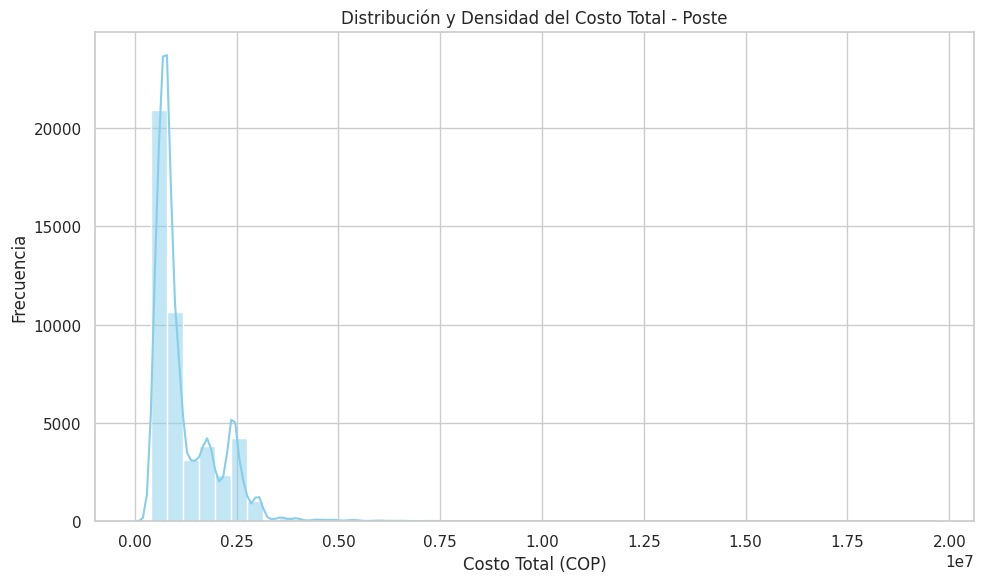

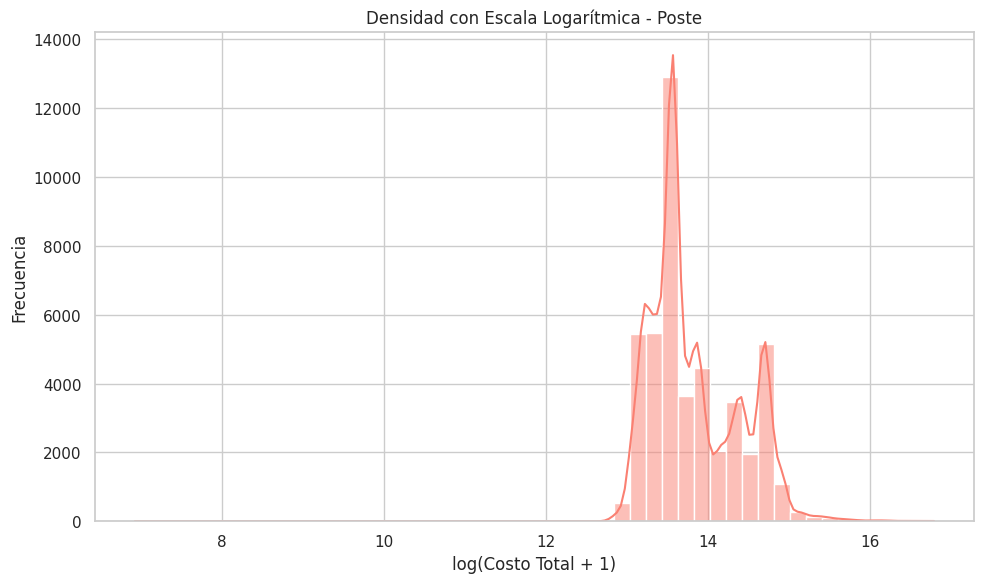

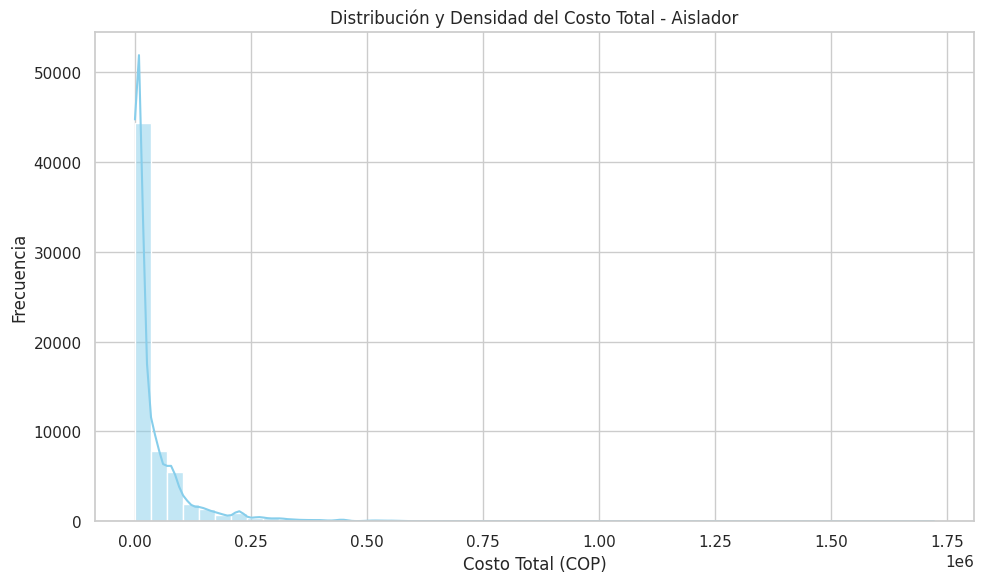

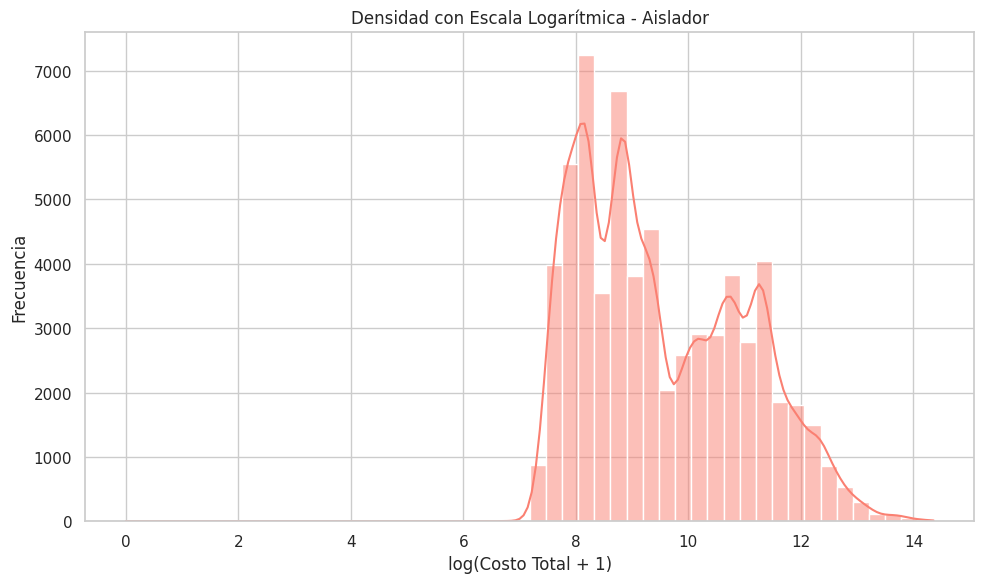

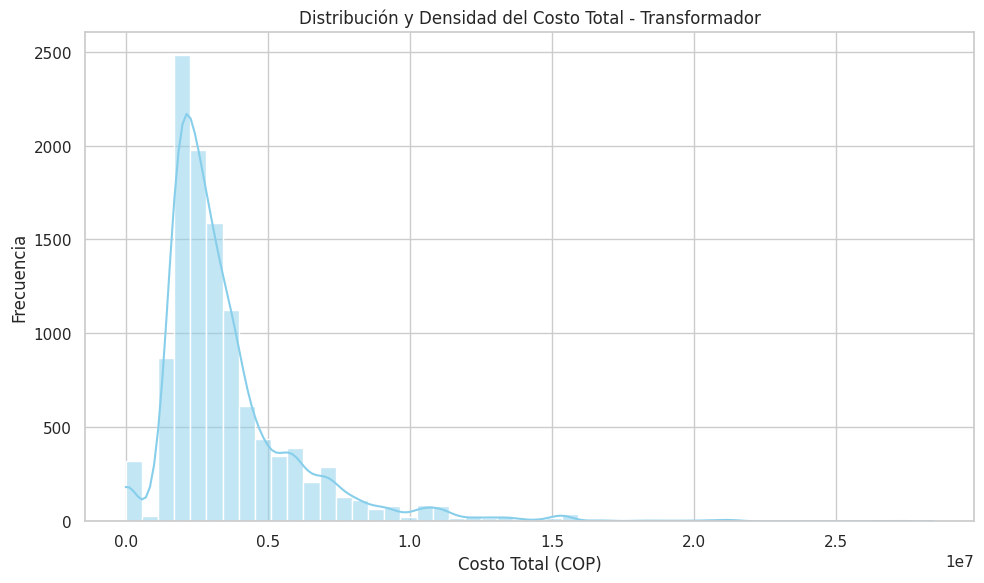

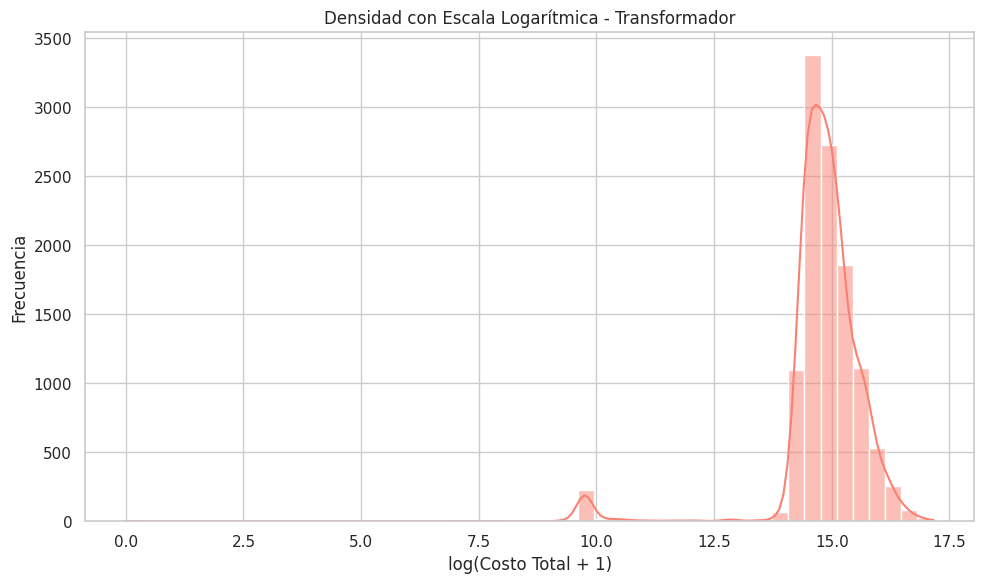

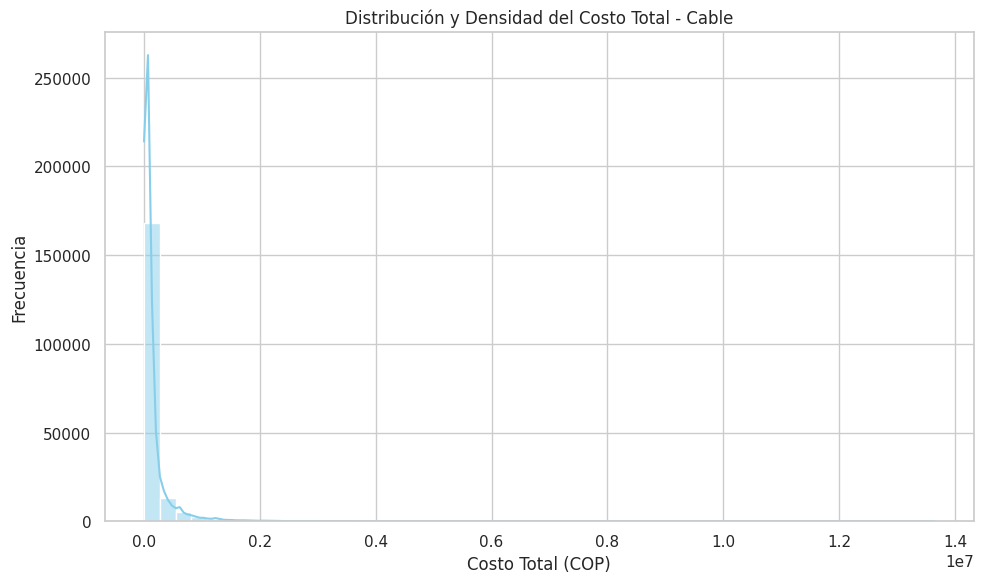

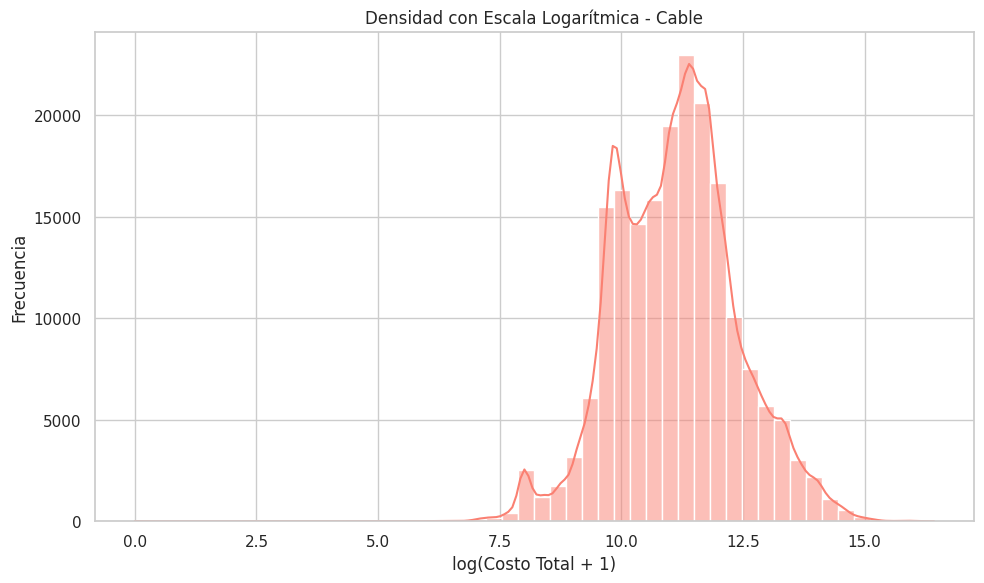

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar estilo visual
sns.set(style="whitegrid")

# Lista de categorías (puedes cambiar o dejar automático)
categorias = bd_final['Descriptor general'].unique()

# Gráficos de distribución y densidad por categoría
for categoria in categorias:
    df_categoria = bd_final[bd_final['Descriptor general'] == categoria]

    # --- DISTRIBUCIÓN NORMAL ---
    plt.figure(figsize=(10, 6))
    sns.histplot(df_categoria['Costo Total'], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribución y Densidad del Costo Total - {categoria}')
    plt.xlabel('Costo Total (COP)')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

    # --- DISTRIBUCIÓN LOGARÍTMICA ---
    plt.figure(figsize=(10, 6))
    sns.histplot(np.log1p(df_categoria['Costo Total']), kde=True, bins=50, color='salmon')
    plt.title(f'Densidad con Escala Logarítmica - {categoria}')
    plt.xlabel('log(Costo Total + 1)')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


##**Graficas box plot para revision de outliers**

Genero graficas Box plot para revisar mi conjunto de datos identificando facilmente si existen y la cantidad de outlaiers, como de la ubicacion de mis datos.


Categoría: Poste
Año 2021: 4.81% outliers (438 de 9098 valores)
Año 2022: 2.31% outliers (213 de 9237 valores)
Año 2023: 1.02% outliers (131 de 12781 valores)
Año 2024: 0.45% outliers (70 de 15714 valores)


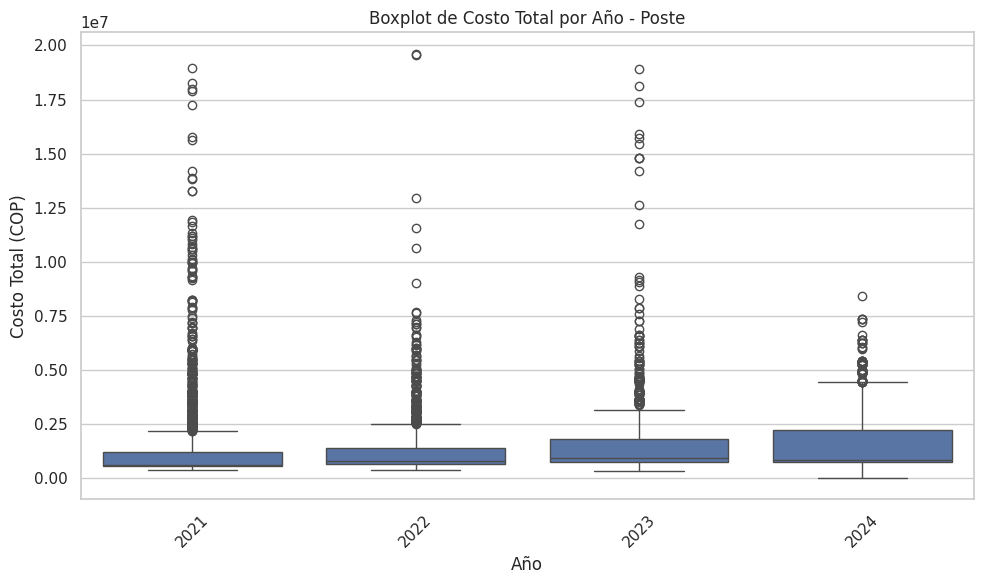


Categoría: Aislador
Año 2021: 8.49% outliers (960 de 11301 valores)
Año 2022: 9.32% outliers (1186 de 12729 valores)
Año 2023: 10.15% outliers (1799 de 17731 valores)
Año 2024: 7.68% outliers (1743 de 22705 valores)


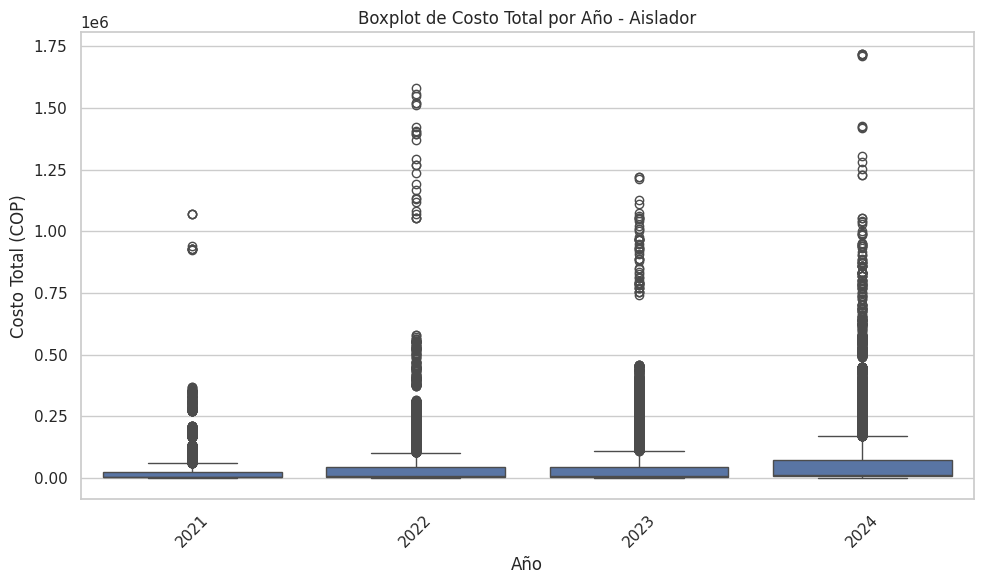


Categoría: Transformador
Año 2021: 9.63% outliers (240 de 2491 valores)
Año 2022: 10.36% outliers (306 de 2953 valores)
Año 2023: 5.21% outliers (157 de 3016 valores)
Año 2024: 6.64% outliers (198 de 2980 valores)


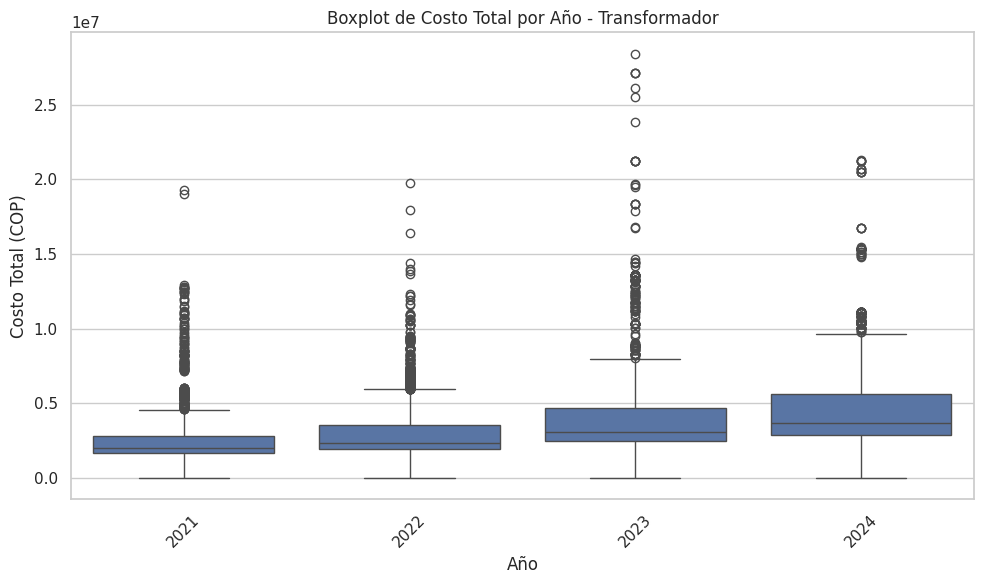


Categoría: Cable
Año 2021: 9.88% outliers (3667 de 37123 valores)
Año 2022: 10.19% outliers (4035 de 39615 valores)
Año 2023: 11.60% outliers (5688 de 49015 valores)
Año 2024: 11.11% outliers (7445 de 67002 valores)


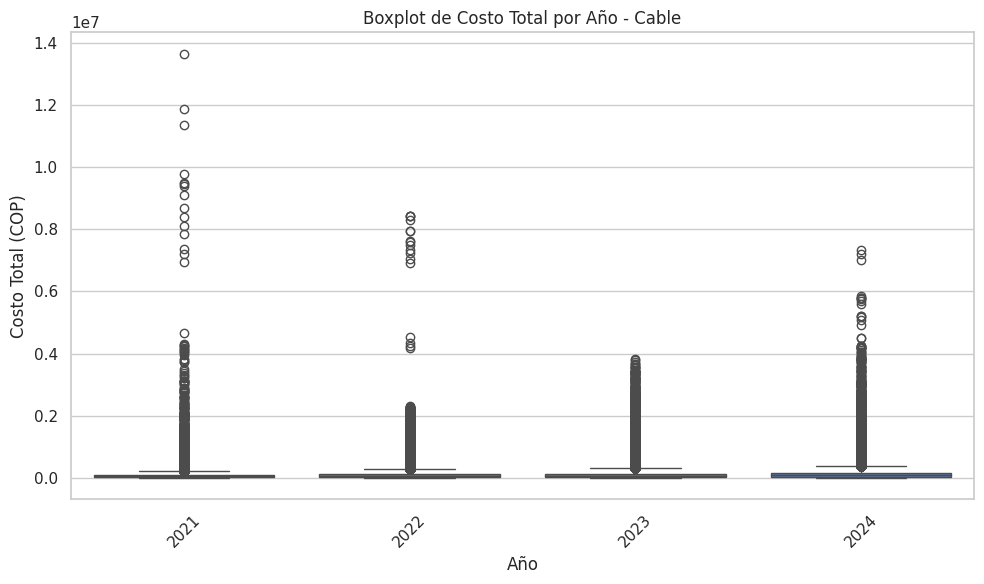

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Establecer estilo
sns.set(style="whitegrid")

# Me aseguro que sea formato fecha y eliminar filas nulas
bd_final['Fecha Transacción'] = pd.to_datetime(bd_final['Fecha Transacción'], errors='coerce')
bd_final = bd_final.dropna(subset=['Fecha Transacción'])  # Elimina fechas no válidas

# Ahora sí puedes extraer el año como entero
bd_final['Año'] = bd_final['Fecha Transacción'].dt.year.astype(int)


# Crear un boxplot y calcular porcentaje de outliers para cada descriptor general
for categoria in categorias:
    df_categoria = bd_final[bd_final['Descriptor general'] == categoria]
    print(f"\nCategoría: {categoria}")

    # Por cada año dentro de esta categoría
    for año in sorted(df_categoria['Año'].unique()):
        df_año = df_categoria[df_categoria['Año'] == año]
        valores = df_año['Costo Total']

        # Calcular Q1, Q3, IQR
        Q1 = valores.quantile(0.25)
        Q3 = valores.quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Contar outliers
        outliers = valores[(valores < limite_inferior) | (valores > limite_superior)]
        porcentaje_outliers = (len(outliers) / len(valores)) * 100 if len(valores) > 0 else 0

        print(f"Año {año}: {porcentaje_outliers:.2f}% outliers ({len(outliers)} de {len(valores)} valores)")

    # Mostrar boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Año', y='Costo Total', data=df_categoria)
    plt.title(f'Boxplot de Costo Total por Año - {categoria}')
    plt.ylabel('Costo Total (COP)')
    plt.xlabel('Año')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Como en el boxplot identifique la existencia de outlaiers, reviso si son datos reales y logicos.

In [ ]:
# Obtener los dos registros con mayor 'Costo Total' por cada 'Descriptor general'
top2_por_descriptor = bd_final.groupby('Descriptor general', group_keys=False).apply(
    lambda x: x.nlargest(2, 'Costo Total')
)

# Mostrar el resultado del top 2 por descriptor.

top2_por_descriptor.head(8)

<ipython-input-11-77bac05067c8>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top2_por_descriptor = bd_final.groupby('Descriptor general', group_keys=False).apply(


Unidad de Negocio Codigo del Articulo  \
854824        33REPOCTRA              200147   
854825        33REPOCTRA              200147   
659           33REPOCTRA              200329   
660           33REPOCTRA              218513   
376371        33REPOCTRA              200059   
417570        33REPOCTRA              200059   
786074        33REPOCTRA              200229   
839013        33REPOCTRA              218503   

                                              Descripcion Numero Documento  \
854824  AISLADOR SUSP PORC 48KV10" ANSI C29.2 CL 52-4 ...          5175919   
854825  AISLADOR SUSP PORC 48KV10" ANSI C29.2 CL 52-4 ...          5175919   
659         CABLE CU 1/0AWGMPOLAR AIS XLPE/LLDPE 15KV100%          4463800   
660     CABLE AAC 2X1/0 + ACSR 1X2AWGTPLEX AIS XLPE 60...          4346124   
376371                    POSTE PRFV 12M 750KGFSECCIONADO          4674584   
417570                    POSTE PRFV 12M 750KGFSECCIONADO          4303688   
786074  TRANSFORMADOR 3F 112.5KVA13200V 220-127V CONV ...          5012283   
839013   TRANSFORMADOR 3F 75KVA13200V 220-127V CONV A/VEG          5025398   

       Número Batch Cantidad Unidad Medida Precio Unitario   Costo Total  \
854824     18646012      -24            UN        71710,12  1,721,043.00   
854825     18646012      -24            UN        71710,12  1,721,043.00   
659        12854778     -500            ML        27293,26 13,646,630.00   
660        12003719     -290            ML       40.880,77 11,855,423.00   
376371     14241943      -12            UN    1.635.500,00 19,626,000.00   
417570     14456348      -12            UN      1630476,02 19,565,712.00   
786074     16895580       -1            UN     28431015,86 28,431,016.00   
839013     17051415       -1            UN     27118405,84 27,118,406.00   

       Fecha Transacción Almacen                  Descripcion OT  \
854824        2024-09-12    Y060          MATERIALES OT 21999464   
854825        2024-09-12    Y060          MATERIALES OT 21999464   
659           2021-09-23    A300  INSTALACIÓN TRANSFORMADOR  307   
660           2021-02-26    A316                  CABLES TPLX1/0   
376371        2022-07-21    A312  POSTES FIB-12M-DEUADA ALUMB PU   
417570        2022-09-02    Y012  CAMBIAR CINCO POSTES PRIMARIOS   
786074        2023-11-10    Y063  Cambiar Transformador con grúa   
839013        2023-12-01    Y063  Cambiar Transformador con grúa   

        Cant. Solicitada  Cant. Despachada Mensaje de Advertencia         Mes  \
854824             24.00             24.00    SISTEMA EXTERNO EAM  septiembre   
854825             24.00             24.00    SISTEMA EXTERNO EAM  septiembre   
659               500.00            500.00    SISTEMA EXTERNO EAM  septiembre   
660               290.00            290.00    ASIGNA EL PLANEADOR     febrero   
376371             12.00             12.00    ASIGNA EL PLANEADOR       julio   
417570             12.00             12.00    SISTEMA EXTERNO EAM  septiembre   
786074              1.00              1.00    SISTEMA EXTERNO EAM   noviembre   
839013              1.00              1.00    SISTEMA EXTERNO EAM   diciembre   

        GROT                          EQUIPO - REGION          UNIDAD  \
854824  DE22               MANTENIMIENTO - R. ORIENTE      MTTO NORTE   
854825  DE22               MANTENIMIENTO - R. ORIENTE      MTTO NORTE   
659     DE41       MANTENIMIENTO - REDES SUBTERRÁNEAS  SERVICIOS MTTO   
660     DE03     MANTENIMIENTO - R. METROPOLITANA SUR        MTTO SUR   
376371  DE21  MANTENIMIENTO - R. NORDESTE Y MAGDALENA        MTTO SUR   
417570  DE25              MANTENIMIENTO - R. SUROESTE        MTTO SUR   
786074  DE27                 MANTENIMIENTO - R. NORTE      MTTO NORTE   
839013  DE27                 MANTENIMIENTO - R. NORTE      MTTO NORTE   

       DEPENDENCIA COSTO ASIGNADO Descriptor general Descriptor Material  \
854824                 MTTO NORTE           Aislador  Aislador Porcelana   
854825                 MTTO NORTE

# **Series de tiempo.**

In [ ]:
# Importamos librerias para trabjar con series de tiempo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Para formateo del eje X, mejor visualizacion de los meses
import seaborn as sns
import statsmodels.tsa.api as tsa # Módulo específico para series de tiempo
from statsmodels.graphics.tsaplots import plot_acf # Para dibujar el correlograma
sns.set()

In [ ]:
#Identificamos los valores que tiene la columna
bd_final["Descriptor general"].value_counts()


Descriptor general
Cable            192755
Aislador          64466
Poste             46830
Transformador     11440
Name: count, dtype: int64

A continuacion, requiero identificar cual es el valor y el consumo diario por cada descriptor. Esto me permite identificar comodamente que productos se despachan mas y en que dias, identificacion de productos de alta rotacion, dias de despacho mas bajos.. etc.

In [ ]:
# Agrupar por 'Descriptor general' y fecha (convertida desde 'Fecha Transacción')
resultado = (
    bd_final.groupby(['Descriptor general', bd_final['Fecha Transacción'].dt.date])[['Costo Total', 'Cant. Despachada']]
    .sum()
    .reset_index()
    .rename(columns={
        'Fecha Transacción': 'fecha',  # Esto no es necesario porque no existe 'Fecha Transacción' en este punto
        'Costo Total': 'costo_total_diario',
        'Cant. Despachada': 'cant_despachada_diaria'
    })
)

# Cambio el nombre de la columna de fecha correctamente
resultado = resultado.rename(columns={ 'Fecha Transacción': 'fecha', 'Fecha Transacción': 'fecha' })
resultado = resultado.rename(columns={ resultado.columns[1]: 'fecha' })  # Asegura que el segundo nivel sea 'fecha'

# Me aseguro que la columna 'fecha' esté en formato datetime
resultado['fecha'] = pd.to_datetime(resultado['fecha'])

# Ordeno por 'Descriptor general' y 'fecha'
resultado = resultado.sort_values(by=['Descriptor general', 'fecha'])

# Se crea un menú desplegable para visualizar resultados por cada 'Descriptor general'
import ipywidgets as widgets
from IPython.display import display
from google.colab import files

valores_descriptor = resultado['Descriptor general'].unique()

def mostrar_tabla(descriptor):
    display(resultado[resultado['Descriptor general'] == descriptor])

selector = widgets.Dropdown(
    options=valores_descriptor,
    description='Descriptor:',
    layout=widgets.Layout(width='50%')
)

widgets.interact(mostrar_tabla, descriptor=selector)

# Guardar el DataFrame como archivo CSV delimitado por punto y coma
nombre_archivo = "resultado_costos_y_cantidades_por_dia.csv"
resultado.to_csv(nombre_archivo, index=False, sep=';')

# Descargar el archivo
files.download(nombre_archivo)

resultado.head()
resultado.info()


interactive(children=(Dropdown(description='Descriptor:', layout=Layout(width='50%'), options=('Aislador', 'Ca…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Descriptor general      4929 non-null   object        
 1   fecha                   4929 non-null   datetime64[ns]
 2   costo_total_diario      4929 non-null   float64       
 3   cant_despachada_diaria  4929 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 154.2+ KB


## Serie de tiempo de todos los descriptores en los años 2021, 2022, 2023 y 2024 mensual

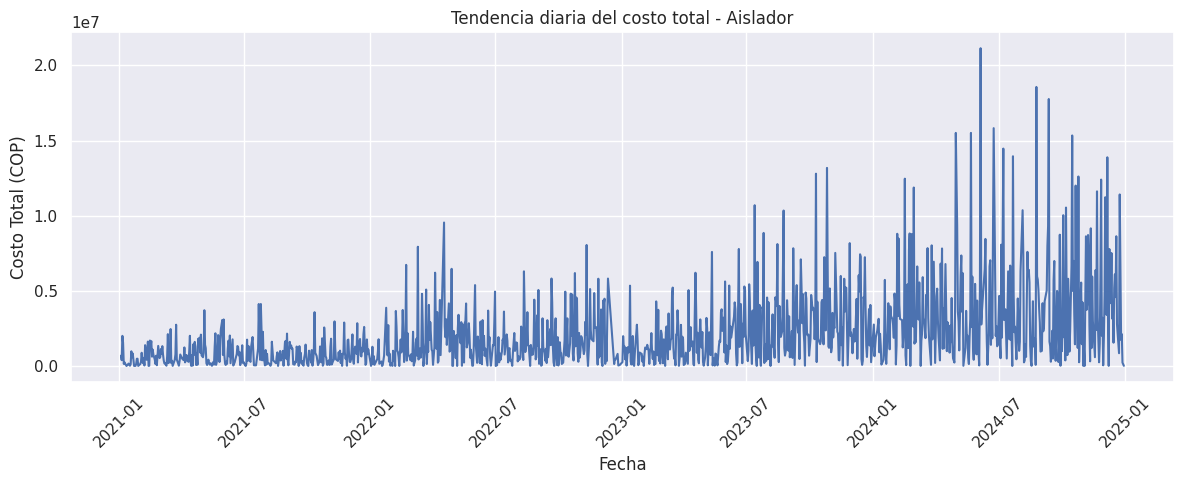

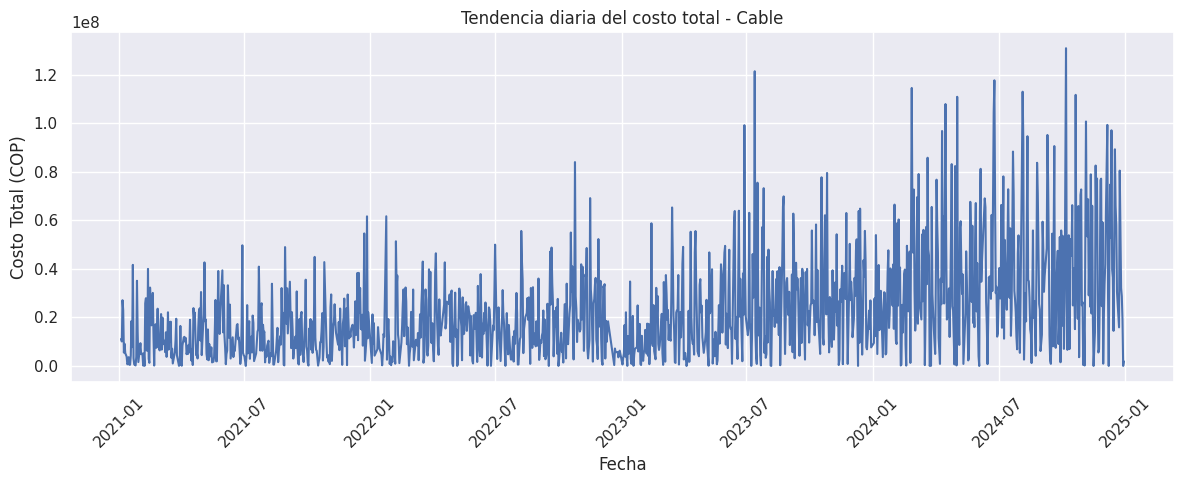

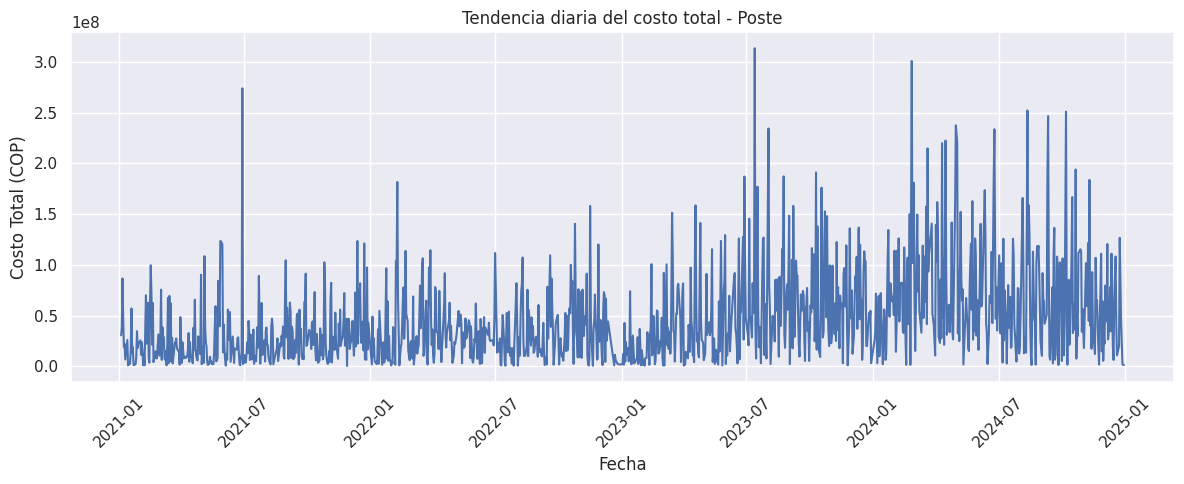

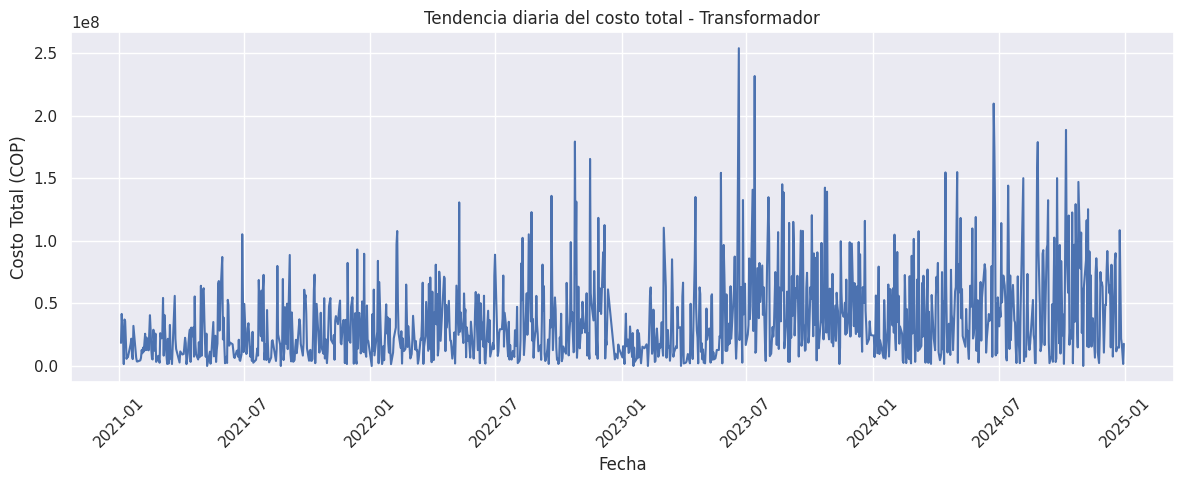

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por día y categoría, sumando el costo total
df_diario = (
    bd_final.groupby([pd.Grouper(key='Fecha Transacción', freq='D'), 'Descriptor general'])['Costo Total']
    .sum()
    .reset_index()
)

# Obtener la lista de categorías únicas
categorias = df_diario['Descriptor general'].unique()

# Crear una gráfica por cada categoría
for categoria in categorias:
    df_categoria = df_diario[df_diario['Descriptor general'] == categoria]

    plt.figure(figsize=(12, 5))
    plt.plot(df_categoria['Fecha Transacción'], df_categoria['Costo Total'])

    plt.title(f'Tendencia diaria del costo total - {categoria}')
    plt.xlabel('Fecha')
    plt.ylabel('Costo Total (COP)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



Como con el grafico anterior que muestra el consumo totoal en pesos diarios de cada material no es claro visualmente y dificilmente se puede hacer una analisis con este grafico, decido general el grafico mensual.

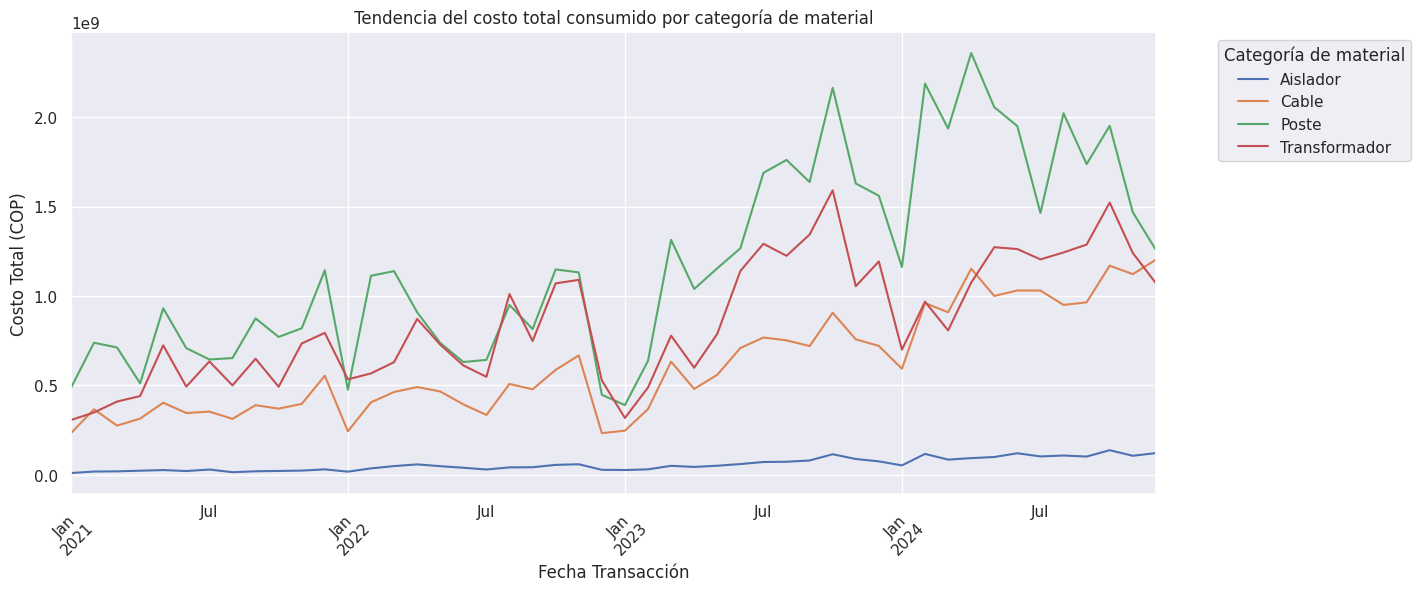

In [ ]:
# Despues identificamos por medio de grafica y serie de tiempo que cual es el valor de los materiales que mas se consume en meses.
# Agrupar por mes y categoría, sumando el costo total
df_mensual = (
    bd_final.groupby([pd.Grouper(key='Fecha Transacción', freq='ME'), 'Descriptor general'])['Costo Total']
    .sum()
    .reset_index()
)

# Pivotear para poner las categorías como columnas
df_pivot = df_mensual.pivot(index='Fecha Transacción', columns='Descriptor general', values='Costo Total')

# Graficar
fig, ax = plt.subplots(figsize=(14, 6))
df_pivot.plot(ax=ax)

# Títulos y etiquetas
ax.set_title('Tendencia del costo total consumido por categoría de material')
ax.set_xlabel('Fecha Transacción')
ax.set_ylabel('Costo Total (COP)')
plt.xticks(rotation=45)
# plt.tight_layout(pad=1.0)  # Aumenta el valor de pad para mayor espacio
# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Ajuste manual de los márgenes

# Leyenda fuera del gráfico
ax.legend(title='Categoría de material', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## Serie de tiempo por año.

Para una mejor observacion del comportamiento del costo consumido, discrimino por cada año los cuatro descriptores que estoy trabajando.

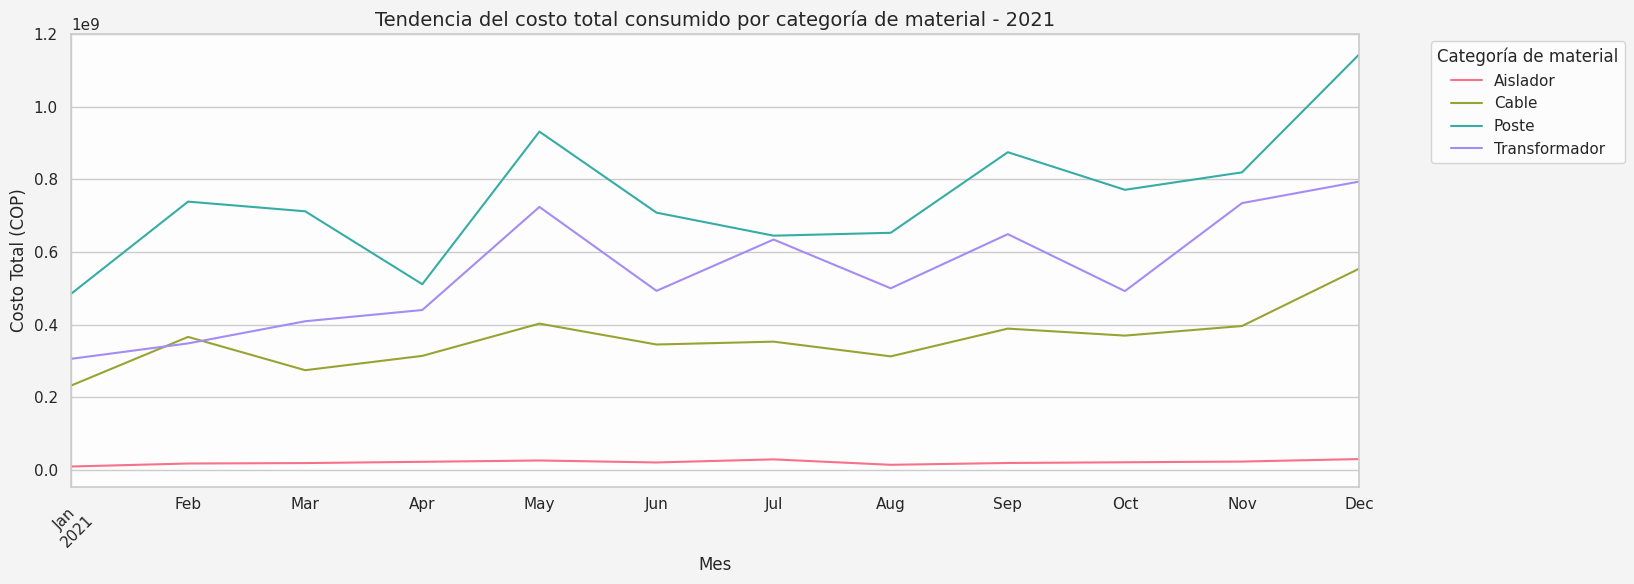

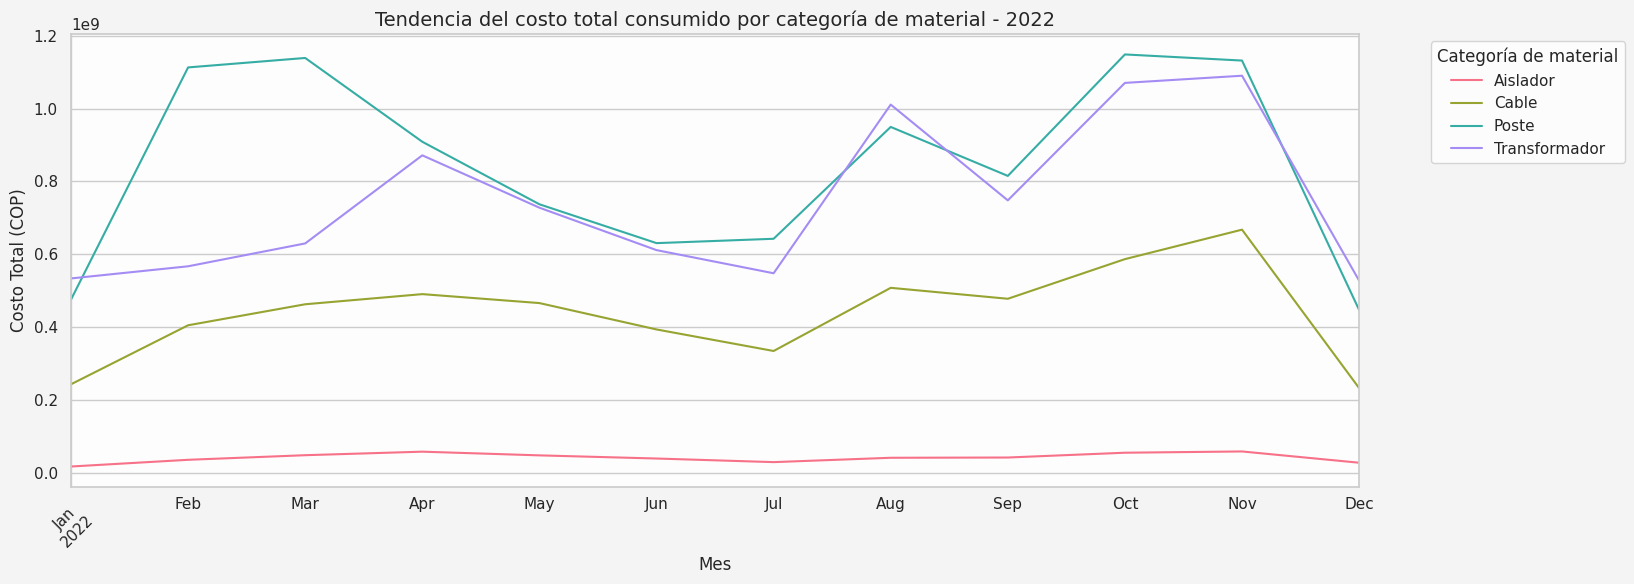

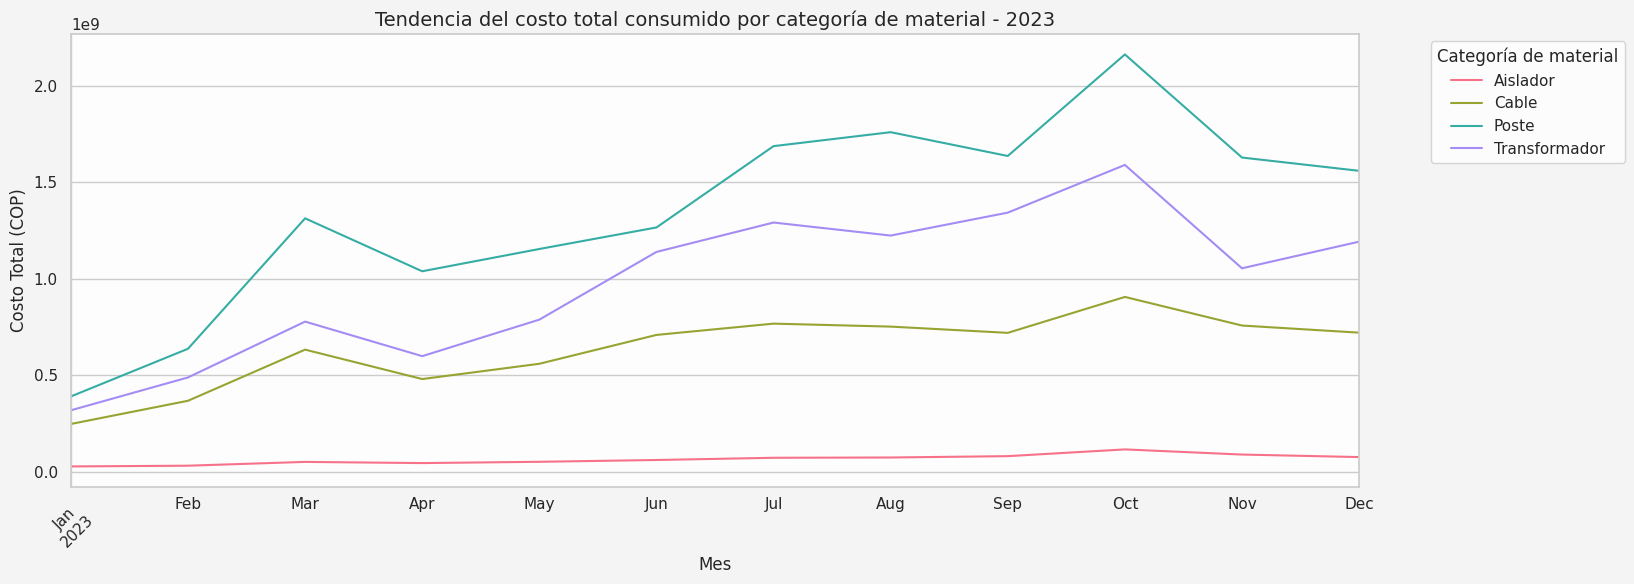

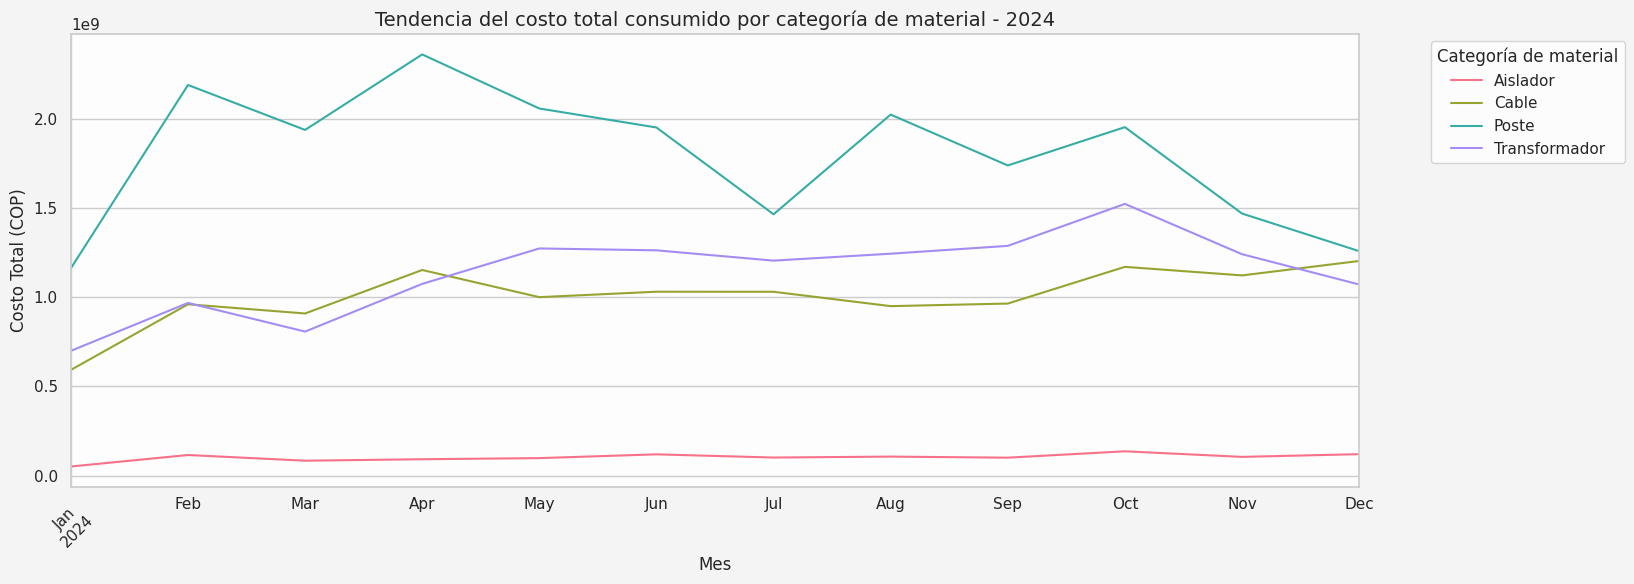

In [ ]:
# Serie de tiempo por año.
df_mensual = (
    bd_final.groupby([pd.Grouper(key='Fecha Transacción', freq='ME'), 'Descriptor general'])['Costo Total']
    .sum()
    .reset_index()
)

# Agregar columna de año para el filtrado
df_mensual['Año'] = df_mensual['Fecha Transacción'].dt.year

# Obtener todos los años disponibles
años = df_mensual['Año'].unique()

# Estilo general más suave
sns.set_style("whitegrid")  # Fondo blanco con líneas grises suaves

# Generar una gráfica por cada año
for año in sorted(años):
    df_anual = df_mensual[df_mensual['Año'] == año]

    # Pivotear para poner las categorías como columnas
    df_pivot = df_anual.pivot(index='Fecha Transacción', columns='Descriptor general', values='Costo Total')

    # Crear figura y eje
    fig, ax = plt.subplots(figsize=(14, 6))
    fig.patch.set_facecolor('#f4f4f4')   # Fondo suave gris claro
    ax.set_facecolor('#fdfdfd')          # Zona del gráfico un blanco casi gris

    # Usar paleta 'husl' para colores vivos
    palette = sns.color_palette('husl', n_colors=len(df_pivot.columns))

    # Graficar
    df_pivot.plot(ax=ax, color=palette)

    # Títulos y etiquetas
    ax.set_title(f'Tendencia del costo total consumido por categoría de material - {año}', fontsize=14)
    ax.set_xlabel('Mes', fontsize=12)
    ax.set_ylabel('Costo Total (COP)', fontsize=12)

    # Mejorar eje X
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Leyenda fuera del gráfico
    ax.legend(title='Categoría de material', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Mostrar gráfico
    plt.show()

## Serie de tiempo por descriptor, todos lo años.

Se construye series de tiempo separadas según el Descriptor general:

1. Alto costo total acumulado

2. Costo intermedio

3. Costo más bajo


Calculando el costo total acumulado por cada Descriptor general.

Ordenarlos de mayor a menor.

Elegir el de mayor, el de posición intermedia y el de menor.

Crear un gráfico de línea para cada uno mostrando su evolución mensual.

<ipython-input-18-0176af68e5f8>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-18-0176af68e5f8>:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


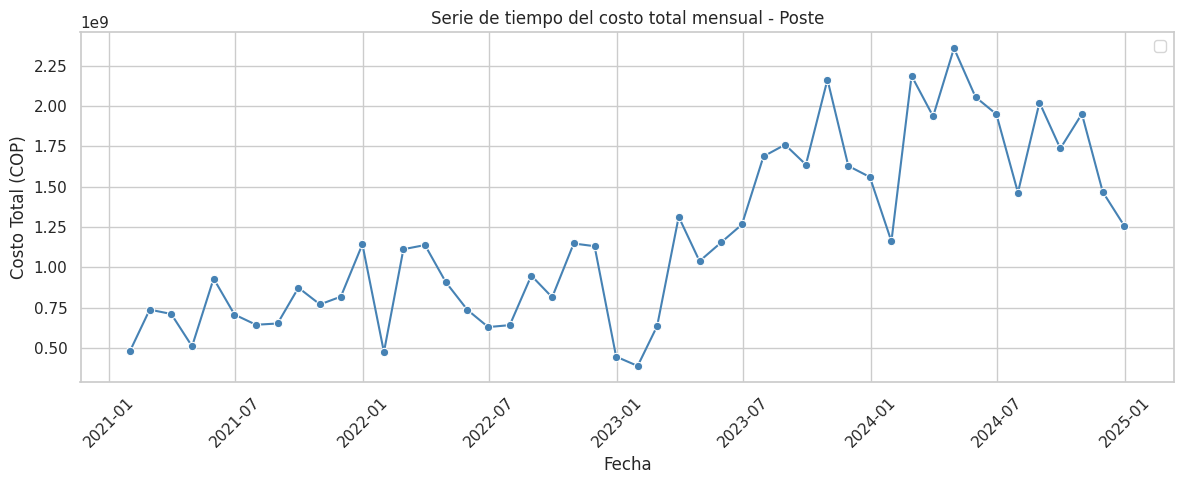

<ipython-input-18-0176af68e5f8>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-18-0176af68e5f8>:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


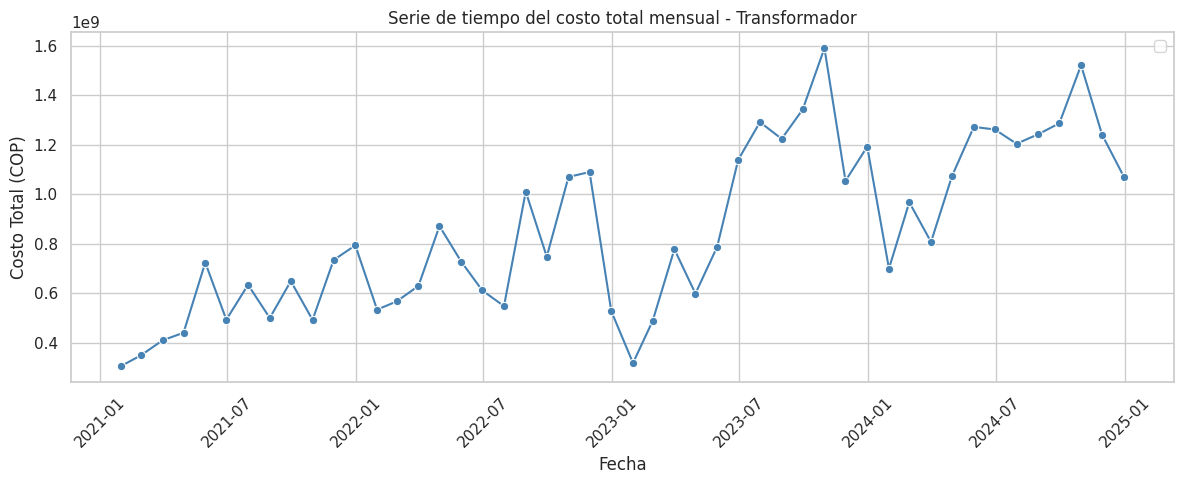

<ipython-input-18-0176af68e5f8>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-18-0176af68e5f8>:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


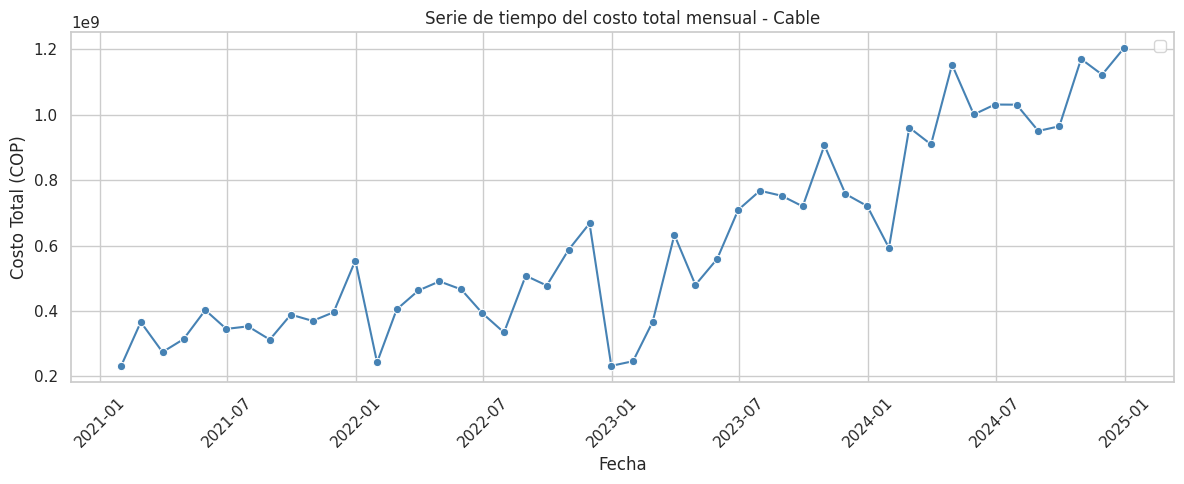

<ipython-input-18-0176af68e5f8>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-18-0176af68e5f8>:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


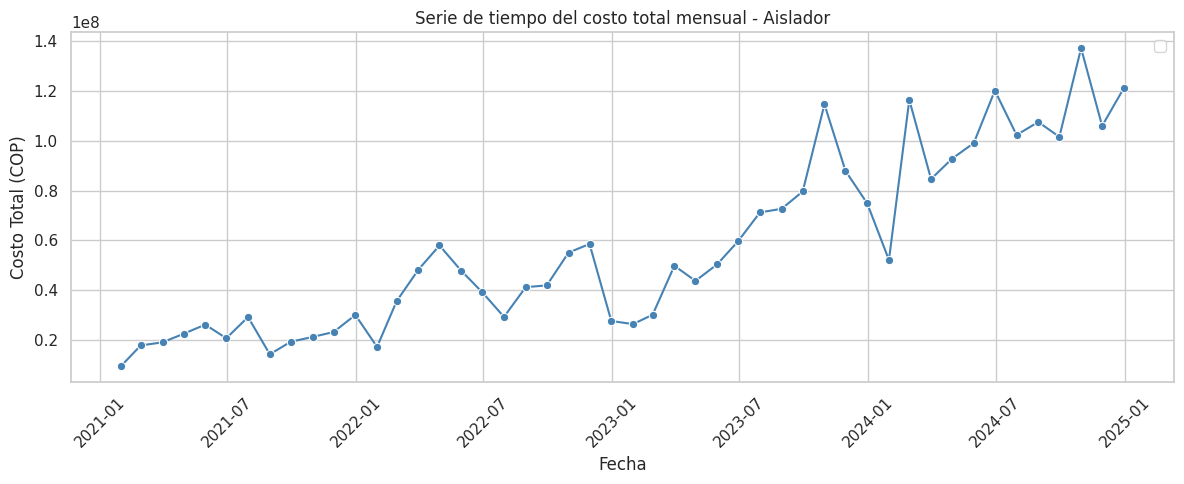

In [ ]:

# Agrupar por descriptor general y sumar costos totales acumulados
costos_totales = (
    bd_final.groupby('Descriptor general')['Costo Total']
    .sum()
    .sort_values(ascending=False)
)

# Ordenar las categorías de mayor a menor
categorias_ordenadas = costos_totales.index.tolist()

# Estilo claro y limpio
sns.set_style("whitegrid")

# Graficar serie de tiempo por categoría
for categoria in categorias_ordenadas:
    # Filtrar datos de la categoría
    df_categoria = bd_final[bd_final['Descriptor general'] == categoria]

    # Agrupar por mes y sumar costo total mensual
    df_mensual = (
        df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
        .sum()
        .reset_index()
    )

    # Calcular la media del costo mensual
    media_costo = df_mensual['Costo Total'].mean()

    # Crear gráfico
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df_mensual, x='Fecha Transacción', y='Costo Total', marker='o', color='steelblue')

    # Títulos y etiquetas
    plt.title(f'Serie de tiempo del costo total mensual - {categoria}')
    plt.xlabel('Fecha')
    plt.ylabel('Costo Total (COP)')
    plt.xticks(rotation=45)

    # Añadir leyenda y ajustar
    plt.legend()
    plt.tight_layout()
    plt.show()


## Descomposicion de cada categoria en todos los años

Realizo una descomposicion de mi serie de tiempo, por que requiero identificar:
1. Serie orgiginal.
2. identificar la **tendencia**, TREND me indica con grafico sencillo la evolucion de los datos a largo plazo.
3. Detectar **estacionalidad**, SEASONALITY me ayuda a identificar los patrones repetitivos.
4. Identificar los **ruidos** o **resuduo**, RESIDUAL me ayuda a identificar las fluctuaciones de los datos que no se explican por la tendencia ni por la estacionalidad.

<ipython-input-19-7cd52f582faa>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-19-7cd52f582faa>:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df_mensual['Costo Total'].asfreq('M')  # Esto asegura frecuencia mensual


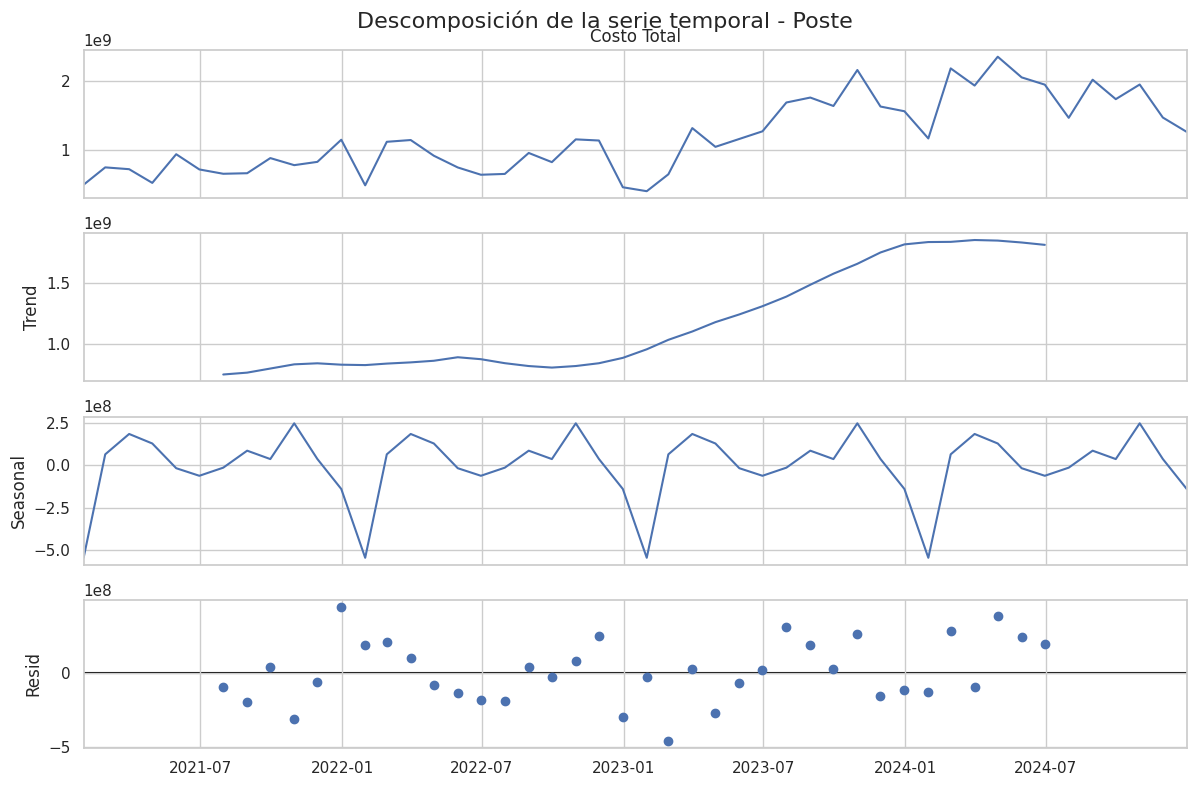

<ipython-input-19-7cd52f582faa>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-19-7cd52f582faa>:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df_mensual['Costo Total'].asfreq('M')  # Esto asegura frecuencia mensual


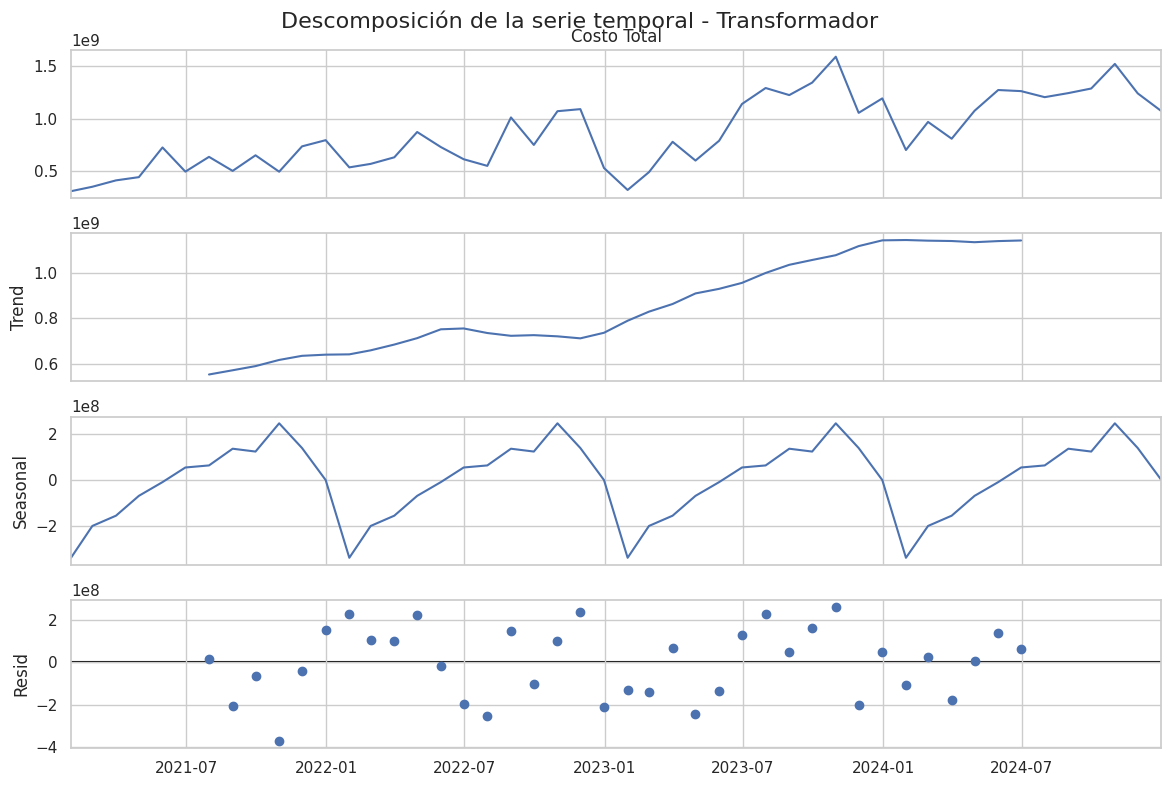

<ipython-input-19-7cd52f582faa>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-19-7cd52f582faa>:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df_mensual['Costo Total'].asfreq('M')  # Esto asegura frecuencia mensual


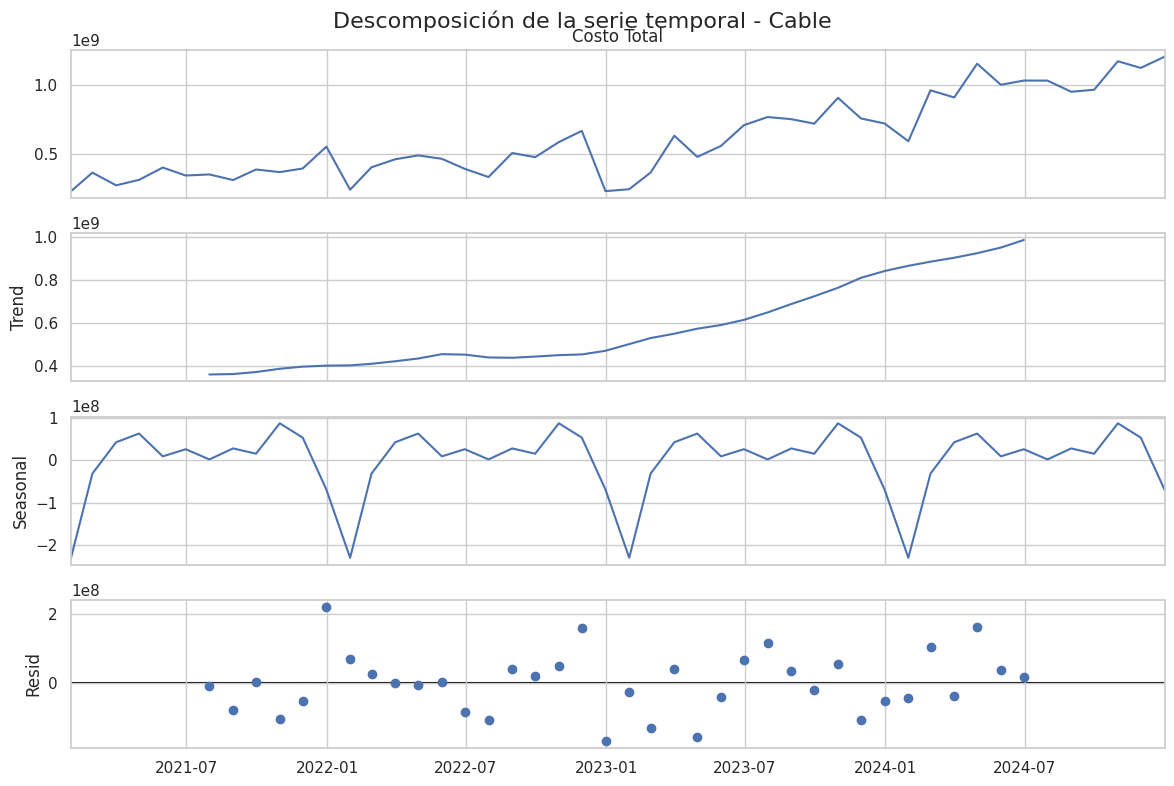

<ipython-input-19-7cd52f582faa>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-19-7cd52f582faa>:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df_mensual['Costo Total'].asfreq('M')  # Esto asegura frecuencia mensual


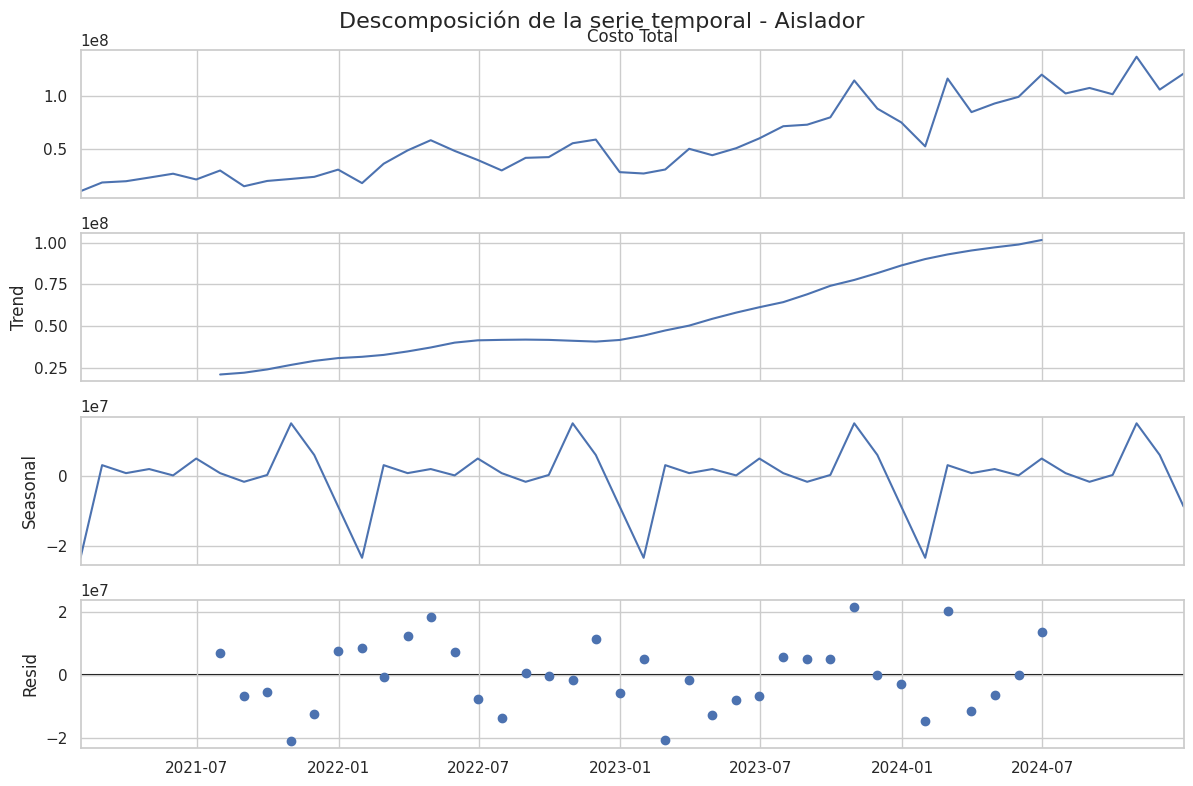

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo claro y limpio
sns.set_style("whitegrid")

# Agrupar por descriptor general y sumar costos totales acumulados
costos_totales = (
    bd_final.groupby('Descriptor general')['Costo Total']
    .sum()
    .sort_values(ascending=False)
)

# Ordenar las categorías de mayor a menor
categorias_ordenadas = costos_totales.index.tolist()

# Descomponer y graficar por categoría
for categoria in categorias_ordenadas:
    # Filtrar datos de la categoría
    df_categoria = bd_final[bd_final['Descriptor general'] == categoria]

    # Agrupar por mes y sumar costo total mensual
    df_mensual = (
        df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
        .sum()
        .reset_index()
    )

    # Asegurar que no haya valores nulos y esté en orden
    df_mensual = df_mensual.sort_values('Fecha Transacción').set_index('Fecha Transacción')
    serie = df_mensual['Costo Total'].asfreq('M')  # Esto asegura frecuencia mensual

    # Imputar NaN si los hay, para que seasonal_decompose no falle si hay meses vacíos.
    serie = serie.fillna(0)

    # Solo descomponer si hay suficientes datos
    if len(serie) >= 24:
        descomp = seasonal_decompose(serie, model='additive', period=12) # period=12: porque estamos usando frecuencia mensual, y esperamos un ciclo anual.

        # Graficar la descomposición
        fig = descomp.plot()
        fig.set_size_inches(12, 8)
        plt.suptitle(f"Descomposición de la serie temporal - {categoria}", fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.93)
        plt.show()
    else:
        print(f"No hay suficientes datos para descomponer la serie de: {categoria} (solo {len(serie)} meses)")


## Estacionalidad de todas las categorias.

Quiero hacerle zoom a la estacionalidad ya que me esta indicando los meses con mayur conusmo por cada agrupador; haciendo un analisis externo a lo que voy a presentar me coincide que los meses con mayur consumo de materiales a los alrgo de los años coniciden con los meses los cuales en Antioquia teniamos fenomeno de la niña.

In [ ]:
# Se hace la descomposicion
descomp = seasonal_decompose(serie, model='additive', period=12)

# Extraer de la descomposición
obs = descomp.observed   # Serie original
tend = descomp.trend     # Tendencia
esta = descomp.seasonal  # Estacionalidad
resi = descomp.resid     # Residuo

<ipython-input-21-c343d033325e>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-21-c343d033325e>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df_mensual['Costo Total'].asfreq('M').fillna(0)


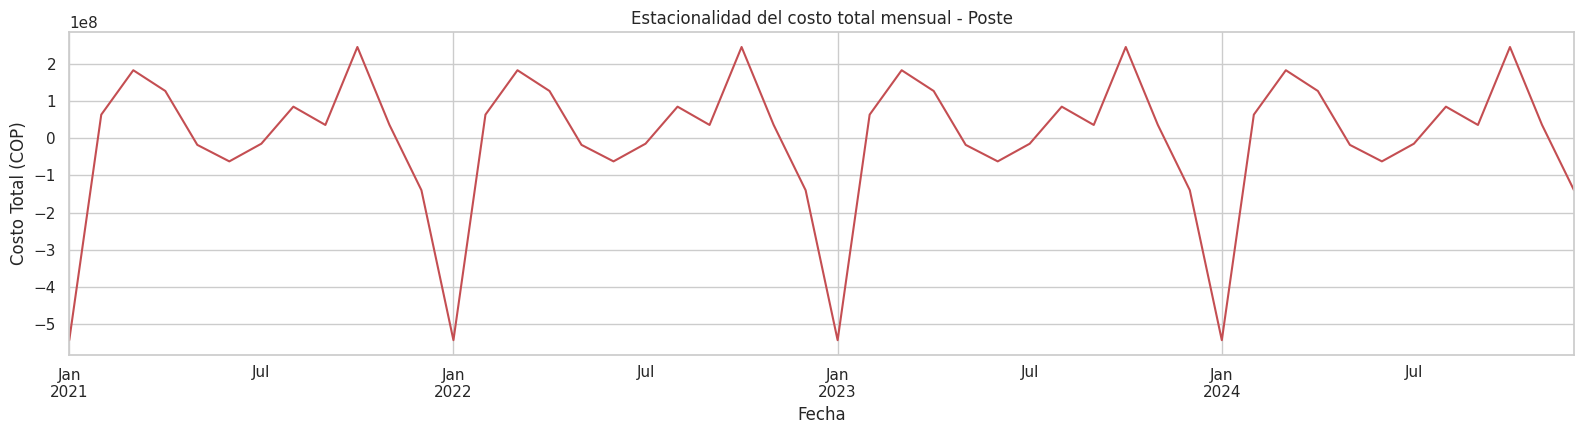

<ipython-input-21-c343d033325e>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-21-c343d033325e>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df_mensual['Costo Total'].asfreq('M').fillna(0)


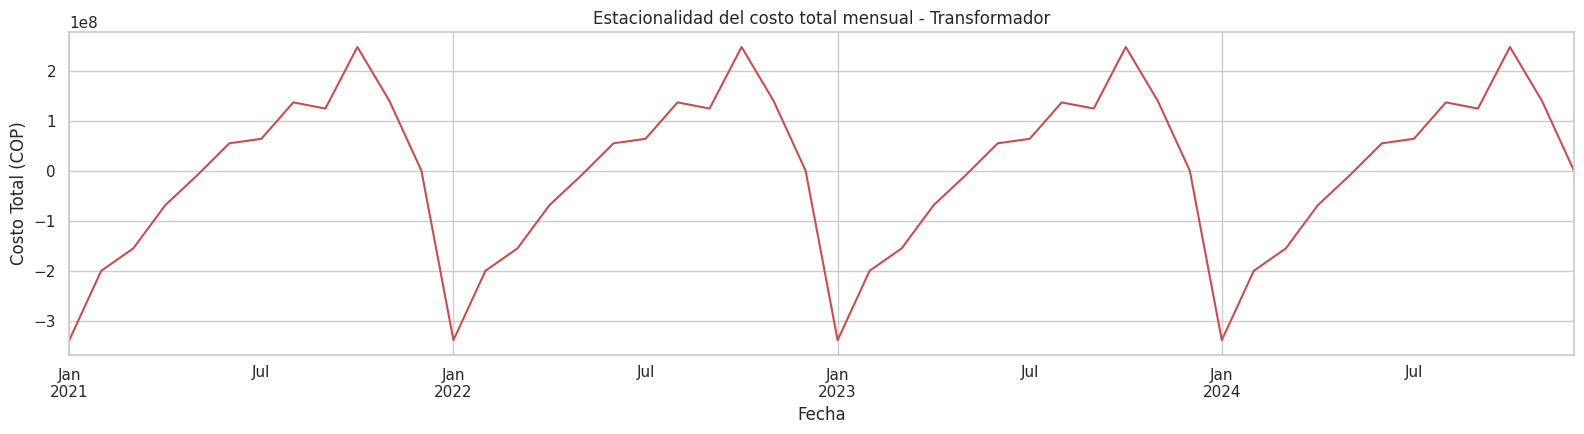

<ipython-input-21-c343d033325e>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-21-c343d033325e>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df_mensual['Costo Total'].asfreq('M').fillna(0)


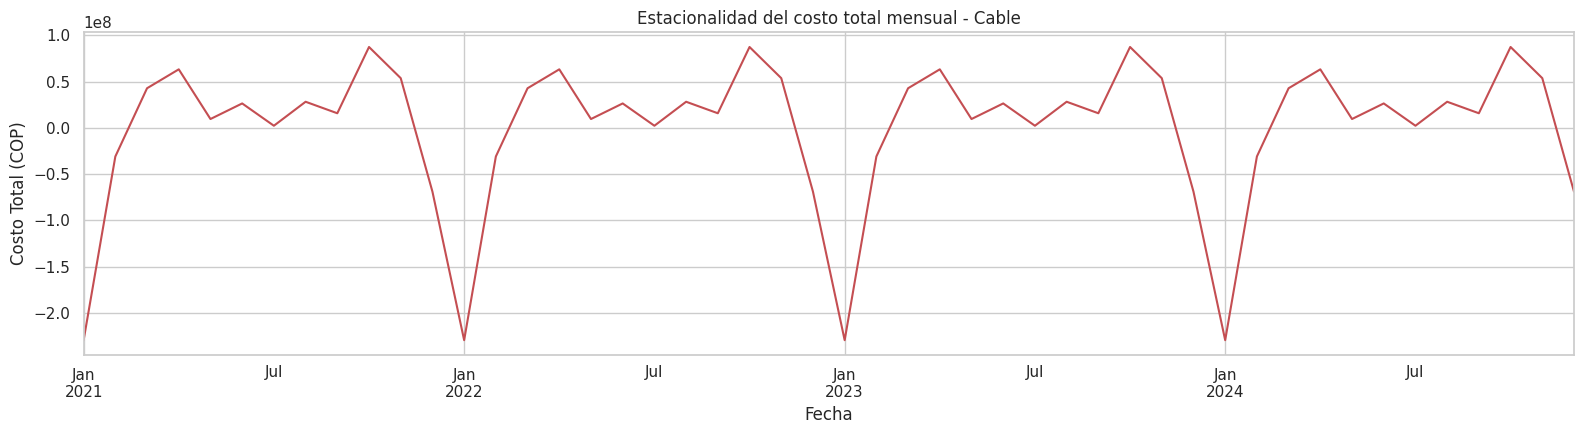

<ipython-input-21-c343d033325e>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-21-c343d033325e>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df_mensual['Costo Total'].asfreq('M').fillna(0)


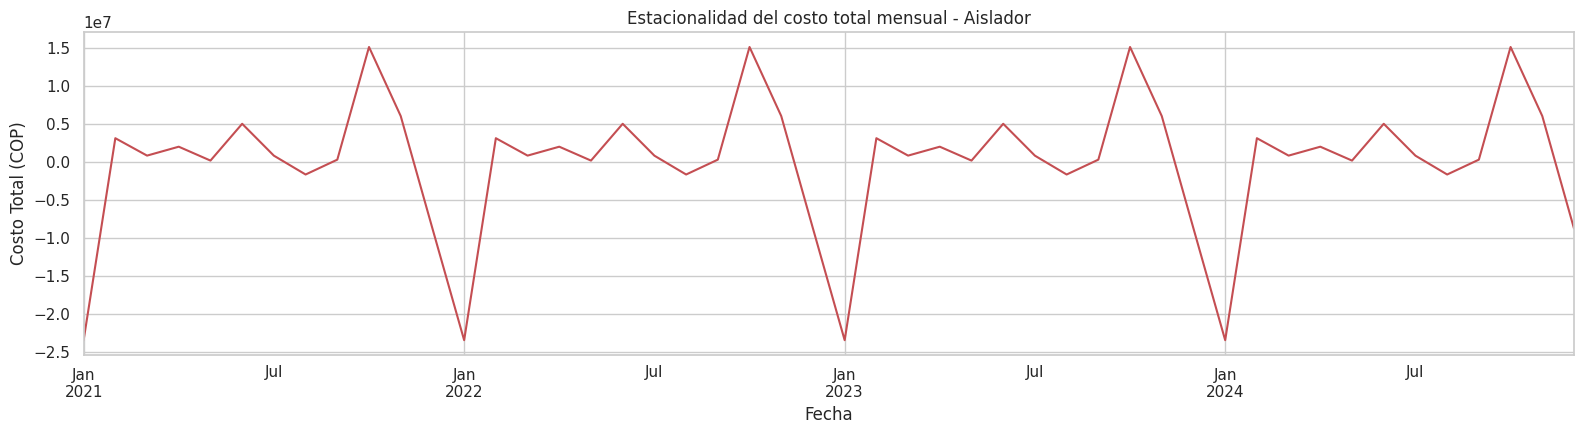

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set_style("whitegrid")

# Agrupar por descriptor general y obtener categorías ordenadas por costo total
costos_totales = (
    bd_final.groupby('Descriptor general')['Costo Total']
    .sum()
    .sort_values(ascending=False)
)

categorias_ordenadas = costos_totales.index.tolist()

# Iterar sobre cada categoría
for categoria in categorias_ordenadas:
    # Filtrar datos de la categoría
    df_categoria = bd_final[bd_final['Descriptor general'] == categoria]

    # Agrupar por mes y sumar el costo total mensual
    df_mensual = (
        df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
        .sum()
        .reset_index()
    )

    # Preparar la serie de tiempo con frecuencia mensual
    df_mensual = df_mensual.sort_values('Fecha Transacción').set_index('Fecha Transacción')
    serie = df_mensual['Costo Total'].asfreq('M').fillna(0)

    # Solo descomponer si hay suficientes datos
    if len(serie) >= 24:
        try:
            descomp = seasonal_decompose(serie, model='additive', period=12)
            esta = descomp.seasonal

            # Graficar solo la estacionalidad con tamaño amplio
            plt.figure(figsize=(16, 4.5))
            esta.plot(color='r', grid=True)

            plt.ylabel('Costo Total (COP)')
            plt.xlabel('Fecha')
            plt.title(f'Estacionalidad del costo total mensual - {categoria}')
            plt.tight_layout()
            plt.show()

            # Opcional: guardar la gráfica
            # plt.savefig(f"estacionalidad_{categoria}.png", dpi=300)

        except Exception as e:
            print(f"⚠️ Error al descomponer la categoría '{categoria}': {e}")
    else:
        print(f"⏭️ Categoría '{categoria}' omitida: solo {len(serie)} meses disponibles.")


<ipython-input-22-e1d9add93157>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-22-e1d9add93157>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df_mensual['Costo Total'].asfreq('M').fillna(0)


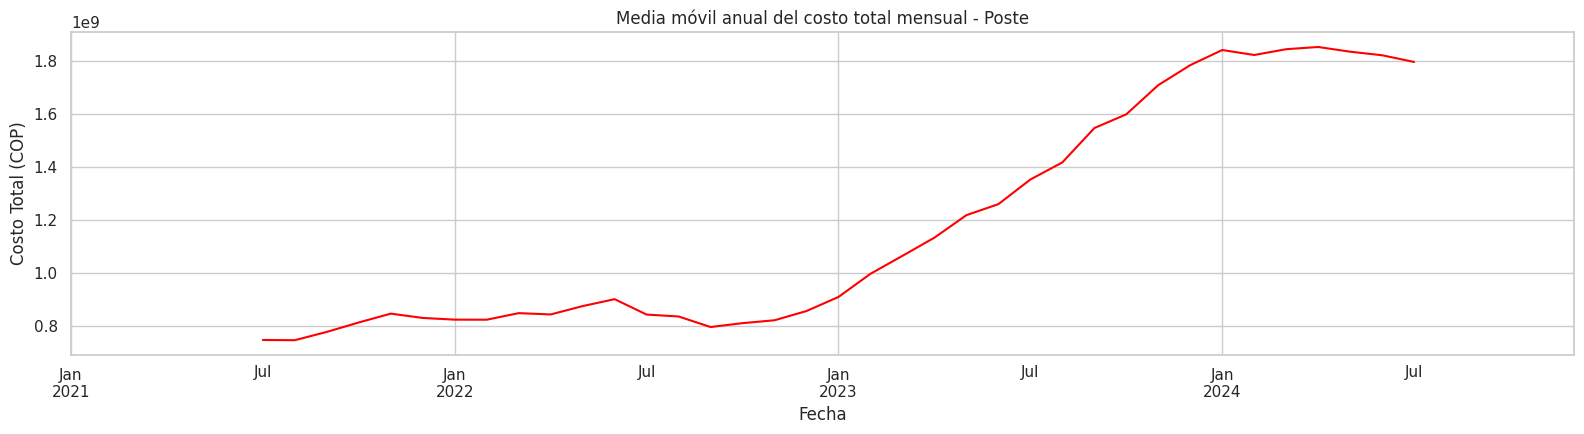

<ipython-input-22-e1d9add93157>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-22-e1d9add93157>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df_mensual['Costo Total'].asfreq('M').fillna(0)


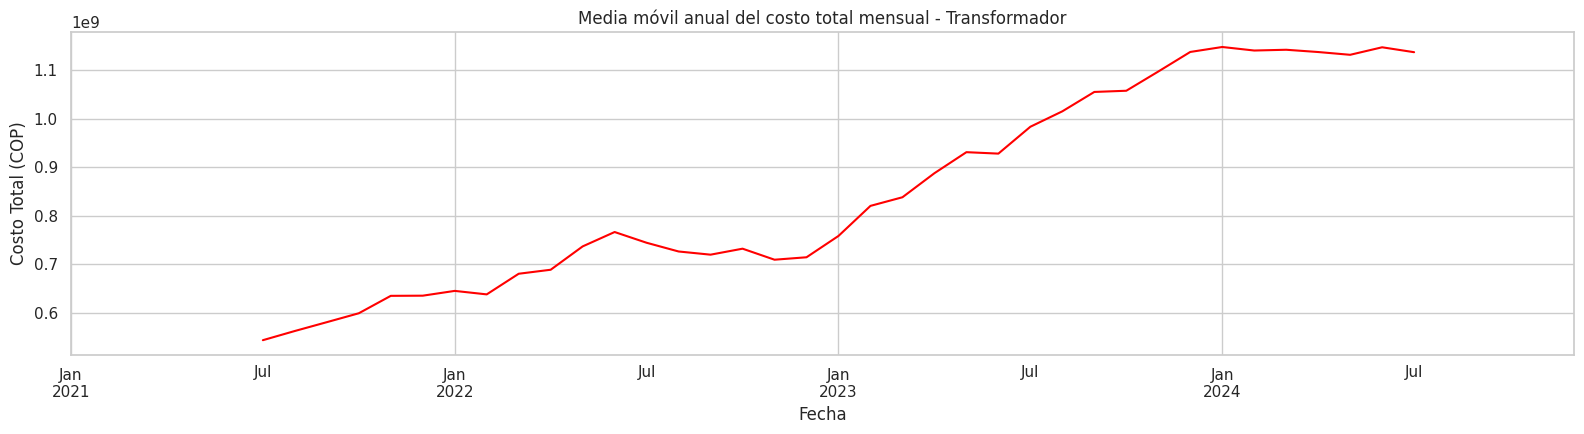

<ipython-input-22-e1d9add93157>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-22-e1d9add93157>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df_mensual['Costo Total'].asfreq('M').fillna(0)


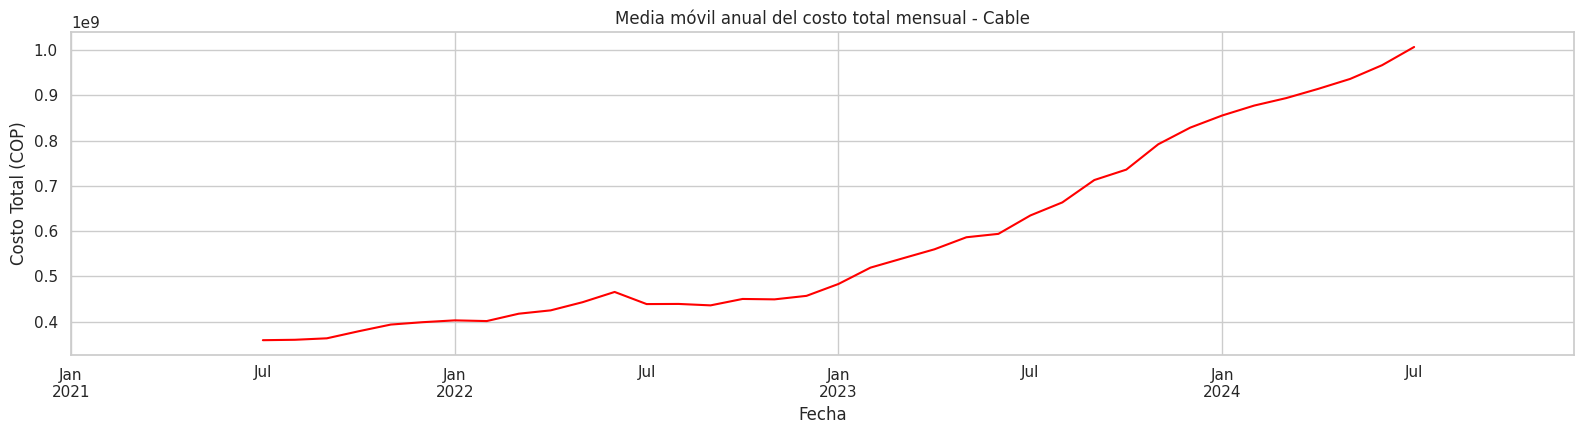

<ipython-input-22-e1d9add93157>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
<ipython-input-22-e1d9add93157>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df_mensual['Costo Total'].asfreq('M').fillna(0)


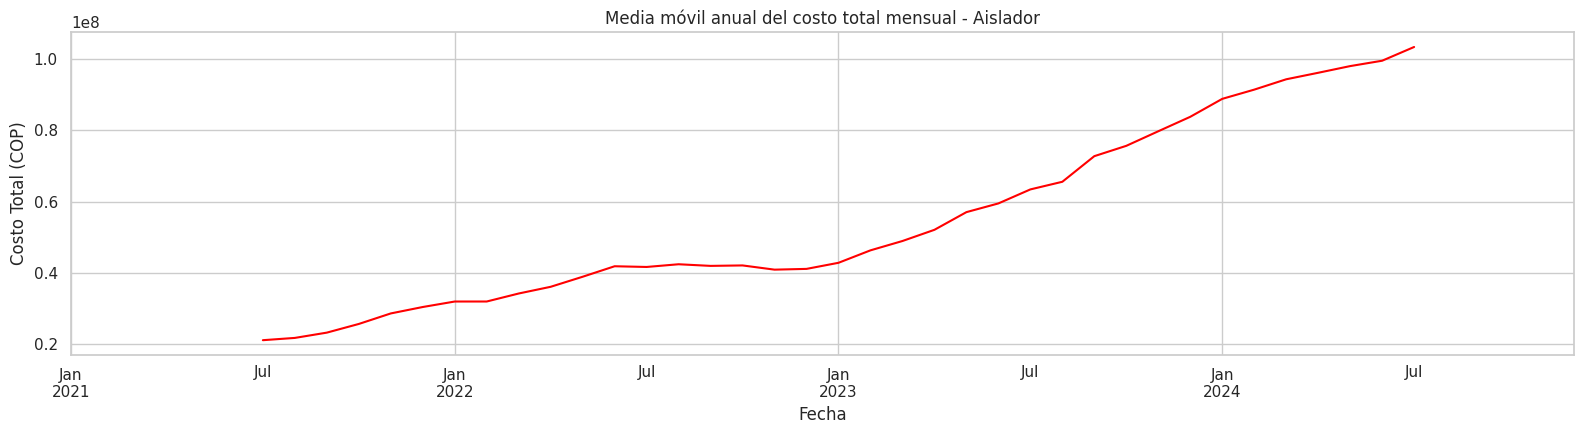

In [ ]:
# Estilo de gráficos
sns.set_style("whitegrid")

# Agrupar por descriptor general y obtener categorías ordenadas por costo total
costos_totales = (
    bd_final.groupby('Descriptor general')['Costo Total']
    .sum()
    .sort_values(ascending=False)
)

categorias_ordenadas = costos_totales.index.tolist()

# Iterar sobre cada categoría
for categoria in categorias_ordenadas:
    # Filtrar datos de la categoría
    df_categoria = bd_final[bd_final['Descriptor general'] == categoria]

    # Agrupar por mes y sumar el costo total mensual
    df_mensual = (
        df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='M'))['Costo Total']
        .sum()
        .reset_index()
    )

    # Preparar la serie de tiempo con frecuencia mensual
    df_mensual = df_mensual.sort_values('Fecha Transacción').set_index('Fecha Transacción')
    serie = df_mensual['Costo Total'].asfreq('M').fillna(0)

    # Solo graficar si hay suficientes datos
    if len(serie) >= 12:
        # Calcular media móvil anual centrada (12 meses)
        media_movil_anual = serie.rolling(window=12, center=True).mean()

        # Graficar
        plt.figure(figsize=(16, 4.5))
        media_movil_anual.plot(color='red', grid=True)

        plt.ylabel('Costo Total (COP)')
        plt.xlabel('Fecha')
        plt.title(f'Media móvil anual del costo total mensual - {categoria}')
        plt.tight_layout()
        plt.show()

    else:
        print(f"⏭️ Categoría '{categoria}' omitida: solo {len(serie)} meses disponibles.")


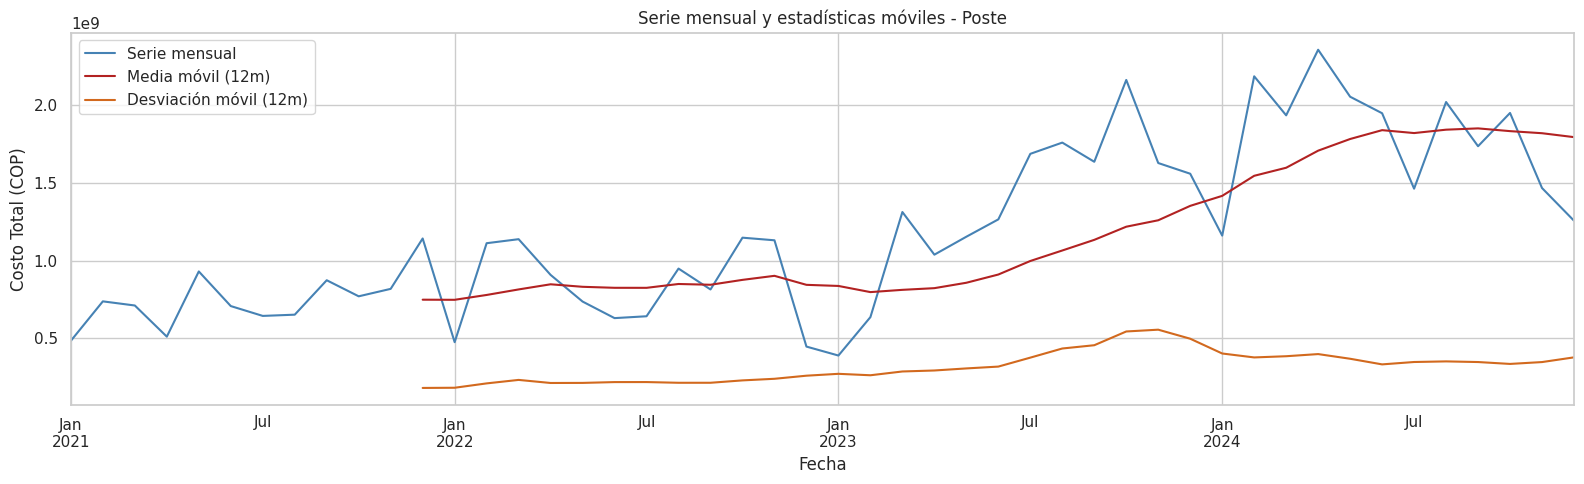

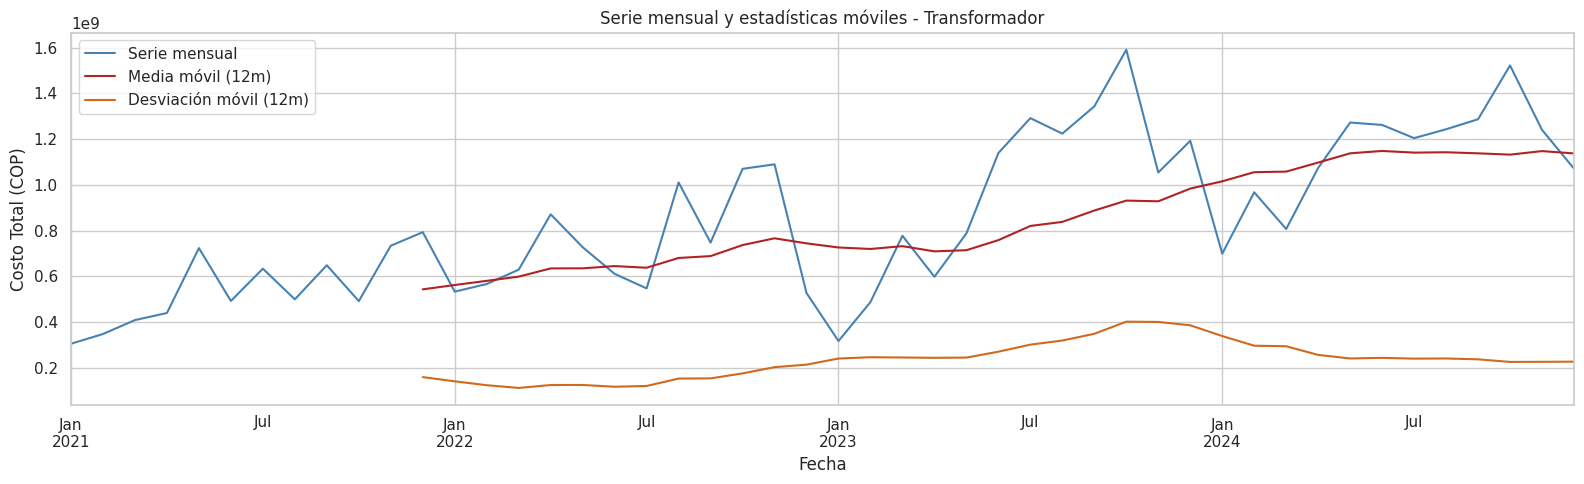

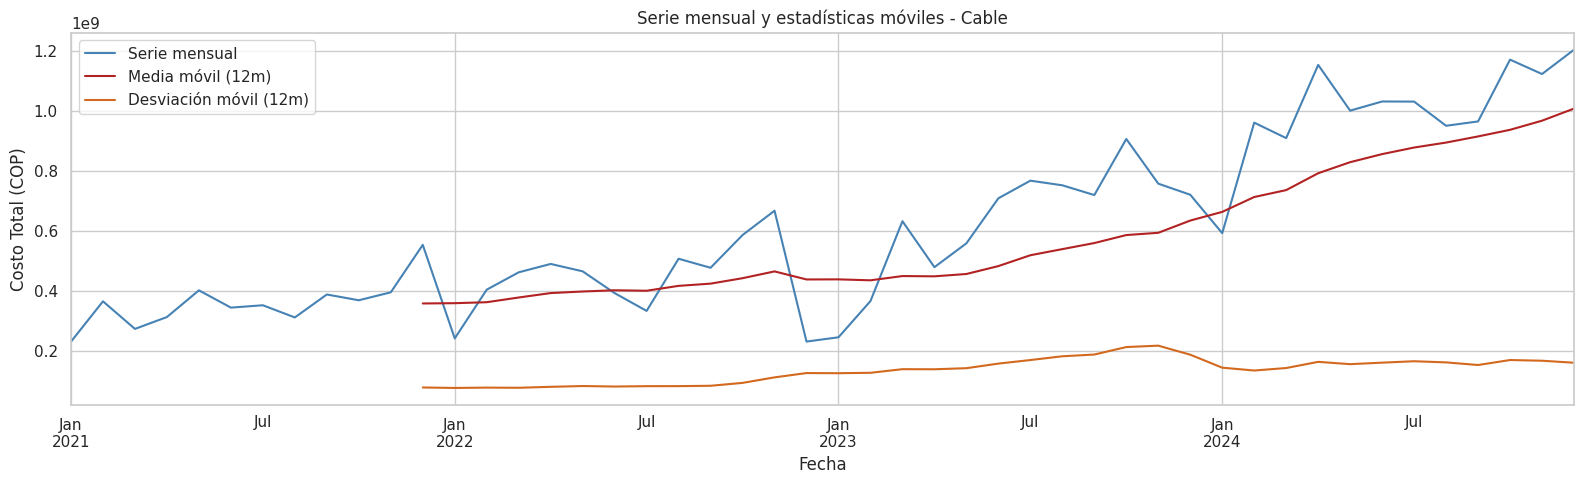

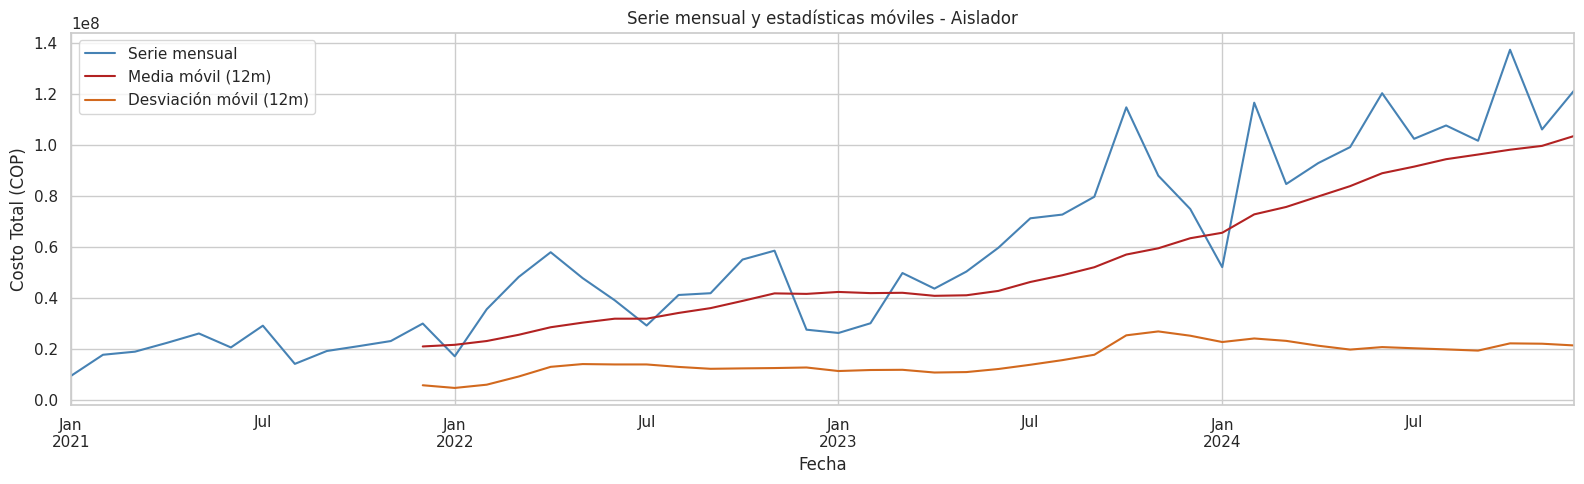

In [ ]:
# Estilo de gráficos
sns.set_style("whitegrid")

# Agrupar por descriptor general y ordenar por costo total
costos_totales = (
    bd_final.groupby('Descriptor general')['Costo Total']
    .sum()
    .sort_values(ascending=False)
)
categorias_ordenadas = costos_totales.index.tolist()

# Iterar sobre cada categoría
for categoria in categorias_ordenadas:
    # Filtrar datos por categoría
    df_categoria = bd_final[bd_final['Descriptor general'] == categoria]

    # Agrupar por mes y sumar costo total mensual
    df_mensual = (
        df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='ME'))['Costo Total']
        .sum()
        .reset_index()
    )

    # Preparar serie de tiempo
    df_mensual = df_mensual.sort_values('Fecha Transacción').set_index('Fecha Transacción')
    serie = df_mensual['Costo Total'].asfreq('ME').fillna(0)

    # Solo graficar si hay suficientes datos
    if len(serie) >= 12:
        # Media móvil y desviación estándar móvil (anual)
        media_movil = serie.rolling(window=12, center=False).mean()
        desviacion_movil = serie.rolling(window=12).std()

        # Graficar serie, media móvil y desviación
        plt.figure(figsize=(16, 5))
        serie.plot(label='Serie mensual', color='steelblue')
        media_movil.plot(label='Media móvil (12m)', color='firebrick')
        desviacion_movil.plot(label='Desviación móvil (12m)', color='chocolate')

        plt.ylabel('Costo Total (COP)')
        plt.xlabel('Fecha')
        plt.title(f'Serie mensual y estadísticas móviles - {categoria}')
        plt.legend()
        plt.tight_layout()
        plt.show()

    else:
        print(f"⏭️ Categoría '{categoria}' omitida: solo {len(serie)} meses disponibles.")


Se puede analizar con estas gráficas:

1. Tendencia general del consumo o costo:

* La serie mensual (línea azul) muestra el comportamiento real mes a mes.

* La media móvil anual (línea roja) suaviza las fluctuaciones mensuales y revela si el consumo o costo está aumentando, disminuyendo o estable a lo largo del tiempo.

2. Variabilidad o volatilidad del consumo:

* La desviación estándar móvil (línea marrón) indica qué tan variable es el consumo o costo en ventanas de 12 meses.

* Altos picos en esta línea pueden sugerir períodos con cambios bruscos o inestabilidad en el consumo (picos o caídas importantes).

* Periodos con desviación baja indican estabilidad.

3. Estacionalidad o patrones cíclicos:

* Si observas la serie mensual y la media móvil, puedes detectar si hay patrones que se repiten cada año, por ejemplo, meses con consumo más alto o bajo.

* Esto ayuda a planificar y prever demanda o presupuesto.

4. Identificación de anomalías o eventos puntuales:

* Meses con valores muy alejados de la media móvil y con picos altos en la desviación estándar pueden indicar eventos especiales (picos de consumo por mantenimientos, reparaciones, compras extraordinarias, etc.)

5. Comparación entre categorías:

* Al analizar todas las categorías, puedes ver cuáles tienen más volatilidad, cuáles crecen, cuáles decrecen, y ajustar inventarios o presupuestos según ese comportamiento.

## Autocorrelacion

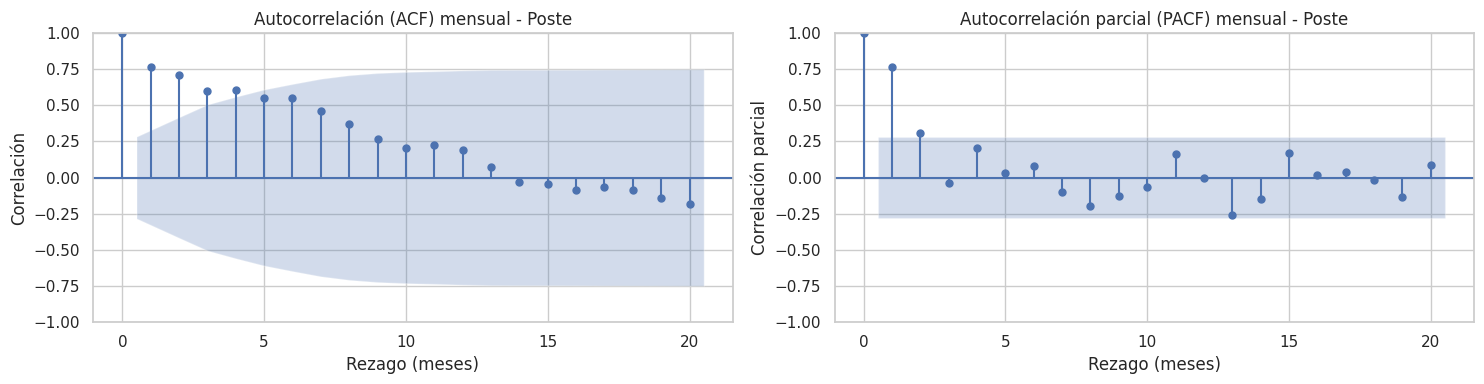

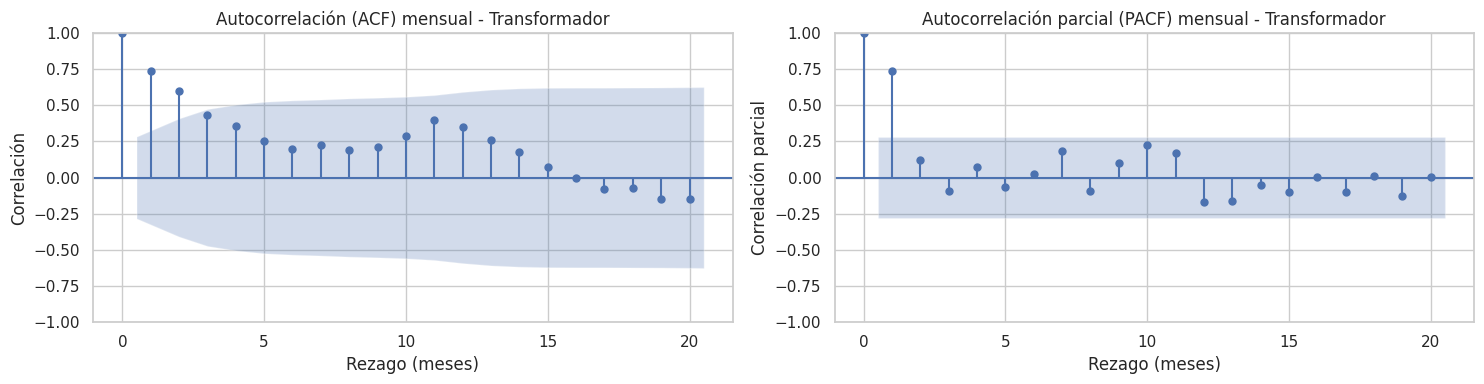

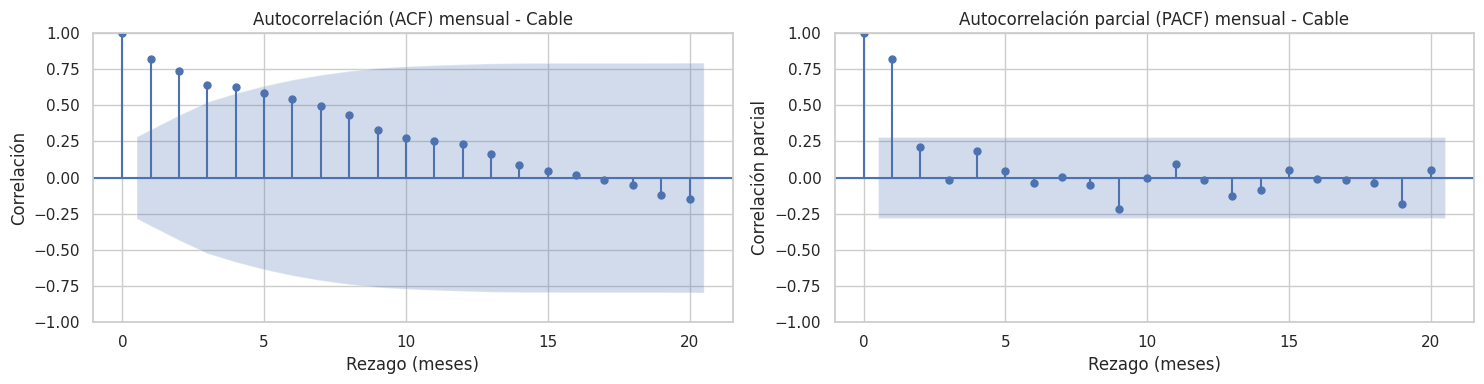

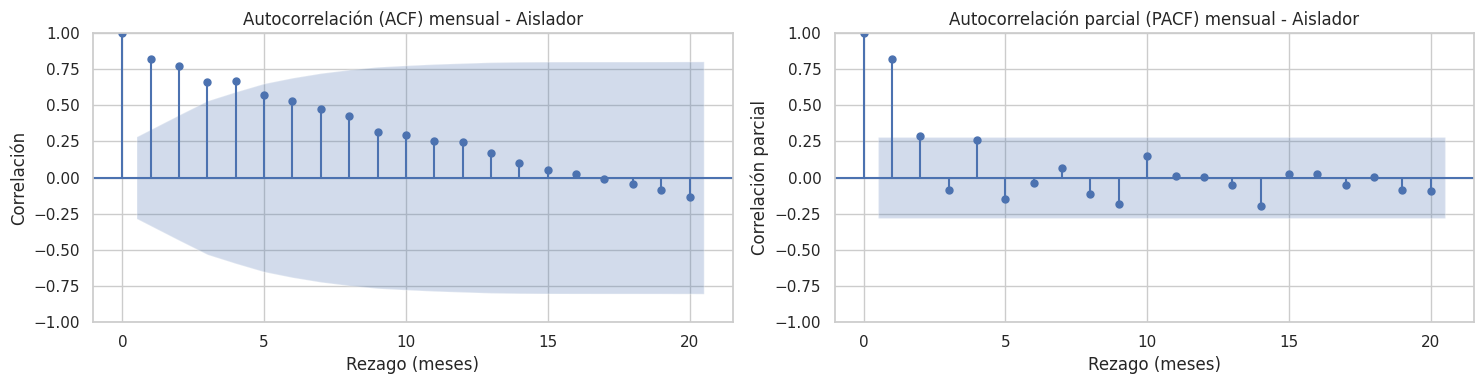

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Obtener las categorías únicas ordenadas por costo total acumulado
costos_totales = (
    bd_final.groupby('Descriptor general')['Costo Total']
    .sum()
    .sort_values(ascending=False)
)
categorias_ordenadas = costos_totales.index.tolist()

# Graficar ACF y PACF por categoría
for categoria in categorias_ordenadas:
    # Filtrar datos de la categoría
    df_categoria = bd_final[bd_final['Descriptor general'] == categoria]

    # Agrupar por mes y sumar costo total mensual
    df_mensual = (
        df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='ME'))['Costo Total']
        .sum()
        .asfreq('ME')
        .fillna(0)
    )

    # Crear figura con 2 subplots (ACF y PACF)
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    # Graficar ACF
    plot_acf(df_mensual, lags=20, ax=axes[0])
    axes[0].set_title(f'Autocorrelación (ACF) mensual - {categoria}')
    axes[0].set_xlabel('Rezago (meses)')
    axes[0].set_ylabel('Correlación')

    # Graficar PACF
    plot_pacf(df_mensual, lags=20, ax=axes[1])
    axes[1].set_title(f'Autocorrelación parcial (PACF) mensual - {categoria}')
    axes[1].set_xlabel('Rezago (meses)')
    axes[1].set_ylabel('Correlación parcial')

    plt.tight_layout()
    plt.show()


Realizo la prueba de **Dickey-Fuller** aumentada total (ADF) a la serie de Costo Total mensual de cada categoría (Descriptor general)

In [ ]:
import statsmodels.tsa.stattools as tsa

# Obtener las categorías únicas ordenadas por costo total acumulado
costos_totales = (
    bd_final.groupby('Descriptor general')['Costo Total']
    .sum()
    .sort_values(ascending=False)
)
categorias_ordenadas = costos_totales.index.tolist()

# Hacer la prueba ADF para cada categoría en su serie mensual
for categoria in categorias_ordenadas:
    # Filtrar datos de la categoría
    df_categoria = bd_final[bd_final['Descriptor general'] == categoria]

    # Agrupar por mes y sumar costo total mensual
    df_mensual = (
        df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='ME'))['Costo Total']
        .sum()
        .asfreq('ME')
        .fillna(0)
    )

    # Prueba ADF
    resultado = tsa.adfuller(df_mensual)
    adf_stat, p_value, lags, obs, crit_values, icbest = resultado

    print(f'Categoría: {categoria}')
    print(f'ADF Statistic: {adf_stat}')
    print(f'p-valor: {p_value}')
    print('---')


Categoría: Poste
ADF Statistic: -1.730309877155288
p-valor: 0.4155674399071715
---
Categoría: Transformador
ADF Statistic: -2.723956871839586
p-valor: 0.06998363530479716
---
Categoría: Cable
ADF Statistic: 0.1284773873919617
p-valor: 0.9679524490382005
---
Categoría: Aislador
ADF Statistic: 0.142451520884854
p-valor: 0.9688427584817593
---


| Categoría     | ADF Statistic | p-valor | Interpretación                                                                            |
| ------------- | ------------- | ------- | ----------------------------------------------------------------------------------------- |
| Poste         | -1.7303       | 0.4156  | No se rechaza la hipótesis nula (serie **no estacionaria**). p-valor > 0.05.              |
| Transformador | -2.7240       | 0.0700  | Poca evidencia para rechazar la hipótesis nula (serie **probablemente no estacionaria**). |
| Cable         | 0.1285        | 0.9680  | No se rechaza la hipótesis nula (serie **no estacionaria**). p-valor alto.                |
| Aislador      | 0.1425        | 0.9688  | No se rechaza la hipótesis nula (serie **no estacionaria**). p-valor alto.                |


La prueba ADF tiene como hipótesis:

* Hipótesis nula (H₀): la serie NO es estacionaria (tiene raíz unitaria).



Criterio de decisión:

* Si el p-valor < 0.05, se rechaza H₀ → la serie es estacionaria.

* Si el p-valor > 0.05, no se rechaza H₀ → la serie NO es estacionaria.

**Conclusión:**
Ninguna de las series evaluadas es estacionaria.
Esto significa que no puedo aplicar directamente modelos como ARIMA o SARIMA sin transformar previamente las series.

A continucion realizo la primera diferenciacion de cada serie para identificar si puedo usar metodo ARIMA. ademas grafico el resultado comparando el comportamiento oroginal.

Categoría: Poste
p-valor de la prueba ADF sobre la serie diferenciada: 9.18268914543978e-07
---


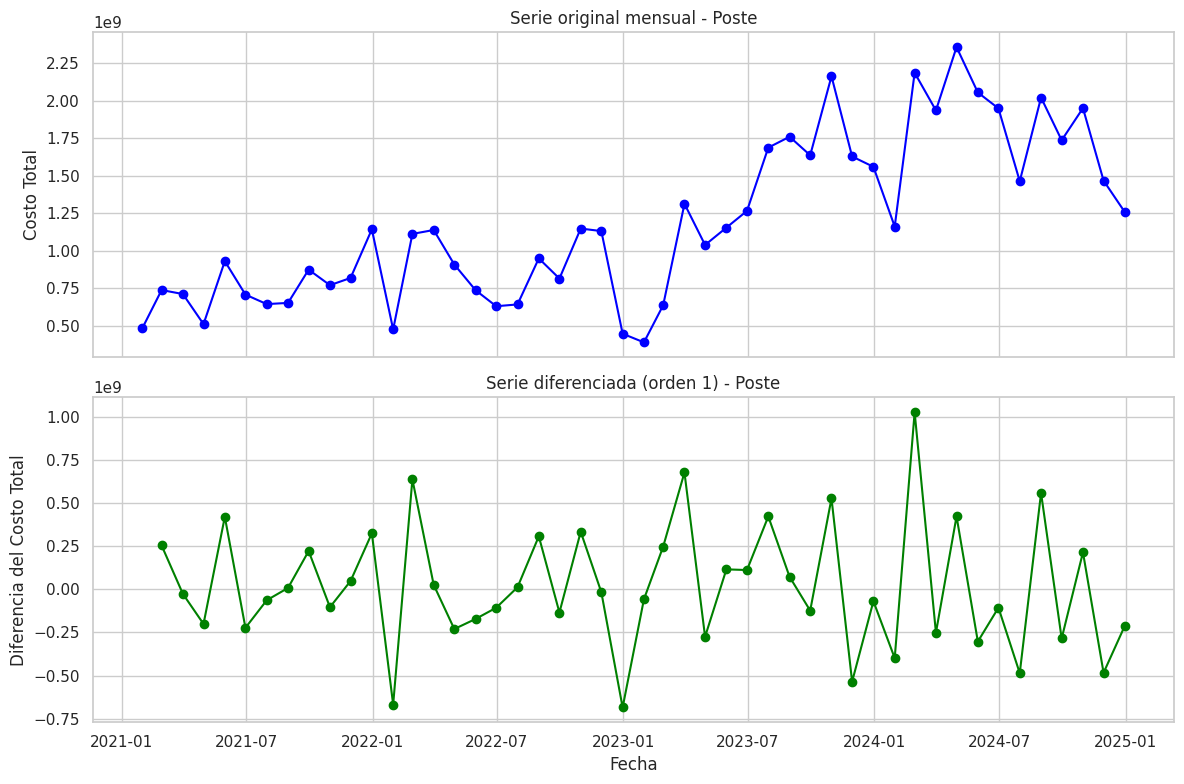

Categoría: Transformador
p-valor de la prueba ADF sobre la serie diferenciada: 5.769274759938919e-05
---


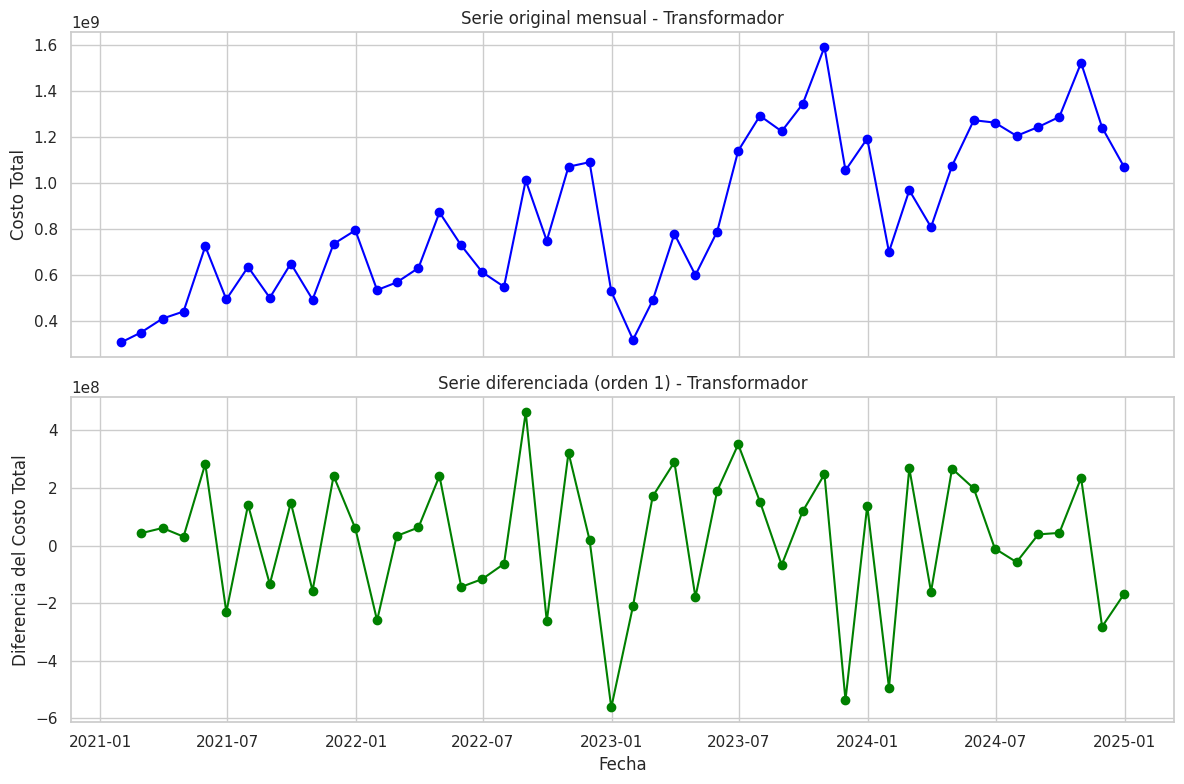

Categoría: Cable
p-valor de la prueba ADF sobre la serie diferenciada: 1.0678043925960632e-07
---


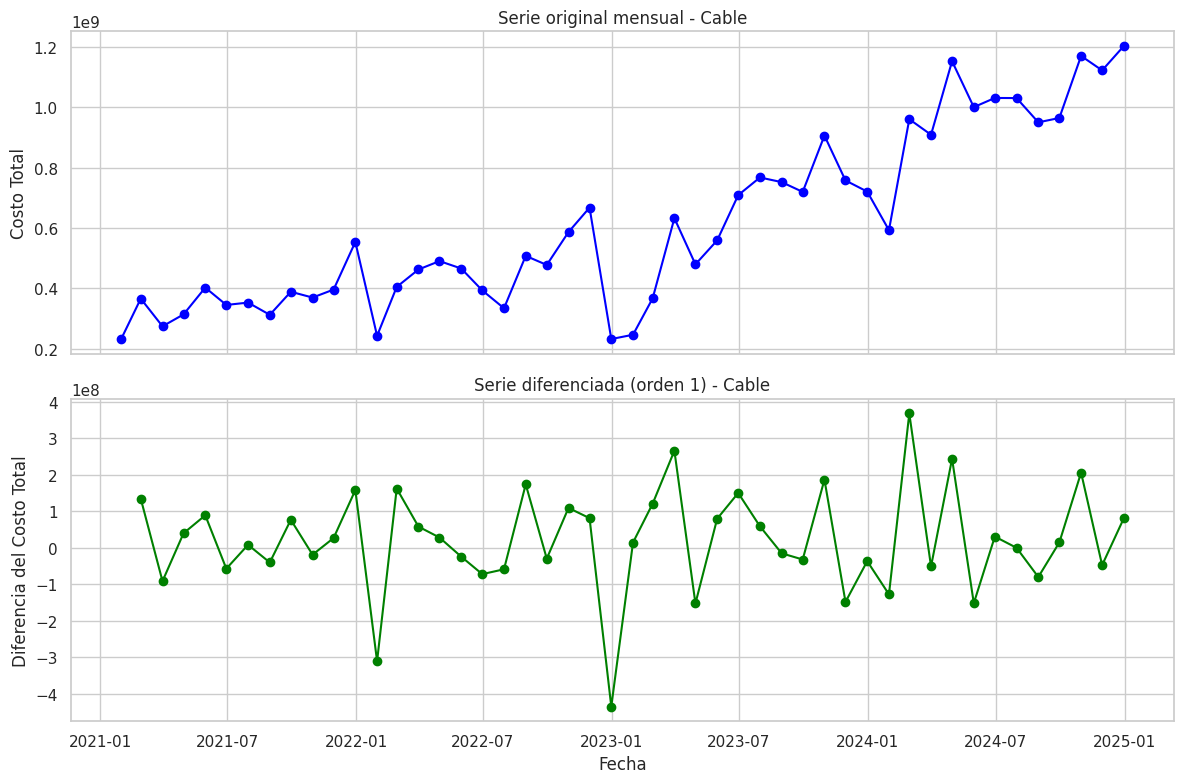

Categoría: Aislador
p-valor de la prueba ADF sobre la serie diferenciada: 1.5416661299981466e-10
---


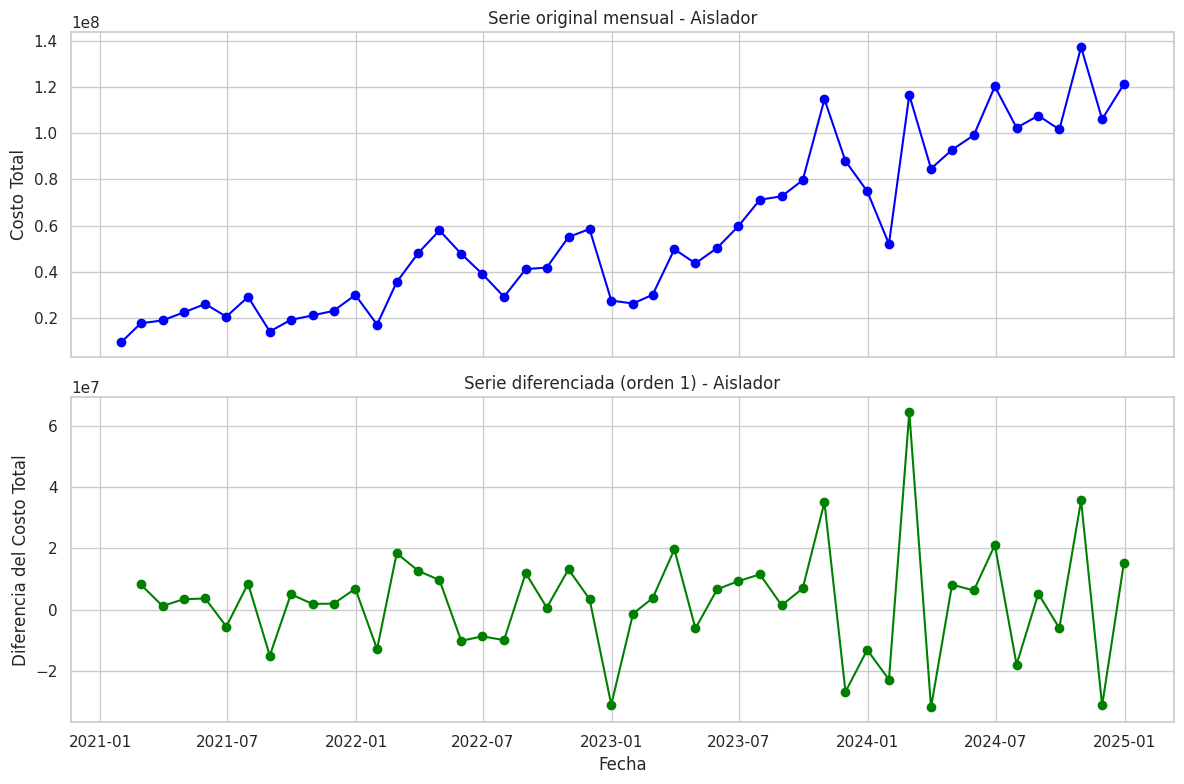

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as tsa

# Obtener las categorías únicas ordenadas por costo total acumulado
costos_totales = (
    bd_final.groupby('Descriptor general')['Costo Total']
    .sum()
    .sort_values(ascending=False)
)
categorias_ordenadas = costos_totales.index.tolist()

for categoria in categorias_ordenadas:
    # Filtrar datos de la categoría
    df_categoria = bd_final[bd_final['Descriptor general'] == categoria]

    # Agrupar por mes y sumar costo total mensual
    df_mensual = (
        df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='ME'))['Costo Total']
        .sum()
        .asfreq('ME')
        .fillna(0)
    )

    # Diferenciar la serie para hacerla estacionaria (diferencia de orden 1)
    df_mensual_diff = df_mensual.diff(1).dropna()

    # Prueba ADF sobre la serie diferenciada
    adf_stat, p_value, lags, obs, crit_values, icbest = tsa.adfuller(df_mensual_diff) #Realizo la prueba de Dickey-Fuller para la rpimera diferencacion

    # Imprimir resultados
    print(f'Categoría: {categoria}')
    print(f'p-valor de la prueba ADF sobre la serie diferenciada: {p_value}')
    print('---')

    # Crear figura con dos subplots: original y diferenciada
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Serie original
    axs[0].plot(df_mensual, marker='o', linestyle='-', color='blue')
    axs[0].set_title(f'Serie original mensual - {categoria}')
    axs[0].set_ylabel('Costo Total')
    axs[0].grid(True)

    # Serie diferenciada
    axs[1].plot(df_mensual_diff, marker='o', linestyle='-', color='green')
    axs[1].set_title(f'Serie diferenciada (orden 1) - {categoria}')
    axs[1].set_xlabel('Fecha')
    axs[1].set_ylabel('Diferencia del Costo Total')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


| Categoría     | p-valor (serie diferenciada) | Interpretación                                                        |
| ------------- | ---------------------------- | --------------------------------------------------------------------- |
| Poste         | 9.18e-07                     | p-valor < 0.05  Rechazo H0 - Serie diferenciada **es estacionaria** |
| Transformador | 5.77e-05                     | p-valor < 0.05  Rechazo H0 - Serie diferenciada **es estacionaria** |
| Cable         | 1.07e-07                     | p-valor < 0.05  Rechazo H0 - Serie diferenciada **es estacionaria** |
| Aislador      | 1.54e-10                     | p-valor < 0.05  Rechazo H0 - Serie diferenciada **es estacionaria** |


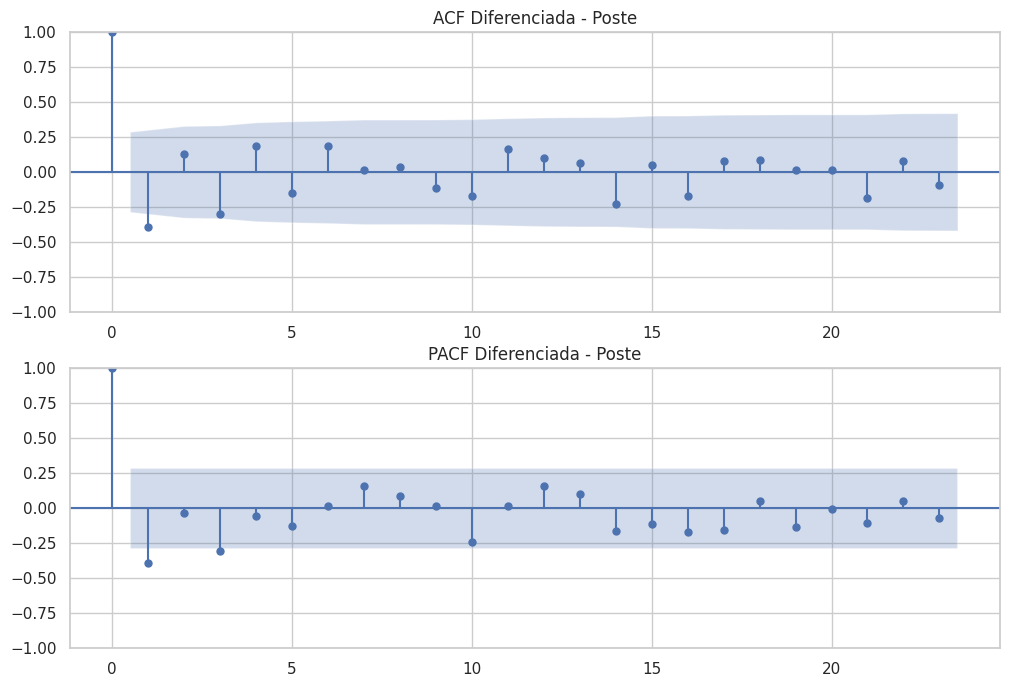

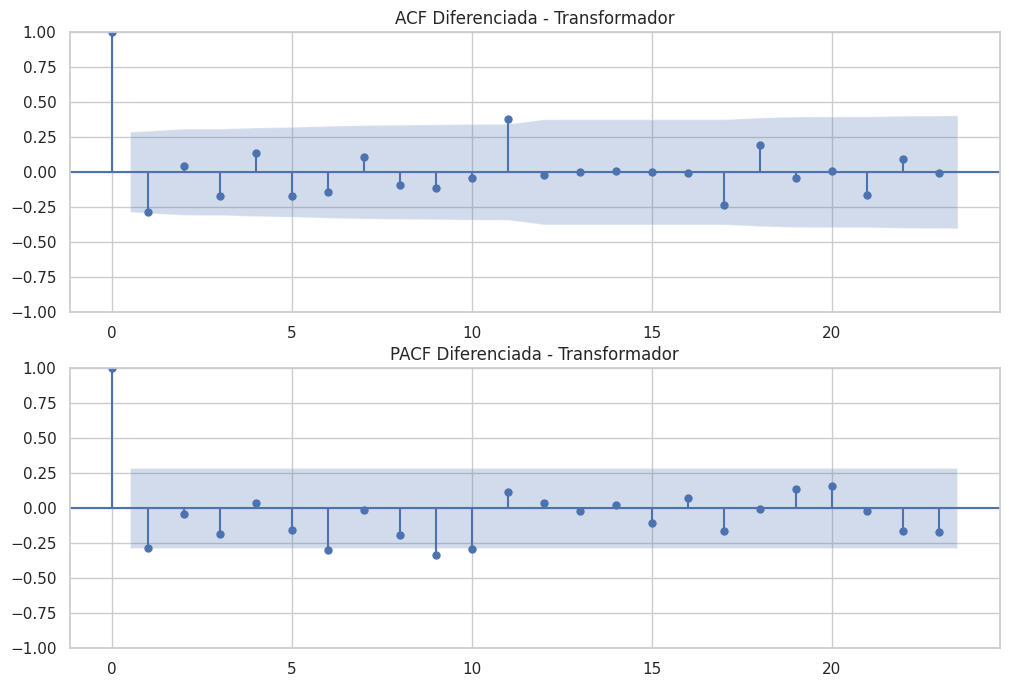

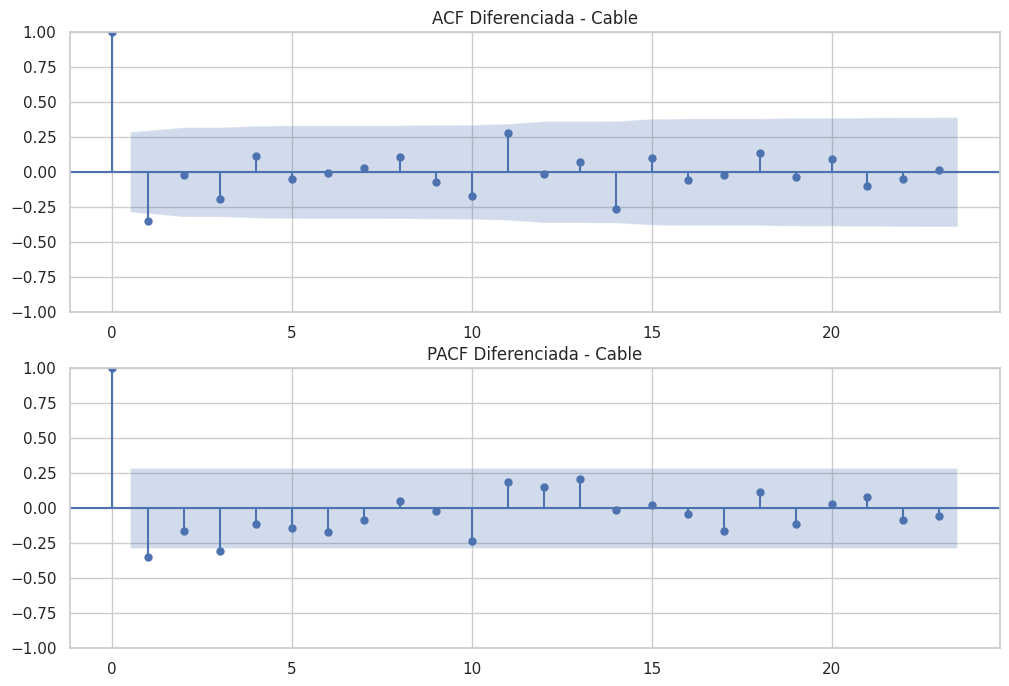

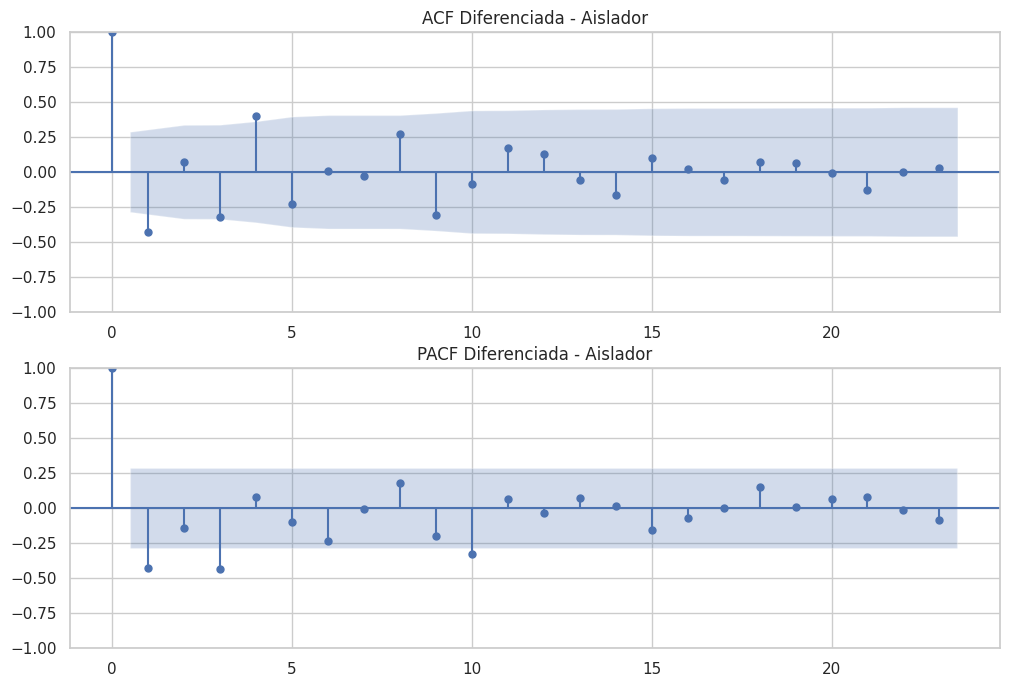

In [ ]:
for categoria in categorias_ordenadas:
    df_categoria = bd_final[bd_final['Descriptor general'] == categoria]
    df_mensual = (
        df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='ME'))['Costo Total']
        .sum()
        .asfreq('ME')
        .fillna(0)
    )
    df_mensual_diff = df_mensual.diff(1).dropna()

    max_lags = min(24, len(df_mensual_diff)//2)  # máximo lags permitido
    fig, ax = plt.subplots(2, 1, figsize=(12,8))
    plot_acf(df_mensual_diff, ax=ax[0], lags=max_lags, title=f'ACF Diferenciada - {categoria}')
    plot_pacf(df_mensual_diff, ax=ax[1], lags=max_lags, title=f'PACF Diferenciada - {categoria}')
    plt.show()


El flujo correcto es:
1. ACF y PACF originales → Por la diferenciacion. ✅

2. Dickey-Fuller en la serie diferenciada → Se ahora es estacionaria.✅

3. Vuelvo a graficar ACF y PACF sobre la serie diferenciada → para elegir p y q.



# **ARIMA**

**ARIMA = AutoRegressive Integrated Moving Average**

¿Por qué usar ARIMA para predicción?

ARIMA es uno de los modelos más utilizados para hacer predicciones de series temporales, especialmente cuando trabajamos con datos históricos mensuales, como en tu caso con el "Costo Total" por categoría.

Se usa porque:

✅ Tiene en cuenta la tendencia: Si los costos han venido aumentando o disminuyendo, ARIMA lo capta.

✅ Puede trabajar con datos no estacionarios: Es decir, si la media o la varianza cambian con el tiempo.

✅ Modela relaciones internas: Usa los propios valores pasados y sus errores para proyectar el futuro.

✅ Funciona bien sin variables externas: No necesitas más información que la serie histórica.

Ejemplo: ARIMA(1,1,1)
p = 1: Usa 1 valor anterior (mes pasado).

d = 1: Aplica una diferencia para eliminar tendencia.

q = 1: Usa 1 error anterior para mejorar la predicción.


La aplicacion del modelo arima es util para mis datos ya que:

1. Estoy trabajando con costos mensuales históricos, agrupados por categoría de materiales usados en redes eléctricas. Estas series tienen:

* Tendencias (por mantenimiento, inflación, cambios operativos).

* Variabilidad mensual (por planes o emergencias).

* Poca estacionalidad clara.

ARIMA es perfecto en este contexto porque te permite predecir valores futuros solo con la serie histórica, sin necesidad de más variables.


🔍 Procesando descriptor: Aislador
✅ Entrenamiento: 2021-01 a 2022-12
📊 Prueba: 2023-01 a 2024-12
📈 Modelo ARIMA usado: (1, 1, 1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


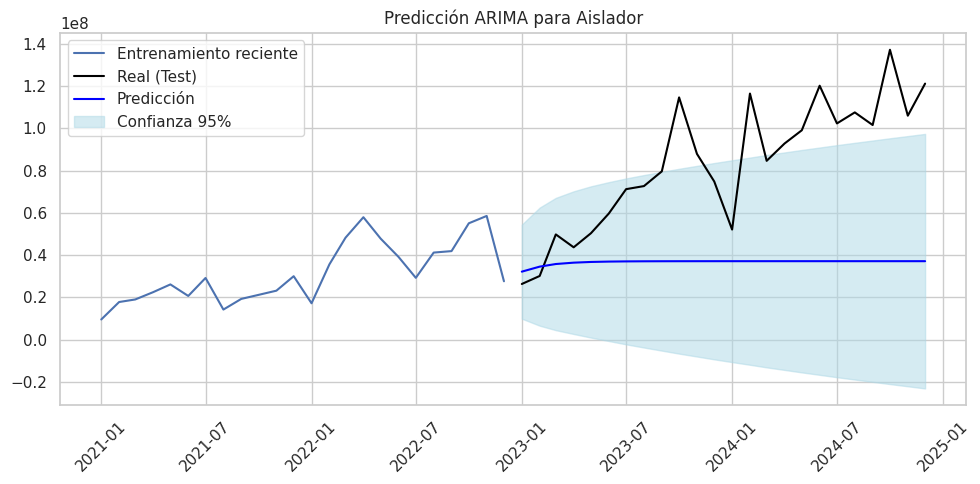


🔍 Procesando descriptor: Cable
✅ Entrenamiento: 2021-01 a 2022-12
📊 Prueba: 2023-01 a 2024-12
📈 Modelo ARIMA usado: (1, 1, 1)


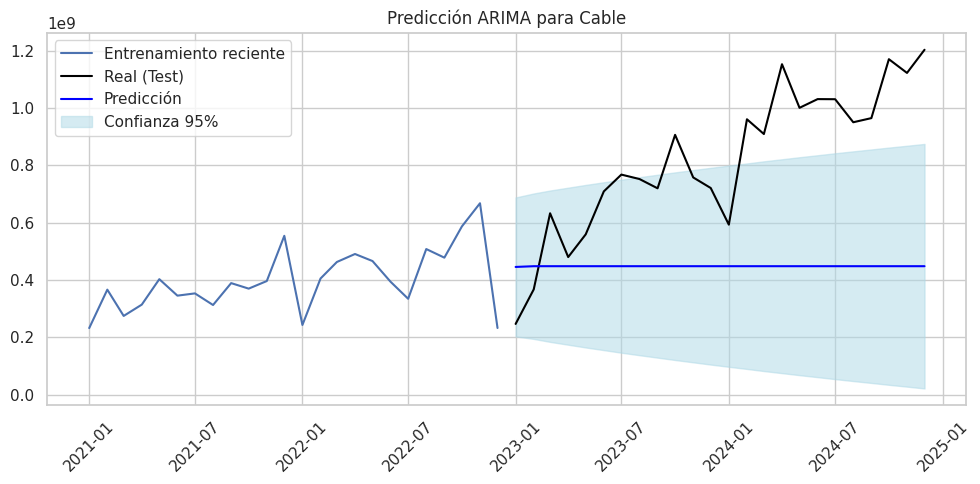


🔍 Procesando descriptor: Poste
✅ Entrenamiento: 2021-01 a 2022-12
📊 Prueba: 2023-01 a 2024-12
📈 Modelo ARIMA usado: (1, 1, 1)


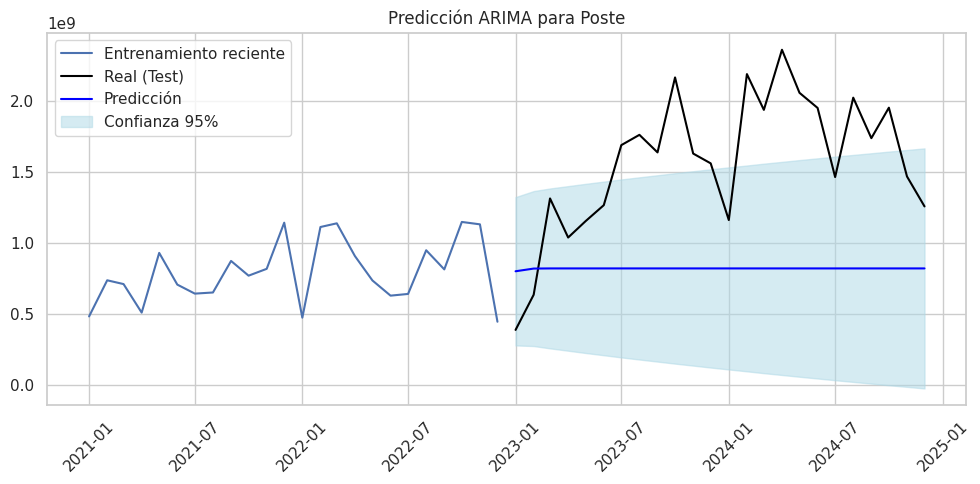


🔍 Procesando descriptor: Transformador
✅ Entrenamiento: 2021-01 a 2022-12
📊 Prueba: 2023-01 a 2024-12
📈 Modelo ARIMA usado: (1, 1, 1)


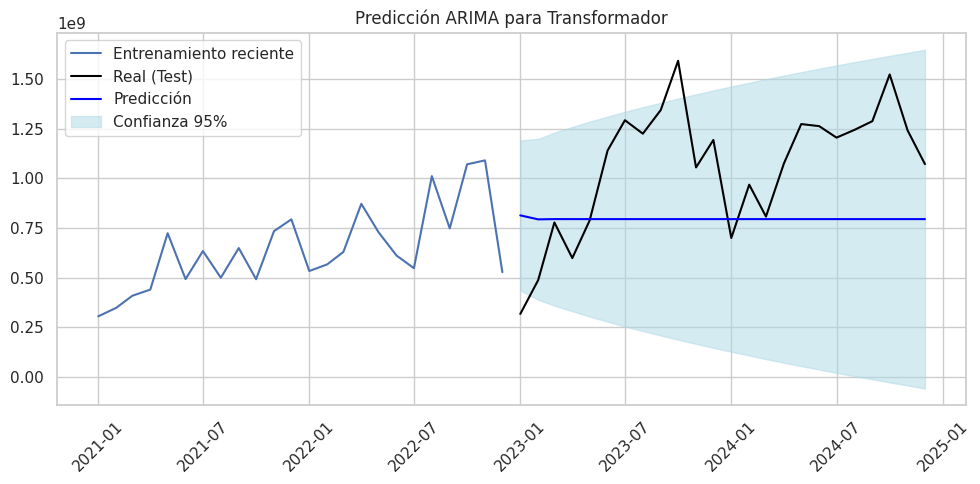


📋 Resumen de métricas (MAE, RMSE y MAPE):
                         MAE           RMSE  MAPE
Aislador       47,588,622.56  55,189,234.23 50.74
Transformador 358,473,880.45 411,878,645.85 35.79
Cable         396,273,032.86 449,424,364.91 45.54
Poste         803,418,728.84 891,068,329.71 49.80


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Preparar datos mensuales por descriptor
bd_final['Fecha Transacción'] = pd.to_datetime(bd_final['Fecha Transacción'])
bd_final['AñoMes'] = bd_final['Fecha Transacción'].dt.to_period('M')
serie_mensual = (
    bd_final.groupby(['AñoMes', 'Descriptor general'])['Costo Total']
    .sum()
    .unstack()
)
serie_mensual.index = serie_mensual.index.to_timestamp()

# Definir modelos ARIMA(p,1,q) basados en tu análisis ACF/PACF
modelos_arima = {
    'Cable': (1,1,1),
    'Aislador': (1,1,1),
    'Poste': (1,1,1),
    'Transformador': (1,1,1),
    # Ajusta estos valores (p,1,q) según tus ACF/PACF
}

horizonte = 24  # meses a predecir
resultados = {}
metricas = {}

# ## Ajustar modelos y predecir
for descriptor in serie_mensual.columns:
    print(f"\n🔍 Procesando descriptor: {descriptor}")

    if descriptor not in modelos_arima:
        print(f"❌ No se definió modelo ARIMA para: {descriptor}")
        continue

    orden = modelos_arima[descriptor]
    serie = serie_mensual[descriptor].dropna()

    if len(serie) <= horizonte:
        print("⚠️ No hay suficientes datos para separar entrenamiento y prueba.")
        continue

    # Separar entrenamiento y prueba
    train = serie[:-horizonte]
    test = serie[-horizonte:]

    print(f"✅ Entrenamiento: {train.index[0].strftime('%Y-%m')} a {train.index[-1].strftime('%Y-%m')}")
    print(f"📊 Prueba: {test.index[0].strftime('%Y-%m')} a {test.index[-1].strftime('%Y-%m')}")
    print(f"📈 Modelo ARIMA usado: {orden}")

    try:
        modelo = ARIMA(train, order=orden)
        modelo_fit = modelo.fit()

        # Predecir
        pred = modelo_fit.get_forecast(steps=horizonte)
        pred_mean = pred.predicted_mean
        conf_int = pred.conf_int()

        # Guardar resultados
        resultados[descriptor] = pd.DataFrame({
            'Predicción': pred_mean,
            'Límite inferior': conf_int.iloc[:, 0],
            'Límite superior': conf_int.iloc[:, 1],
        }, index=pred_mean.index)

        # Calcular métricas si hay datos reales
        if len(test) == horizonte:
            mae = mean_absolute_error(test, pred_mean)
            rmse = np.sqrt(mean_squared_error(test, pred_mean))
            # Evitar división por cero en MAPE
            mape = np.mean(np.abs((test - pred_mean) / test.replace(0, np.nan))) * 100
            metricas[descriptor] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

        # Graficar resultados
        plt.figure(figsize=(10, 5))
        plt.plot(train[-24:], label='Entrenamiento reciente')
        plt.plot(test, label='Real (Test)', color='black')
        plt.plot(pred_mean, label='Predicción', color='blue')
        plt.fill_between(pred_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                         color='lightblue', alpha=0.5, label='Confianza 95%')
        plt.title(f'Predicción ARIMA para {descriptor}')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error al procesar {descriptor}: {e}")
        continue

# Mostrar métricas
df_metricas = pd.DataFrame(metricas).T
print("\n📋 Resumen de métricas (MAE, RMSE y MAPE):")
print(df_metricas.sort_values('RMSE'))


| Descriptor        | MAE            | RMSE           | MAPE (%) |
| ----------------- | -------------- | -------------- | -------- |
| **Aislador**      | 47,588,622.56  | 55,189,234.23  | 50.74    |
| **Transformador** | 358,473,880.45 | 411,878,645.85 | 35.79    |
| **Cable**         | 396,273,032.86 | 449,424,364.91 | 45.54    |
| **Poste**         | 803,418,728.84 | 891,068,329.71 | 49.80    |

MAE (Error Absoluto Medio): Promedio de cuánto se equivocó el modelo en unidades monetarias (COP).

RMSE (Raíz del Error Cuadrático Medio): Da más peso a errores grandes, mide la desviación típica del error.

MAPE (Error Porcentual Absoluto Medio): Porcentaje promedio de error relativo a los valores reales (más intuitivo para entender la precisión).

Interpretación por descriptor
1. Aislador
MAE y RMSE bajos comparados con otros descriptores, indica que el modelo ajustó relativamente bien las cantidades de consumo de aisladores.

MAPE ~50.74% es alto, lo que indica que, proporcionalmente, el error es bastante grande. Esto puede suceder si hay valores muy bajos o nulos en la serie (la MAPE puede inflarse cuando valores reales son pequeños).

El modelo tiene mejor desempeño en términos absolutos que en términos porcentuales.

2. Transformador
MAE y RMSE más altos que Aislador, pero menores que Cable y Poste, lo que indica errores absolutos moderados.

MAPE 35.79% es el más bajo entre los cuatro, lo que indica que proporcionalmente el modelo predice mejor esta categoría.

El modelo logra un buen equilibrio entre error absoluto y error porcentual.

3. Cable
MAE y RMSE altos, lo que refleja errores absolutos grandes, probablemente por el volumen o costos mayores en consumo de cables.

MAPE 45.54% indica un error porcentual alto, aunque menor que Aislador y Poste.

El modelo tiene más dificultades en predecir esta categoría en términos absolutos.

4. Poste
Errores MAE y RMSE más altos, casi el doble que Cable, reflejando la mayor dificultad del modelo para predecir este descriptor.

MAPE 49.80% también es alto, similar a Aislador, indicando que el error relativo es grande.

El modelo parece tener un desempeño peor con esta categoría, posiblemente por mayor variabilidad o por datos insuficientes para capturar el patrón.



# **SARIMA**

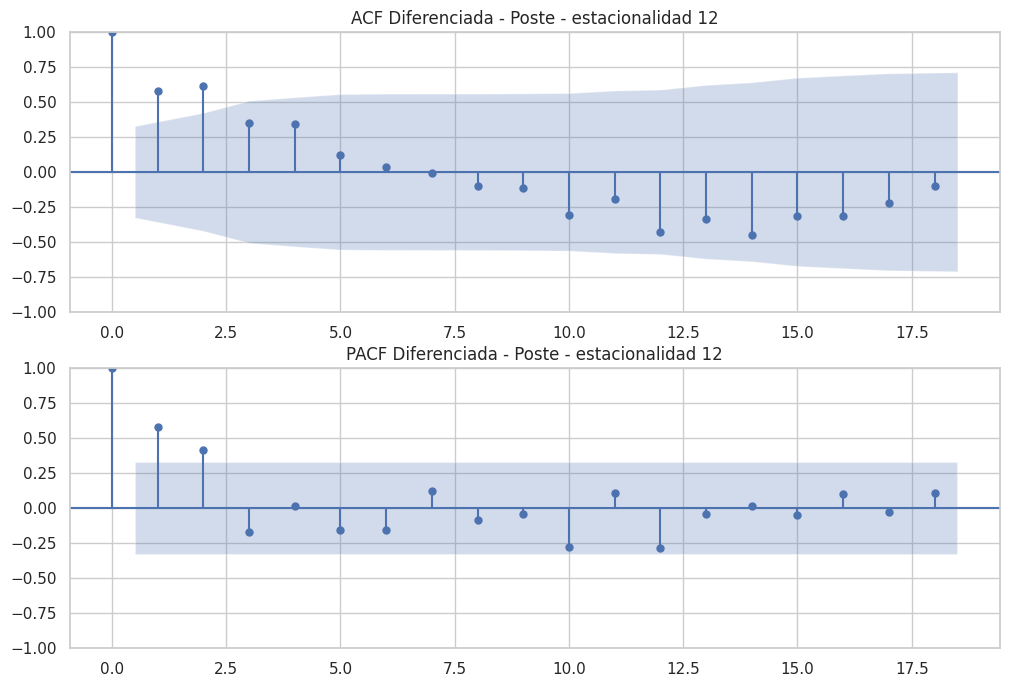

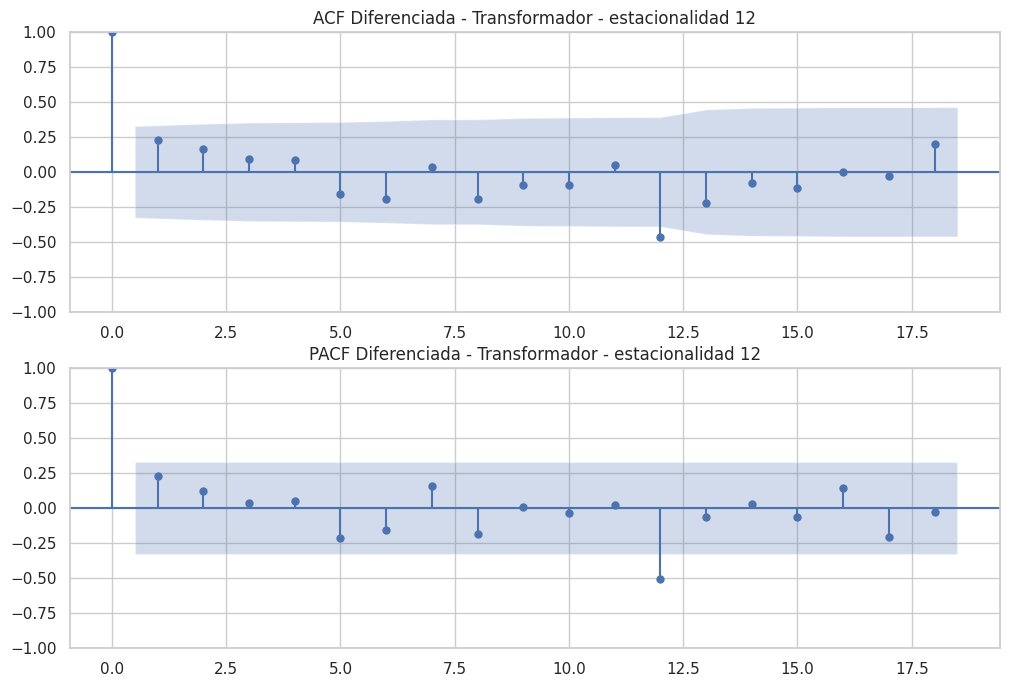

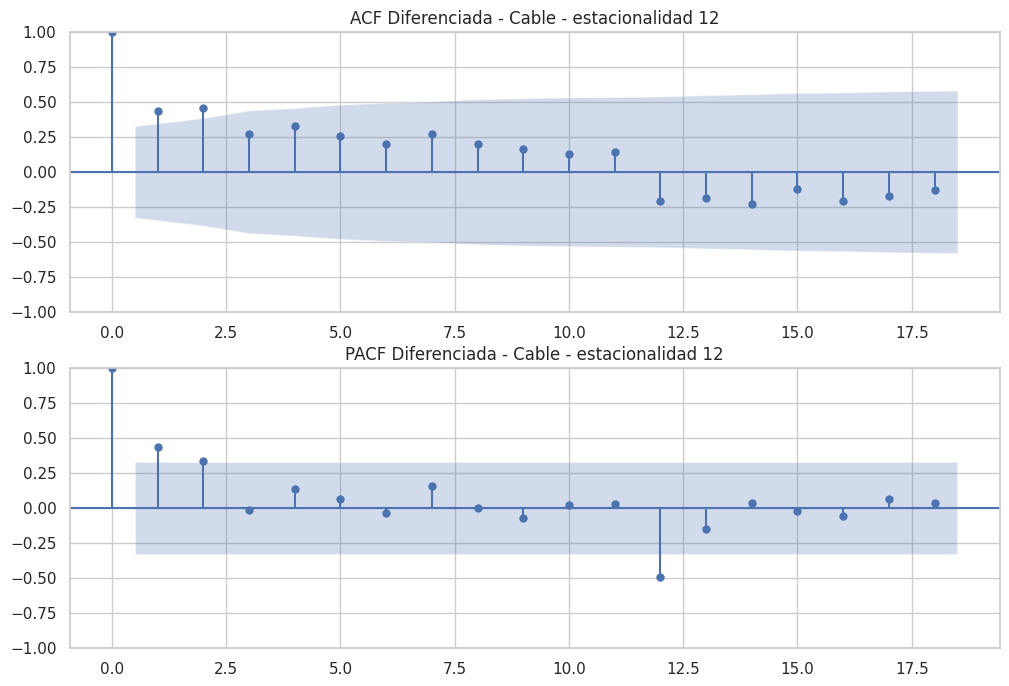

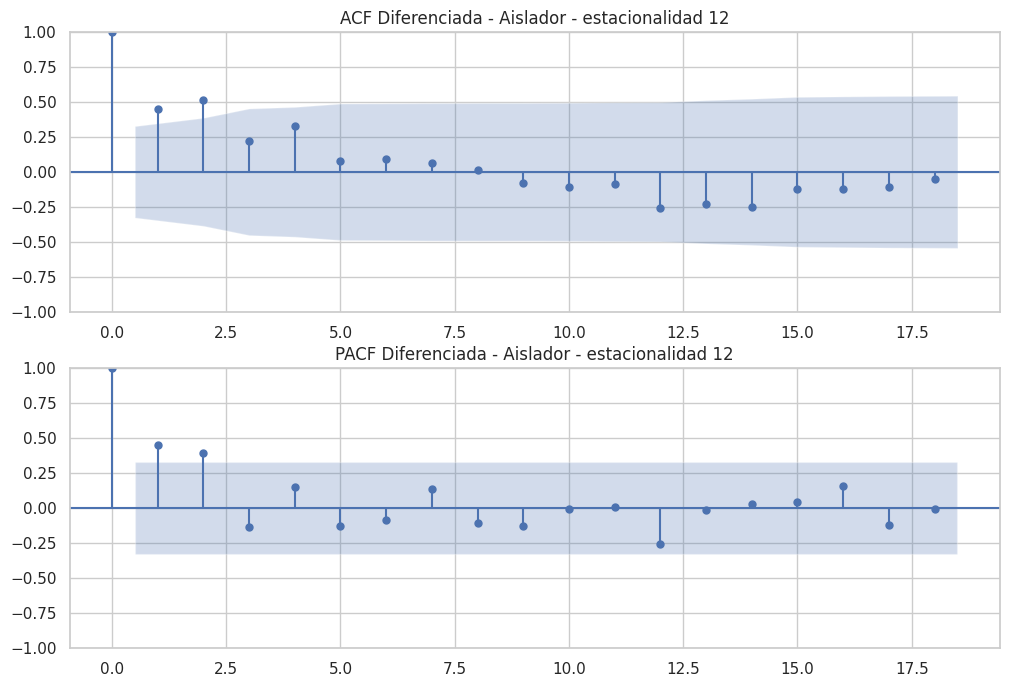

In [ ]:
for categoria in categorias_ordenadas:
    df_categoria = bd_final[bd_final['Descriptor general'] == categoria]
    df_mensual = (
        df_categoria.groupby(pd.Grouper(key='Fecha Transacción', freq='ME'))['Costo Total']
        .sum()
        .asfreq('ME')
        .fillna(0)
    )
    df_mensual_diff = df_mensual.diff(12).dropna()

    max_lags = min(24, len(df_mensual_diff)//2)  # máximo lags permitido
    fig, ax = plt.subplots(2, 1, figsize=(12,8))
    plot_acf(df_mensual_diff, ax=ax[0], lags=max_lags, title=f'ACF Diferenciada - {categoria} - estacionalidad 12')
    plot_pacf(df_mensual_diff, ax=ax[1], lags=max_lags, title=f'PACF Diferenciada - {categoria} - estacionalidad 12')
    plt.show()


🔍 Procesando descriptor: Aislador
✅ Entrenamiento: 2021-01 a 2022-12
📊 Prueba: 2023-01 a 2024-12
📈 Modelo SARIMA usado: orden=(1, 1, 1), estacional=(2, 1, 2, 12)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


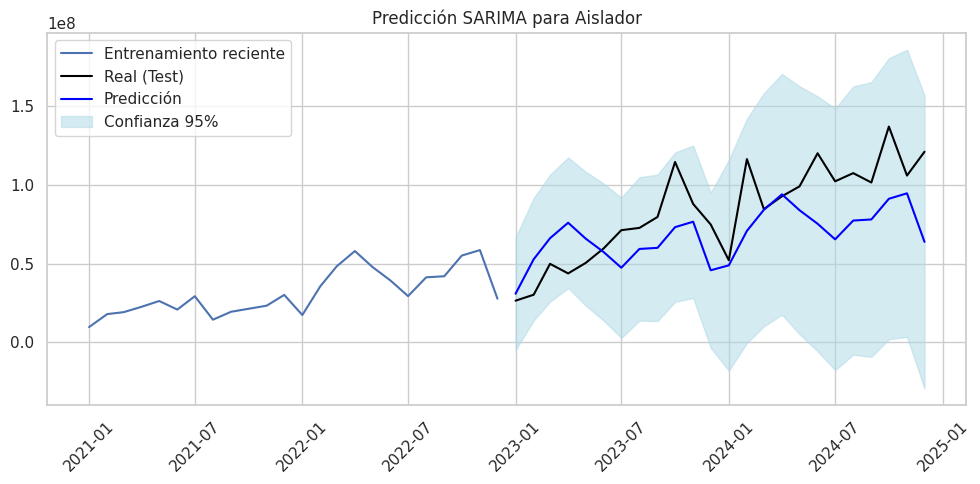


🔍 Procesando descriptor: Cable
✅ Entrenamiento: 2021-01 a 2022-12
📊 Prueba: 2023-01 a 2024-12
📈 Modelo SARIMA usado: orden=(1, 1, 1), estacional=(2, 1, 2, 12)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


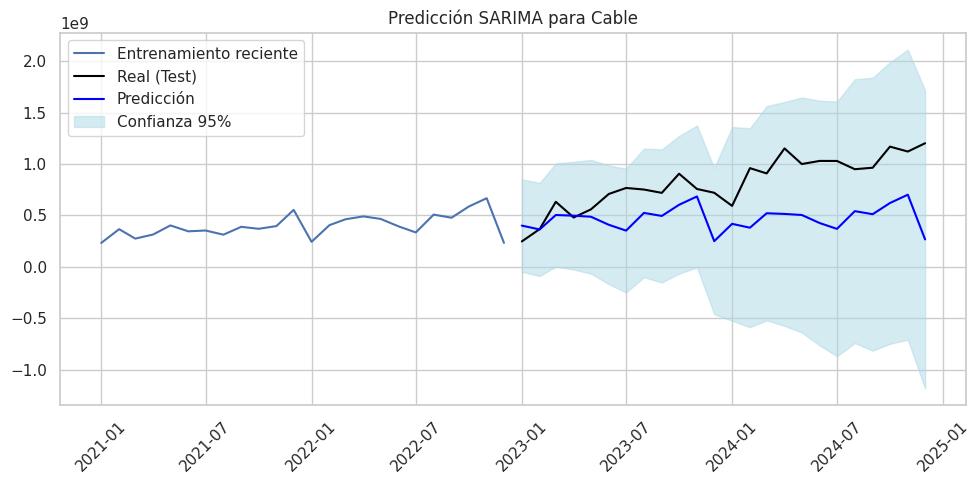


🔍 Procesando descriptor: Poste
✅ Entrenamiento: 2021-01 a 2022-12
📊 Prueba: 2023-01 a 2024-12
📈 Modelo SARIMA usado: orden=(1, 1, 1), estacional=(2, 1, 2, 12)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


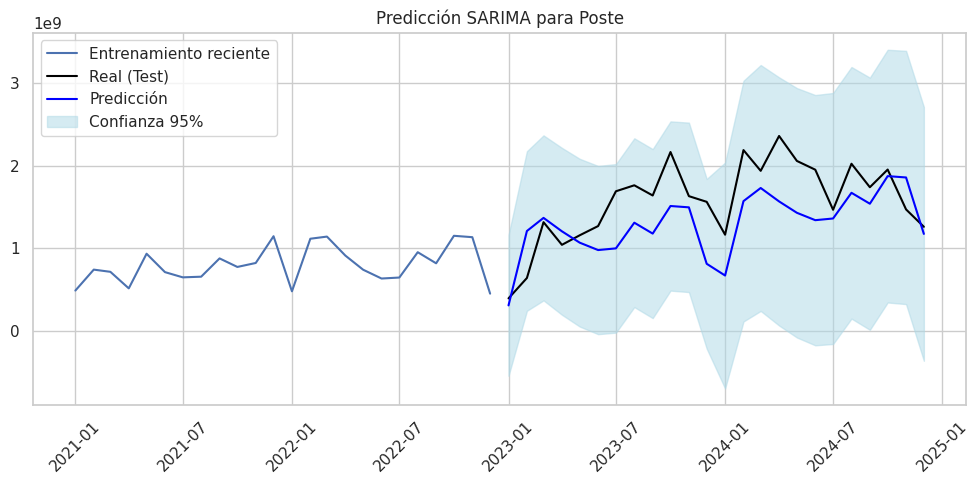


🔍 Procesando descriptor: Transformador
✅ Entrenamiento: 2021-01 a 2022-12
📊 Prueba: 2023-01 a 2024-12
📈 Modelo SARIMA usado: orden=(1, 1, 1), estacional=(0, 1, 0, 12)


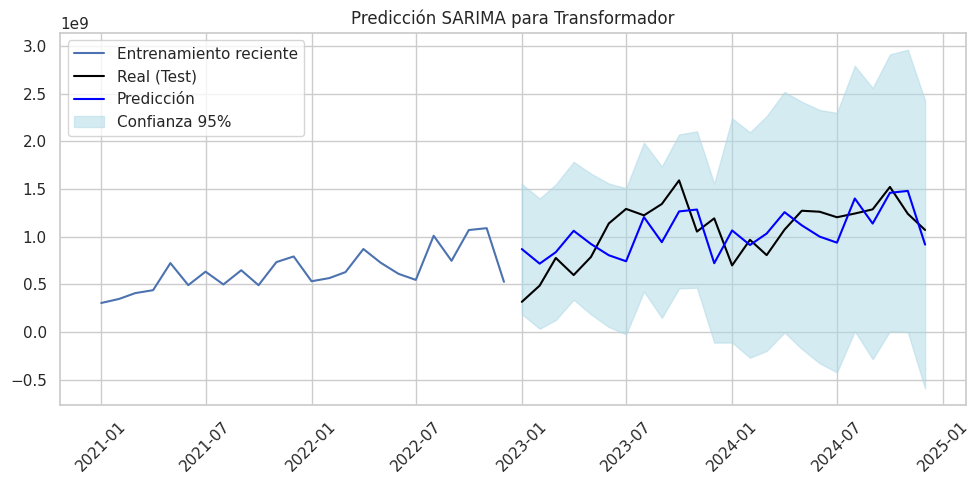


📋 Resumen de métricas (MAE, RMSE y MAPE):
                         MAE           RMSE  MAPE
Aislador       22,859,417.80  27,870,247.05 28.21
Transformador 251,808,178.52 293,402,779.29 30.36
Cable         362,385,873.95 429,489,863.55 40.80
Poste         373,674,873.60 445,997,475.82 24.76


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Preparar datos mensuales por descriptor
bd_final['Fecha Transacción'] = pd.to_datetime(bd_final['Fecha Transacción'])
bd_final['AñoMes'] = bd_final['Fecha Transacción'].dt.to_period('M')
serie_mensual = (
    bd_final.groupby(['AñoMes', 'Descriptor general'])['Costo Total']
    .sum()
    .unstack()
)
serie_mensual.index = serie_mensual.index.to_timestamp()

# Definir modelos SARIMA (p,d,q)(P,D,Q,s)
modelos_sarima = {
    'Cable': ((1, 1, 1), (2, 1, 2, 12)),
    'Aislador': ((1, 1, 1), (2, 1, 2, 12)),
    'Poste': ((1, 1, 1), (2, 1, 2, 12)),
    'Transformador': ((1, 1, 1), (0, 1, 0, 12)),
    # Puedes ajustar los parámetros aquí por descriptor
}

horizonte = 24  # meses a predecir
resultados = {}
metricas = {}

# Ajustar modelos y predecir
for descriptor in serie_mensual.columns:
    print(f"\n🔍 Procesando descriptor: {descriptor}")

    if descriptor not in modelos_sarima:
        print(f"❌ No se definió modelo SARIMA para: {descriptor}")
        continue

    orden, orden_estacional = modelos_sarima[descriptor]
    serie = serie_mensual[descriptor].dropna()

    if len(serie) <= horizonte + max(orden[1], orden_estacional[1] * orden_estacional[3]):
        print("⚠️ No hay suficientes datos para separar entrenamiento y prueba.")
        continue

    # Separar entrenamiento y prueba
    train = serie[:-horizonte]
    test = serie[-horizonte:]

    print(f"✅ Entrenamiento: {train.index[0].strftime('%Y-%m')} a {train.index[-1].strftime('%Y-%m')}")
    print(f"📊 Prueba: {test.index[0].strftime('%Y-%m')} a {test.index[-1].strftime('%Y-%m')}")
    print(f"📈 Modelo SARIMA usado: orden={orden}, estacional={orden_estacional}")

    try:
        modelo = SARIMAX(train, order=orden, seasonal_order=orden_estacional,
                         enforce_stationarity=False, enforce_invertibility=False)
        modelo_fit = modelo.fit(disp=False)

        # Predecir
        pred = modelo_fit.get_forecast(steps=horizonte) # El forecast rgresa los resultados de la predccion
        pred_mean = pred.predicted_mean
        conf_int = pred.conf_int()

        # Guardar resultados
        resultados[descriptor] = pd.DataFrame({
            'Predicción': pred_mean,
            'Límite inferior': conf_int.iloc[:, 0],
            'Límite superior': conf_int.iloc[:, 1],
        }, index=pred_mean.index)

        # Calcular métricas
        if len(test) == horizonte:
            mae = mean_absolute_error(test, pred_mean)
            rmse = np.sqrt(mean_squared_error(test, pred_mean))
            mape = np.mean(np.abs((test - pred_mean) / test.replace(0, np.nan))) * 100
            metricas[descriptor] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

        # Graficar
        plt.figure(figsize=(10, 5))
        plt.plot(train[-24:], label='Entrenamiento reciente')
        plt.plot(test, label='Real (Test)', color='black')
        plt.plot(pred_mean, label='Predicción', color='blue')
        plt.fill_between(pred_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                         color='lightblue', alpha=0.5, label='Confianza 95%')
        plt.title(f'Predicción SARIMA para {descriptor}')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error al procesar {descriptor}: {e}")
        continue

# Mostrar métricas
df_metricas = pd.DataFrame(metricas).T
print("\n📋 Resumen de métricas (MAE, RMSE y MAPE):")
print(df_metricas.sort_values('RMSE'))


| Descriptor        | MAE               | RMSE              | MAPE   |
| ----------------- | ----------------- | ----------------- | ------ |
| **Aislador**      | \$22.86 millones  | \$27.87 millones  | 28.21% |
| **Transformador** | \$251.81 millones | \$293.40 millones | 30.36% |
| **Cable**         | \$362.39 millones | \$429.49 millones | 40.80% |
| **Poste**         | \$373.67 millones | \$446.00 millones | 24.76% |

🔹 **AISLADOR**
MAE (22.86M) y RMSE (27.87M) son los más bajos del conjunto, lo que indica una buena capacidad predictiva en términos absolutos.

MAPE del 28.21%: Aunque es mejor que la mayoría de las otras categorías, sigue siendo algo elevado. Idealmente se busca <20% para modelos robustos.

✔️ Buena estabilidad, con errores sin demasiada dispersión (diferencia entre MAE y RMSE moderada).

📌 Conclusión: Modelo razonablemente bueno. Puede mejorar con una transformación logarítmica o ajuste más fino del parámetro estacional.

🔹 **TRANSFORMADOR**
MAE (251.81M) y RMSE (293.40M) indican errores absolutos altos, pero en contexto pueden ser proporcionales al volumen de consumo.

MAPE de 30.36%: Similar a Aislador, pero con errores más grandes. El porcentaje sugiere predicciones con errores moderados.

📌 Conclusión: SARIMA funciona aceptablemente, pero puede beneficiarse de una segmentación por tipo de transformador o incorporar variables externas (exógenas).

🔹 **CABLE**
MAE (362.39M) y RMSE (429.49M): Altos errores absolutos, lo que indica dificultades del modelo para capturar la dinámica de esta serie.

MAPE de 40.80%: Es el peor desempeño relativo, lo que señala una alta variabilidad o patrones no captados por SARIMA (por ejemplo, saltos de demanda).

📌 Conclusión: El modelo no es adecuado para esta categoría. Deberías considerar:

Modelos no lineales como XGBoost, Prophet, o redes neuronales.

O bien incluir variables externas (tipo de red, proyectos, temporada climática).

🔹 **POSTE**
MAE (373.67M) y RMSE (446.00M) son los más altos en valor absoluto, pero el MAPE (24.76%) es el más bajo del grupo.

Esto indica que, aunque los errores son grandes en cifras, son proporcionalmente bajos en relación al volumen de consumo real.

📌 Conclusión: Buen ajuste relativo. SARIMA entiende bien la tendencia estacional y estructura de la serie. La magnitud de error es aceptable dado el contexto.


# Modelos de apredizaje automatico
XGBoost y Random Forest

Ambos son modelos de árboles de decisión que combinan muchos árboles para hacer predicciones más precisas.

Son técnicas de aprendizaje ensemble (conjunto), es decir, mezclan varios modelos débiles para formar uno fuerte.

Funcionan bien con datos estructurados (tablas con columnas).

No requieren que las variables estén escaladas ni normalizadas.

Pueden manejar datos no lineales y interacciones entre variables.

Ofrecen herramientas para ver la importancia de las variables.

# **xgboost**

Ventajas de XGBoost

Alta precisión: Muy efectivo en predicciones, incluso en problemas complejos.

Manejo automático de valores nulos: No requiere imputación manual.

Rápido y eficiente: Optimizado para velocidad y uso de memoria.

Escalable: Funciona bien con grandes volúmenes de datos.

Flexible: Sirve para regresión y clasificación.

Interpretable: Ofrece importancia de variables.


🔍 Procesando descriptor: Aislador
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


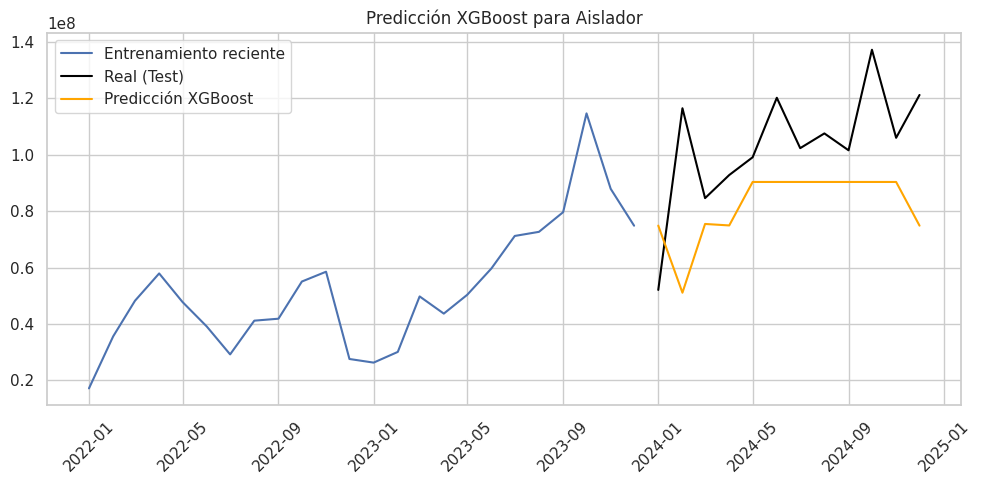


🔍 Procesando descriptor: Cable
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


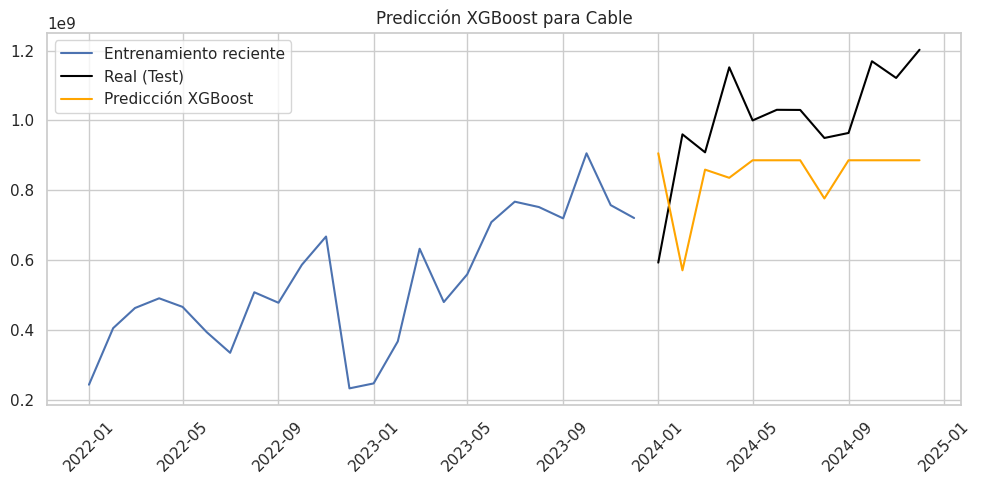


🔍 Procesando descriptor: Poste
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


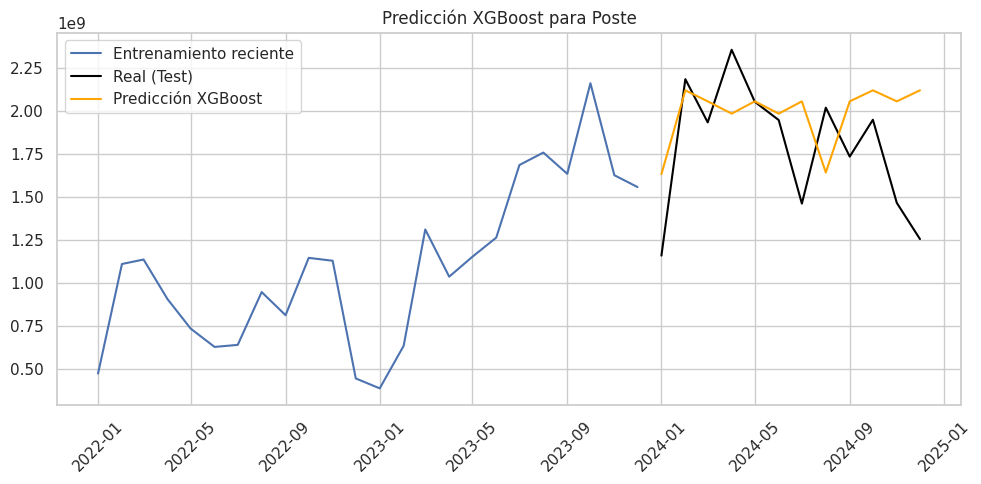


🔍 Procesando descriptor: Transformador
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


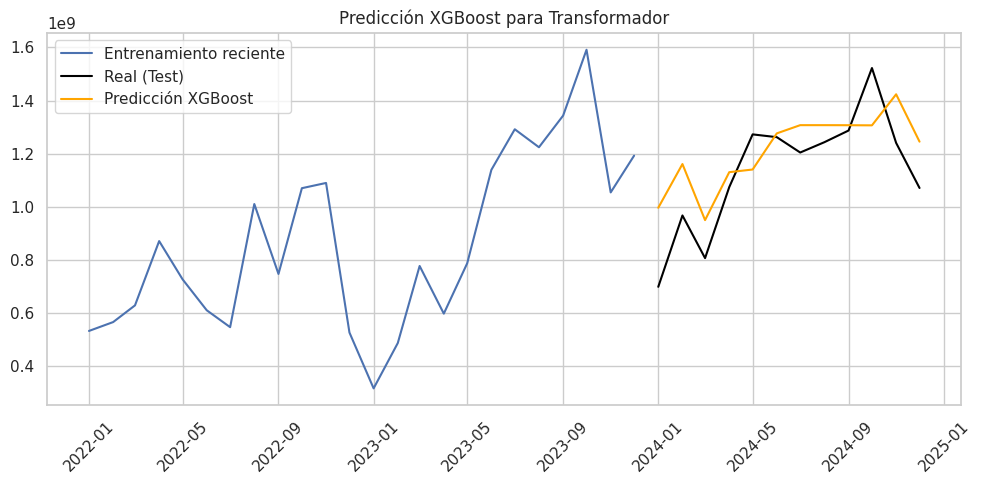


📋 Resumen de métricas (MAE, RMSE y MAPE):
                         MAE           RMSE  MAPE
Aislador       25,252,344.25  30,708,058.30 24.12
Transformador 132,980,464.17 156,085,360.64 13.11
Cable         213,295,849.58 237,995,906.95 21.98
Poste         332,717,723.42 419,195,377.31 21.95


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Paso 1: Preparar datos mensuales por descriptor
bd_final['Fecha Transacción'] = pd.to_datetime(bd_final['Fecha Transacción'])
bd_final['AñoMes'] = bd_final['Fecha Transacción'].dt.to_period('M')
serie_mensual = (
    bd_final.groupby(['AñoMes', 'Descriptor general'])['Costo Total']
    .sum()
    .unstack()
)
serie_mensual.index = serie_mensual.index.to_timestamp()

horizonte = 12  # meses a predecir
resultados = {}
metricas = {}

def crear_features(series):
    """
    Crear características basadas en rezagos para XGBoost.
    Por ejemplo: valores de 1 a 12 meses atrás.
    """
    df = pd.DataFrame(series)
    for lag in range(1, 13):
        df[f'lag_{lag}'] = df[series.name].shift(lag)
    df = df.dropna()
    return df

for descriptor in serie_mensual.columns:
    print(f"\n🔍 Procesando descriptor: {descriptor}")

    serie = serie_mensual[descriptor].dropna()

    if len(serie) <= horizonte + 12:  # 12 lags para features + horizonte para test
        print("⚠️ No hay suficientes datos para entrenamiento y prueba.")
        continue

    # Crear features con rezagos
    df_features = crear_features(serie)

    # Separar entrenamiento y prueba
    train = df_features[:-horizonte]
    test = df_features[-horizonte:]

    X_train = train.drop(columns=[serie.name])
    y_train = train[serie.name]

    X_test = test.drop(columns=[serie.name])
    y_test = test[serie.name]

    print(f"✅ Entrenamiento: {X_train.index[0].strftime('%Y-%m')} a {X_train.index[-1].strftime('%Y-%m')}")
    print(f"📊 Prueba: {X_test.index[0].strftime('%Y-%m')} a {X_test.index[-1].strftime('%Y-%m')}")

    # Modelo XGBoost
    model = xgb.XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
    model.fit(X_train, y_train)

    # Predicción
    pred = model.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mape = np.mean(np.abs((y_test - pred) / y_test.replace(0, np.nan))) * 100

    metricas[descriptor] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

    # Guardar resultados en DataFrame
    resultados[descriptor] = pd.DataFrame({
        'Real': y_test,
        'Predicción': pred
    }, index=y_test.index)

    # Graficar
    plt.figure(figsize=(10,5))
    plt.plot(y_train[-24:], label='Entrenamiento reciente')
    plt.plot(y_test, label='Real (Test)', color='black')
    plt.plot(y_test.index, pred, label='Predicción XGBoost', color='orange')
    plt.title(f'Predicción XGBoost para {descriptor}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Mostrar resumen de métricas
df_metricas = pd.DataFrame(metricas).T
print("\n📋 Resumen de métricas (MAE, RMSE y MAPE):")
print(df_metricas.sort_values('RMSE'))


Se genra una tabla resumen con las características anuales que mencionaste para cada valor único de la variable "Descriptor general", usando la columna de fechas "Fecha Transacción" y los valores monetarios de "Costo Total".

Con el resultado se espera

1. Desviación estándar anual del costo total.

2. Entropía anual del costo total (basada en frecuencia normalizada).

3. Curtosis (tercer momento centrado) anual.

4. Skewness (asimetría, cuarto momento centrado) anual.

5. Promedio anual del costo total.

6. Valores mínimos y máximos anuales.

7. Mes con consumo más alto (suma mensual del costo total).

Finalmente, los valores serán estandarizados para usarse en modelos de machine learning.

# **Random Forest Regressor**

**Por que usar Random Forest.**

1. Es muy preciso: combina muchos árboles de decisión para mejorar la predicción (modelo de ensamble).

2. Reduce el sobreajuste: al promediar muchos árboles, evita que el modelo se adapte demasiado a los datos de entrenamiento.

3. Funciona bien con datos no lineales y con muchas variables.

4. Estima la importancia de cada variable, lo cual es útil para interpretar resultados.

5. Sirve tanto para clasificación como para regresión.


🔍 Procesando descriptor: Aislador
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


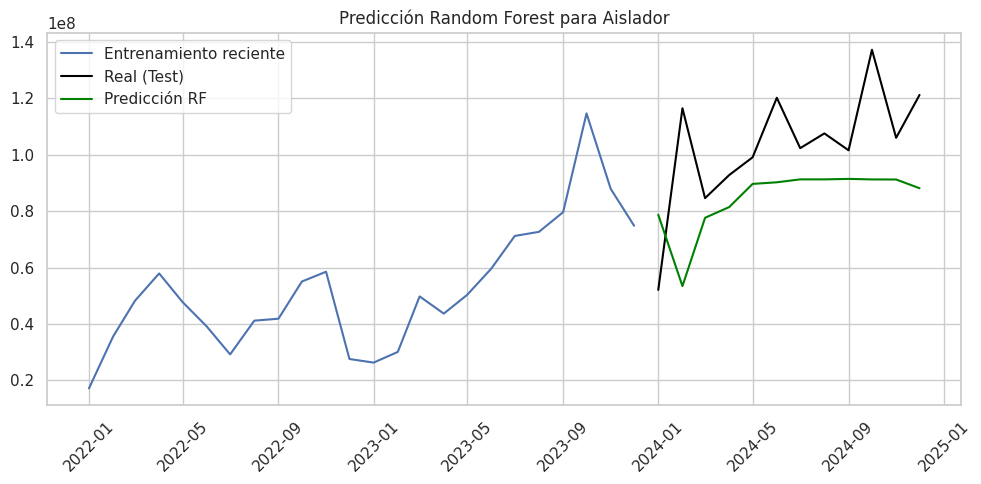


🔍 Procesando descriptor: Cable
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


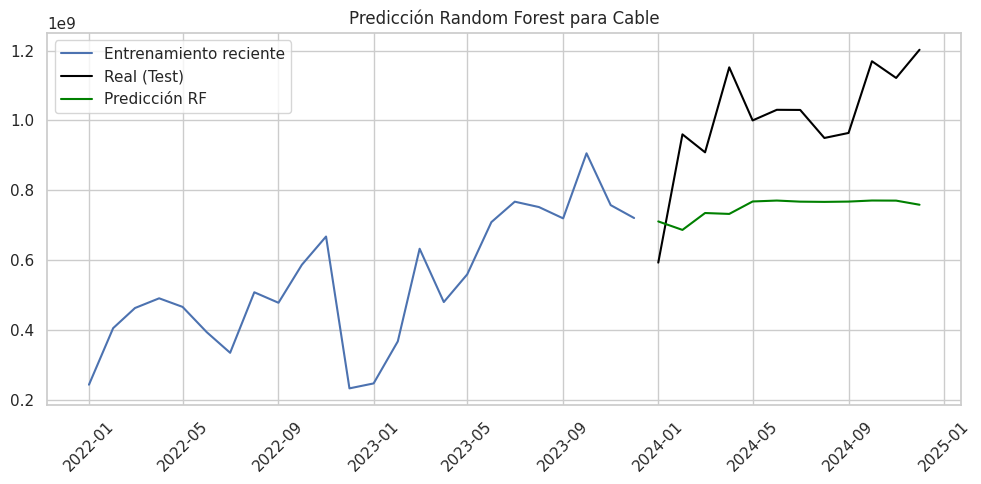


🔍 Procesando descriptor: Poste
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


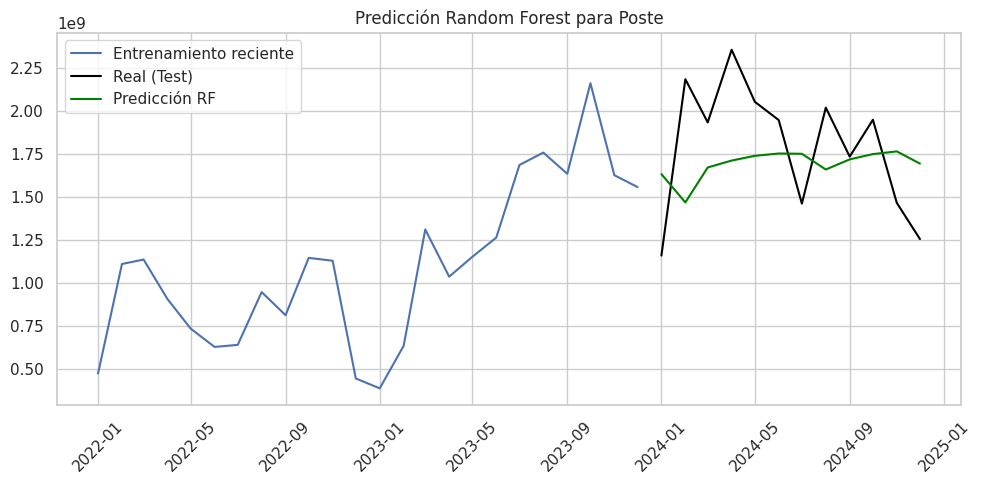


🔍 Procesando descriptor: Transformador
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


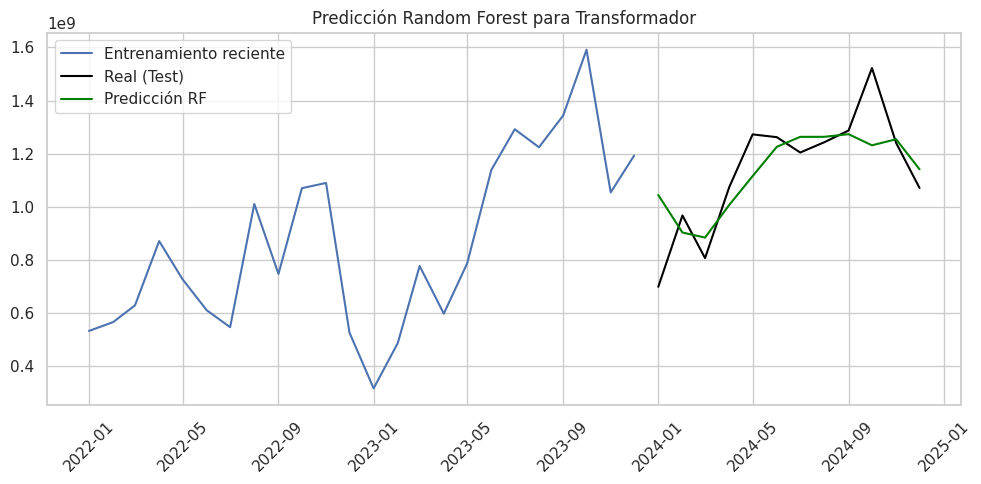


📋 Resumen de métricas (MAE, RMSE y MAPE):
                         MAE           RMSE  MAPE
Aislador       23,223,808.81  28,521,634.77 22.57
Transformador 101,189,679.20 145,274,053.18 10.11
Cable         276,239,960.50 294,132,620.71 26.67
Poste         350,780,090.23 397,335,007.83 20.31


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Paso 1: Preparar datos mensuales por descriptor
bd_final['Fecha Transacción'] = pd.to_datetime(bd_final['Fecha Transacción'])
bd_final['AñoMes'] = bd_final['Fecha Transacción'].dt.to_period('M')
serie_mensual = (
    bd_final.groupby(['AñoMes', 'Descriptor general'])['Costo Total']
    .sum()
    .unstack()
)
serie_mensual.index = serie_mensual.index.to_timestamp()

horizonte = 12  # meses a predecir
resultados = {}
metricas = {}

def crear_features(series):
    """
    Crear características basadas en rezagos para Random Forest.
    Por ejemplo: valores de 1 a 12 meses atrás.
    """
    df = pd.DataFrame(series)
    for lag in range(1, 13):
        df[f'lag_{lag}'] = df[series.name].shift(lag)
    df = df.dropna()
    return df

for descriptor in serie_mensual.columns:
    print(f"\n🔍 Procesando descriptor: {descriptor}")

    serie = serie_mensual[descriptor].dropna()

    if len(serie) <= horizonte + 12:  # 12 lags para features + horizonte para test
        print("⚠️ No hay suficientes datos para entrenamiento y prueba.")
        continue

    # Crear features con rezagos
    df_features = crear_features(serie)

    # Separar entrenamiento y prueba
    train = df_features[:-horizonte]
    test = df_features[-horizonte:]

    X_train = train.drop(columns=[serie.name])
    y_train = train[serie.name]

    X_test = test.drop(columns=[serie.name])
    y_test = test[serie.name]

    print(f"✅ Entrenamiento: {X_train.index[0].strftime('%Y-%m')} a {X_train.index[-1].strftime('%Y-%m')}")
    print(f"📊 Prueba: {X_test.index[0].strftime('%Y-%m')} a {X_test.index[-1].strftime('%Y-%m')}")

    # Modelo Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predicción
    pred = rf.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mape = np.mean(np.abs((y_test - pred) / y_test.replace(0, np.nan))) * 100

    metricas[descriptor] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

    # Guardar resultados en DataFrame
    resultados[descriptor] = pd.DataFrame({
        'Real': y_test,
        'Predicción': pred
    }, index=y_test.index)

    # Graficar
    plt.figure(figsize=(10,5))
    plt.plot(y_train[-24:], label='Entrenamiento reciente')
    plt.plot(y_test, label='Real (Test)', color='black')
    plt.plot(y_test.index, pred, label='Predicción RF', color='green')
    plt.title(f'Predicción Random Forest para {descriptor}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Mostrar resumen de métricas
df_metricas = pd.DataFrame(metricas).T
print("\n📋 Resumen de métricas (MAE, RMSE y MAPE):")
print(df_metricas.sort_values('RMSE'))


# **Conclucion**

Despues de haber revisado los modelos de prediccion, arima, sarima, Random Forest y xgboost, identifique lo siguiente:

* Random Forest funciona mejor para: Aislador, poste y transformador.

* XGBoost tiene mejor rendimiento en: cable.

Teniendo en cuenta lo anterior, realizo la predcccion de mis categorias, de la mejor forma de predccion.

# **XGBoost y Random Forest Regressor**

Tomo las categorias con mejores metricas de cada modelo y lo grafico.




🔍 Procesando descriptor: Aislador
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


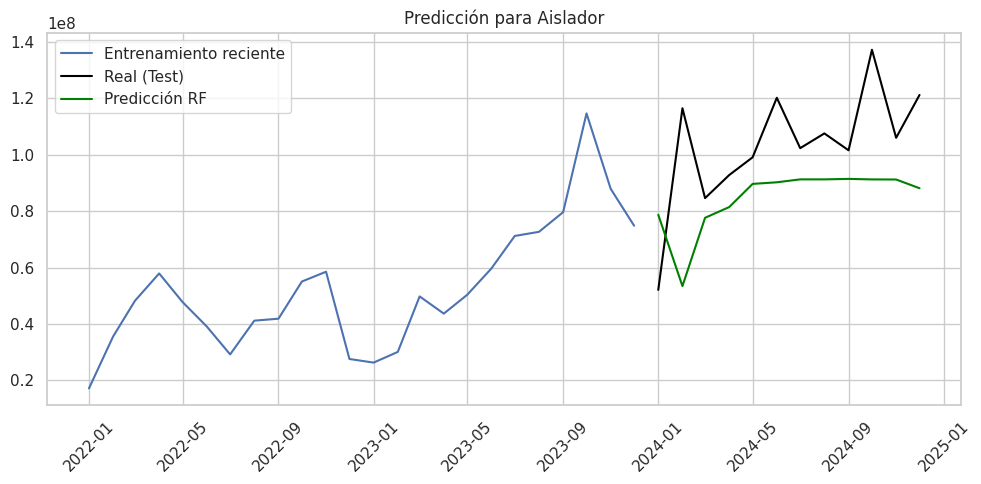


🔍 Procesando descriptor: Cable
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


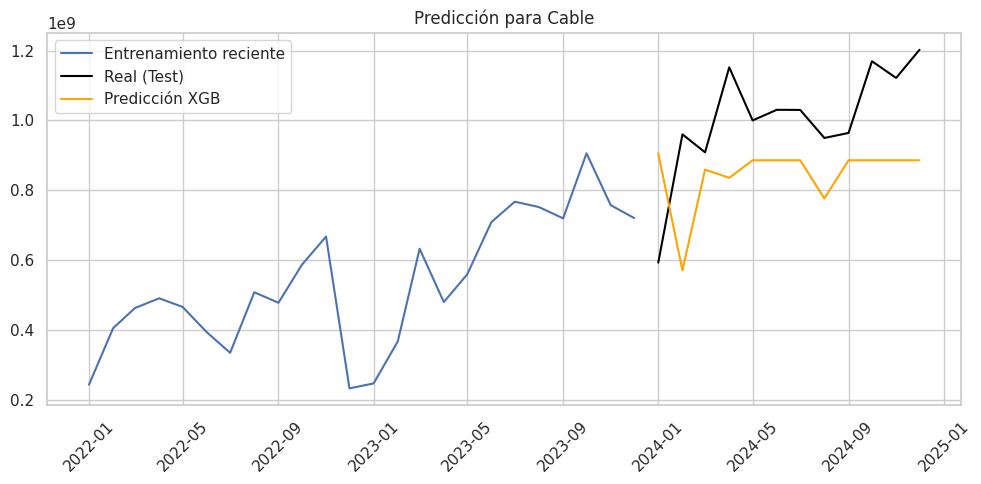


🔍 Procesando descriptor: Poste
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


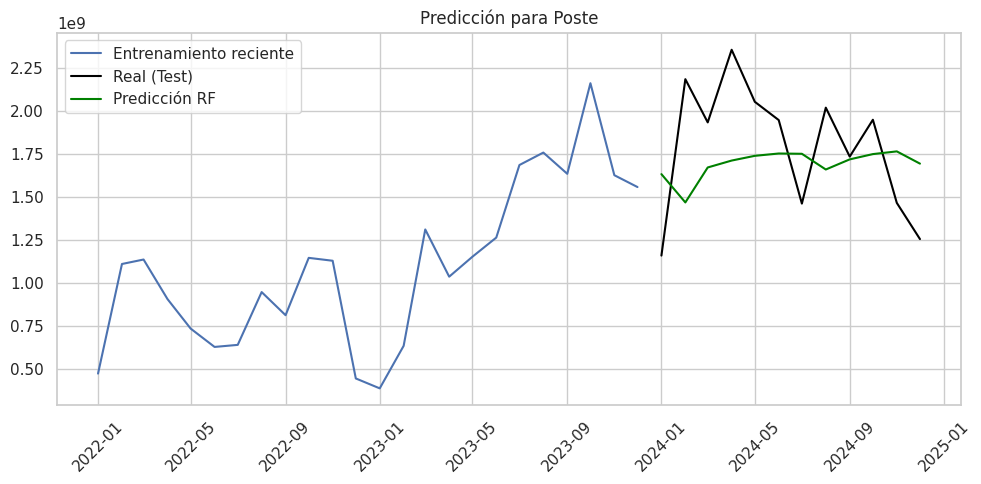


🔍 Procesando descriptor: Transformador
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


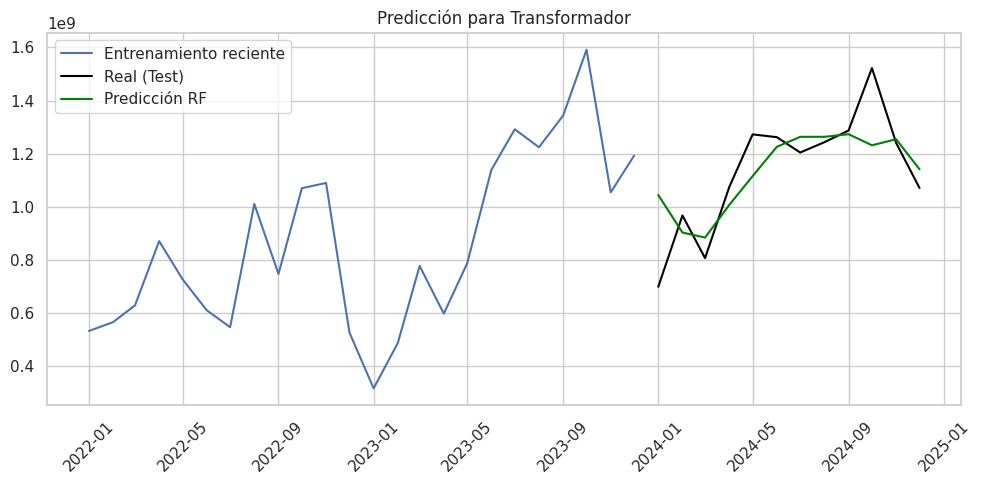


📋 Resumen de métricas (MAE, RMSE y MAPE):
                         MAE           RMSE  MAPE
Aislador       23,223,808.81  28,521,634.77 22.57
Transformador 101,189,679.20 145,274,053.18 10.11
Cable         213,295,849.58 237,995,906.95 21.98
Poste         350,780,090.23 397,335,007.83 20.31


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Paso 1: Procesar las fechas y generar la serie mensual por descriptor
bd_final['Fecha Transacción'] = pd.to_datetime(bd_final['Fecha Transacción'])
bd_final['AñoMes'] = bd_final['Fecha Transacción'].dt.to_period('M')
serie_mensual = (
    bd_final.groupby(['AñoMes', 'Descriptor general'])['Costo Total']
    .sum()
    .unstack()
)
serie_mensual.index = serie_mensual.index.to_timestamp()

# Paso 2: Función para crear variables de rezago (lags)
def crear_features(series):
    df = pd.DataFrame(series)
    for lag in range(1, 13):
        df[f'lag_{lag}'] = df[series.name].shift(lag)
    return df.dropna()

# Paso 3: Definir horizonte de predicción y categorías por modelo
horizonte = 12  # meses a predecir
categorias_rf = ['Aislador', 'Poste', 'Transformador']
categorias_xgb = ['Cable']

# Diccionarios para guardar resultados y métricas
resultados = {}
metricas = {}

# Paso 4: Ciclo para procesar cada descriptor
for descriptor in serie_mensual.columns:
    print(f"\n🔍 Procesando descriptor: {descriptor}")

    if descriptor not in categorias_rf + categorias_xgb:
        continue

    serie = serie_mensual[descriptor].dropna()

    if len(serie) <= horizonte + 12:
        print("⚠️ No hay suficientes datos para entrenamiento y prueba.")
        continue

    df_features = crear_features(serie)
    train = df_features[:-horizonte]
    test = df_features[-horizonte:]

    X_train = train.drop(columns=[serie.name])
    y_train = train[serie.name]
    X_test = test.drop(columns=[serie.name])
    y_test = test[serie.name]

    print(f"✅ Entrenamiento: {X_train.index[0].strftime('%Y-%m')} a {X_train.index[-1].strftime('%Y-%m')}")
    print(f"📊 Prueba: {X_test.index[0].strftime('%Y-%m')} a {X_test.index[-1].strftime('%Y-%m')}")

    # Paso 5: Seleccionar modelo según categoría
    if descriptor in categorias_rf:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        color = 'green'
        label = 'Predicción RF'
    else:
        model = xgb.XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
        color = 'orange'
        label = 'Predicción XGB'

    # Paso 6: Entrenar y predecir
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # Paso 7: Calcular métricas
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mape = np.mean(np.abs((y_test - pred) / y_test.replace(0, np.nan))) * 100

    metricas[descriptor] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}
    resultados[descriptor] = pd.DataFrame({'Real': y_test, 'Predicción': pred}, index=y_test.index)

    # Paso 8: Graficar resultados
    plt.figure(figsize=(10,5))
    plt.plot(y_train[-24:], label='Entrenamiento reciente')
    plt.plot(y_test, label='Real (Test)', color='black')
    plt.plot(y_test.index, pred, label=label, color=color)
    plt.title(f'Predicción para {descriptor}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Paso 9: Mostrar resumen de métricas
df_metricas = pd.DataFrame(metricas).T
print("\n📋 Resumen de métricas (MAE, RMSE y MAPE):")
print(df_metricas.sort_values('RMSE'))


# Ensayos

## Ensayo 1
le adicione las variables, precio unitario y cantidad despachada.


🔍 Procesando descriptor: Aislador
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


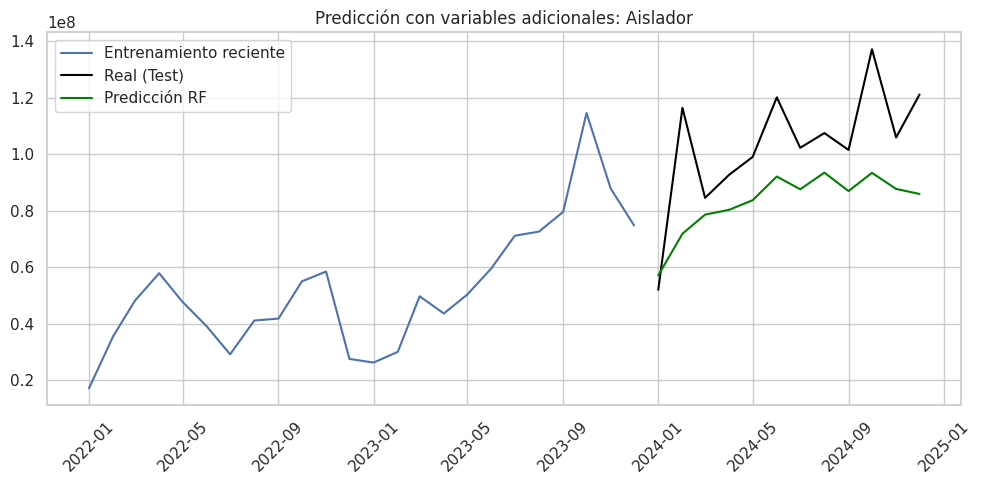


🔍 Procesando descriptor: Cable
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


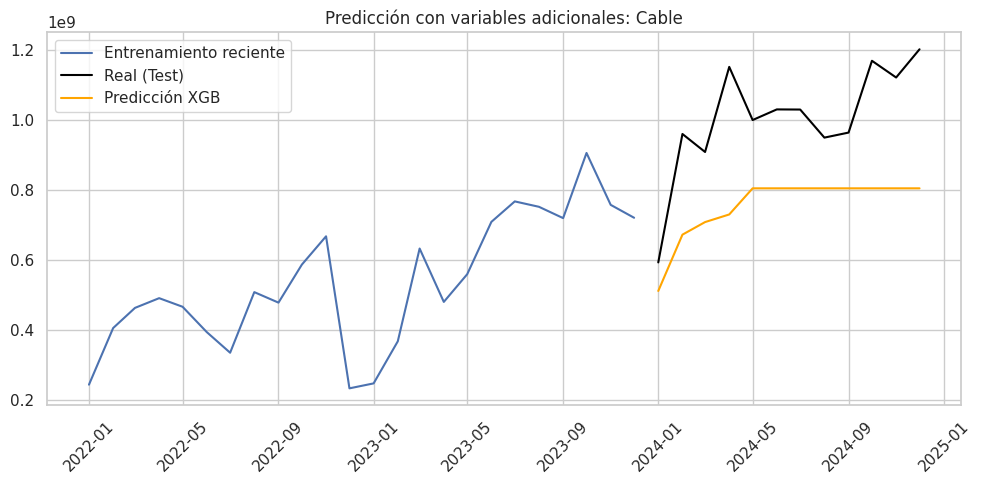


🔍 Procesando descriptor: Poste
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


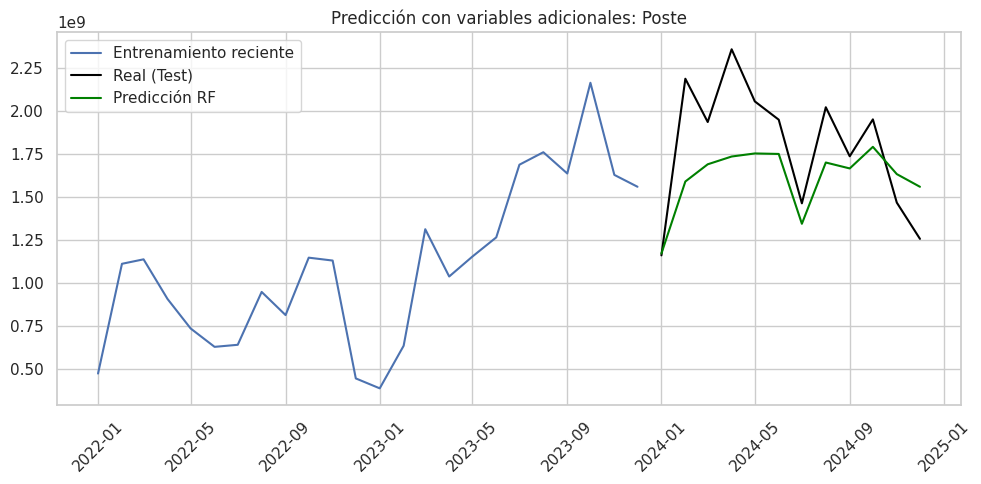


🔍 Procesando descriptor: Transformador
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


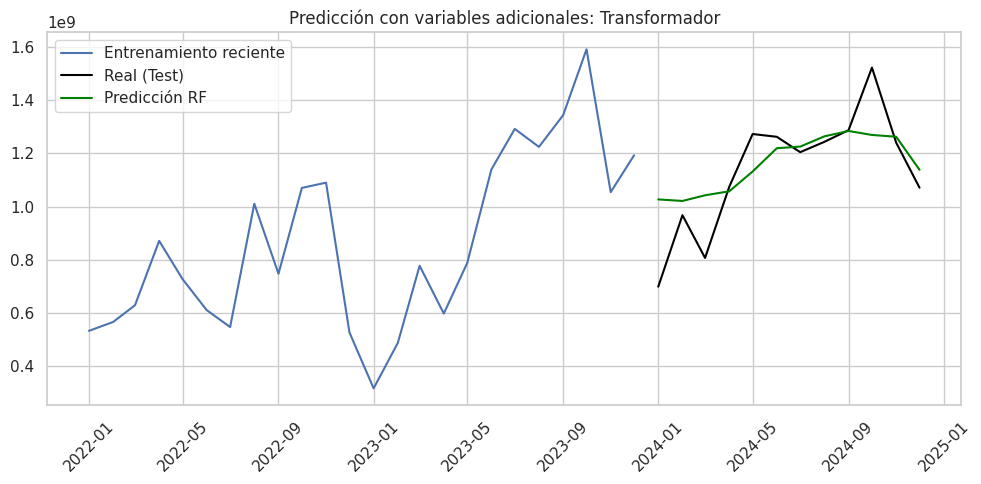


📋 Resumen de métricas (MAE, RMSE y MAPE):
                         MAE           RMSE  MAPE
Aislador       20,977,986.91  24,710,207.88 18.92
Transformador 100,289,228.01 146,432,324.47 10.48
Cable         251,968,221.25 271,818,588.40 24.18
Poste         259,625,146.68 316,501,224.61 13.65


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Paso 1: Preparar datos base
bd_final['Fecha Transacción'] = pd.to_datetime(bd_final['Fecha Transacción'])
bd_final['AñoMes'] = bd_final['Fecha Transacción'].dt.to_period('M')
bd_final['Mes'] = bd_final['Fecha Transacción'].dt.month

# ✅ LIMPIEZA de columnas monetarias
for col in ['Precio Unitario', 'Cant. Despachada']:
    bd_final[col] = (
        bd_final[col].astype(str)
        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
    )
    bd_final[col] = pd.to_numeric(bd_final[col], errors='coerce')

# Paso 2: Agrupar mensualmente
serie_mensual = (
    bd_final.groupby(['AñoMes', 'Descriptor general'])['Costo Total']
    .sum().unstack()
)
precio_unitario = (
    bd_final.groupby(['AñoMes', 'Descriptor general'])['Precio Unitario']
    .mean().unstack()
)
cantidad_despachada = (
    bd_final.groupby(['AñoMes', 'Descriptor general'])['Cant. Despachada']
    .sum().unstack()
)
mes_mensual = (
    bd_final.groupby(['AñoMes'])['Mes'].first()
)
# Asegurar índice como timestamp
serie_mensual.index = serie_mensual.index.to_timestamp()
precio_unitario.index = precio_unitario.index.to_timestamp()
cantidad_despachada.index = cantidad_despachada.index.to_timestamp()
mes_mensual.index = mes_mensual.index.to_timestamp()

# Paso 3: Crear función de features
def crear_features(serie, precio, cantidad, mes):
    df = pd.DataFrame({
        'y': serie,
        'precio_unitario': precio,
        'cantidad_despachada': cantidad,
        'mes': mes
    })
    for lag in range(1, 13):
        df[f'lag_{lag}'] = df['y'].shift(lag)
    return df.dropna()

# Paso 4: Configurar categorías
horizonte = 12
categorias_rf = ['Aislador', 'Poste', 'Transformador']
categorias_xgb = ['Cable']
resultados = {}
metricas = {}

# Paso 5: Procesar cada descriptor
for descriptor in serie_mensual.columns:
    print(f"\n🔍 Procesando descriptor: {descriptor}")

    if descriptor not in categorias_rf + categorias_xgb:
        continue

    serie = serie_mensual[descriptor].dropna()
    precio = precio_unitario[descriptor].dropna()
    cantidad = cantidad_despachada[descriptor].dropna()

    serie, precio = serie.align(precio, join='inner')
    serie, cantidad = serie.align(cantidad, join='inner')
    serie, mes = serie.align(mes_mensual, join='inner')

    if len(serie) <= horizonte + 12:
        print("⚠️ No hay suficientes datos.")
        continue

    df_features = crear_features(serie, precio, cantidad, mes)
    train = df_features[:-horizonte]
    test = df_features[-horizonte:]

    X_train = train.drop(columns=['y'])
    y_train = train['y']
    X_test = test.drop(columns=['y'])
    y_test = test['y']

    print(f"✅ Entrenamiento: {train.index[0].strftime('%Y-%m')} a {train.index[-1].strftime('%Y-%m')}")
    print(f"📊 Prueba: {test.index[0].strftime('%Y-%m')} a {test.index[-1].strftime('%Y-%m')}")

    # Elegir modelo
    if descriptor in categorias_rf:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        color = 'green'
        label = 'Predicción RF'
    else:
        model = xgb.XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
        color = 'orange'
        label = 'Predicción XGB'

    # Entrenar y predecir
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # Métricas
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mape = np.mean(np.abs((y_test - pred) / y_test.replace(0, np.nan))) * 100

    metricas[descriptor] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}
    resultados[descriptor] = pd.DataFrame({'Real': y_test, 'Predicción': pred}, index=y_test.index)

    # Gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(y_train[-24:], label='Entrenamiento reciente')
    plt.plot(y_test, label='Real (Test)', color='black')
    plt.plot(y_test.index, pred, label=label, color=color)
    plt.title(f'Predicción con variables adicionales: {descriptor}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Paso 6: Mostrar resumen de métricas
df_metricas = pd.DataFrame(metricas).T
print("\n📋 Resumen de métricas (MAE, RMSE y MAPE):")
print(df_metricas.sort_values('RMSE'))


## Ensayo 2

Adicione Precio Unitario, Cant. Despachada, Mes

Rezagos de 12 meses

Estadísticas móviles: promedio, desviación estándar, curtosis, skewness, entropía


🔍 Procesando descriptor: Aislador
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


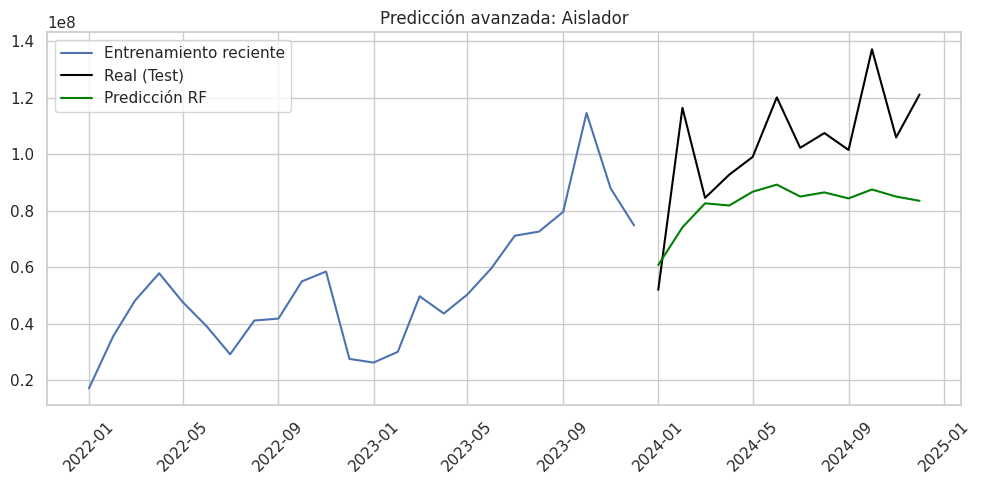


🔍 Procesando descriptor: Cable
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


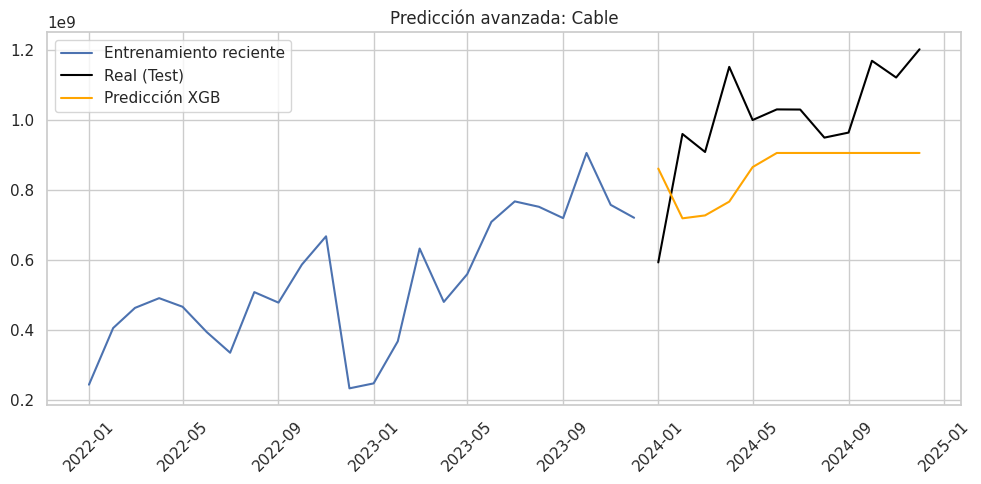


🔍 Procesando descriptor: Poste
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


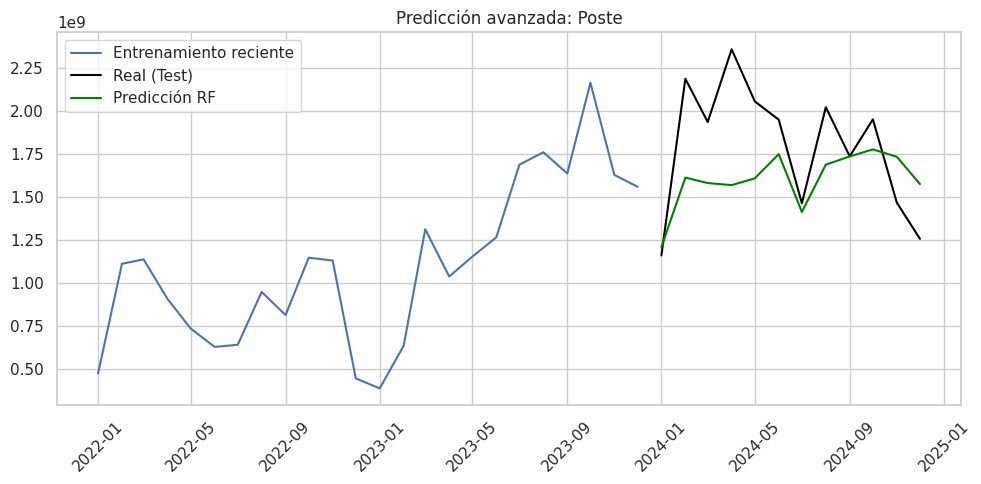


🔍 Procesando descriptor: Transformador
✅ Entrenamiento: 2022-01 a 2023-12
📊 Prueba: 2024-01 a 2024-12


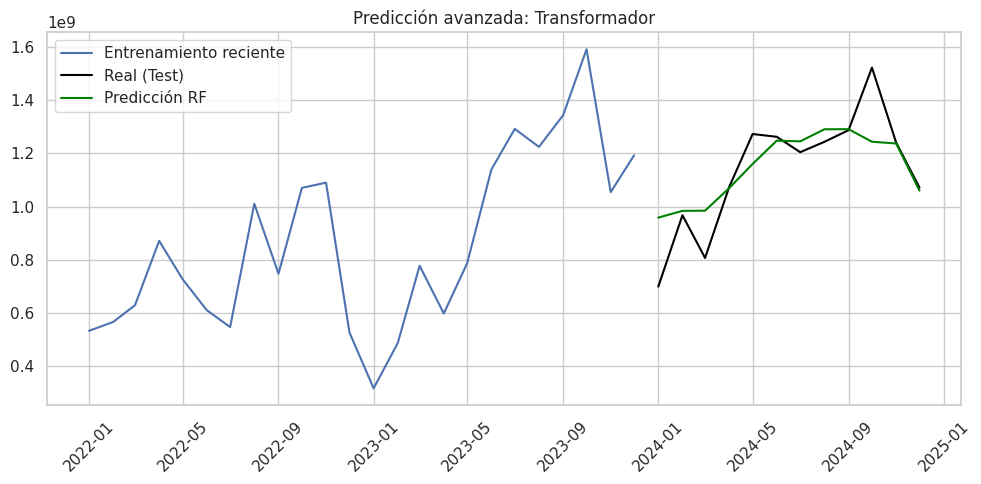


📋 Resumen de métricas (MAE, RMSE y MAPE):
                         MAE           RMSE  MAPE
Aislador       22,555,927.33  26,522,110.10 20.46
Transformador  80,725,315.99 126,943,029.24  8.18
Cable         194,908,862.92 218,041,700.36 19.88
Poste         296,403,822.58 369,277,508.44 15.55


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import entropy, kurtosis, skew

# Paso 1: Preparar datos base
bd_final['Fecha Transacción'] = pd.to_datetime(bd_final['Fecha Transacción'])
bd_final['AñoMes'] = bd_final['Fecha Transacción'].dt.to_period('M')
bd_final['Mes'] = bd_final['Fecha Transacción'].dt.month

# Limpiar columnas numéricas
for col in ['Precio Unitario', 'Cant. Despachada']:
    bd_final[col] = (
        bd_final[col].astype(str)
        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
    )
    bd_final[col] = pd.to_numeric(bd_final[col], errors='coerce')

# Paso 2: Agrupar mensualmente
serie_mensual = bd_final.groupby(['AñoMes', 'Descriptor general'])['Costo Total'].sum().unstack()
precio_unitario = bd_final.groupby(['AñoMes', 'Descriptor general'])['Precio Unitario'].mean().unstack()
cantidad_despachada = bd_final.groupby(['AñoMes', 'Descriptor general'])['Cant. Despachada'].sum().unstack()
mes_mensual = bd_final.groupby(['AñoMes'])['Mes'].first()

# Convertir índice a timestamp
for df in [serie_mensual, precio_unitario, cantidad_despachada]:
    df.index = df.index.to_timestamp()
mes_mensual.index = mes_mensual.index.to_timestamp()

# Paso 3: Crear función de features avanzadas
def crear_features_avanzadas(serie, precio, cantidad, mes):
    df = pd.DataFrame({
        'y': serie,
        'precio_unitario': precio,
        'cantidad_despachada': cantidad,
        'mes': mes
    })

    for lag in range(1, 13):
        df[f'lag_{lag}'] = df['y'].shift(lag)

    ventana = 6
    df['promedio_rolling'] = df['y'].rolling(window=ventana).mean()
    df['std_rolling'] = df['y'].rolling(window=ventana).std()
    df['curtosis'] = df['y'].rolling(window=ventana).apply(kurtosis, raw=True)
    df['skewness'] = df['y'].rolling(window=ventana).apply(skew, raw=True)

    def calcular_entropia(ventana_serie):
        if ventana_serie.sum() > 0:
            p = ventana_serie / ventana_serie.sum()
        else:
            p = np.ones(len(ventana_serie)) / len(ventana_serie)
        return entropy(p)

    df['entropia'] = df['y'].rolling(window=ventana).apply(calcular_entropia, raw=False)

    return df.dropna()

# Paso 4: Definir categorías
horizonte = 12
categorias_rf = ['Aislador', 'Poste', 'Transformador']
categorias_xgb = ['Cable']
resultados = {}
metricas = {}

# Paso 5: Procesar cada descriptor
for descriptor in serie_mensual.columns:
    print(f"\n🔍 Procesando descriptor: {descriptor}")

    if descriptor not in categorias_rf + categorias_xgb:
        continue

    serie = serie_mensual[descriptor].dropna()
    precio = precio_unitario[descriptor].dropna()
    cantidad = cantidad_despachada[descriptor].dropna()

    serie, precio = serie.align(precio, join='inner')
    serie, cantidad = serie.align(cantidad, join='inner')
    serie, mes = serie.align(mes_mensual, join='inner')

    if len(serie) <= horizonte + 12:
        print("⚠️ No hay suficientes datos.")
        continue

    df_features = crear_features_avanzadas(serie, precio, cantidad, mes)
    train = df_features[:-horizonte]
    test = df_features[-horizonte:]

    X_train = train.drop(columns=['y'])
    y_train = train['y']
    X_test = test.drop(columns=['y'])
    y_test = test['y']

    print(f"✅ Entrenamiento: {train.index[0].strftime('%Y-%m')} a {train.index[-1].strftime('%Y-%m')}")
    print(f"📊 Prueba: {test.index[0].strftime('%Y-%m')} a {test.index[-1].strftime('%Y-%m')}")

    if descriptor in categorias_rf:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        color = 'green'
        label = 'Predicción RF'
    else:
        model = xgb.XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
        color = 'orange'
        label = 'Predicción XGB'

    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mape = np.mean(np.abs((y_test - pred) / y_test.replace(0, np.nan))) * 100

    metricas[descriptor] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}
    resultados[descriptor] = pd.DataFrame({'Real': y_test, 'Predicción': pred}, index=y_test.index)

    # Gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(y_train[-24:], label='Entrenamiento reciente')
    plt.plot(y_test, label='Real (Test)', color='black')
    plt.plot(y_test.index, pred, label=label, color=color)
    plt.title(f'Predicción avanzada: {descriptor}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Paso 6: Mostrar resumen de métricas
df_metricas = pd.DataFrame(metricas).T
print("\n📋 Resumen de métricas (MAE, RMSE y MAPE):")
print(df_metricas.sort_values('RMSE'))
